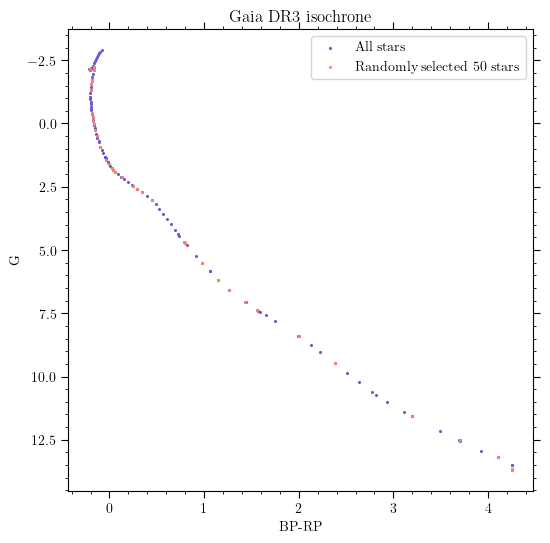

In [1]:
from astroquery.gaia import Gaia
from functions import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from astropy.stats import sigma_clipped_stats
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import gaussian_kde
import matplotlib
from astroquery.simbad import Simbad
from astroquery.ipac.ned import Ned
params={
    'text.usetex':True,
    'font.family':'serif',
    'xtick.minor.visible':True,
    'ytick.minor.visible':True,
    'xtick.top':True,
    'ytick.left':True,
    'ytick.right':True,
    'xtick.direction':'out',
    'ytick.direction':'out',
    'xtick.minor.size':2.5,
    'xtick.major.size':5,
    'ytick.minor.size':2.5,
    'ytick.major.size':5,
    'axes.axisbelow':True
}
matplotlib.rcParams.update(params)



iso = sample_from_isochrone()

# **Messier 45**

INFO: Query finished. [astroquery.utils.tap.core]


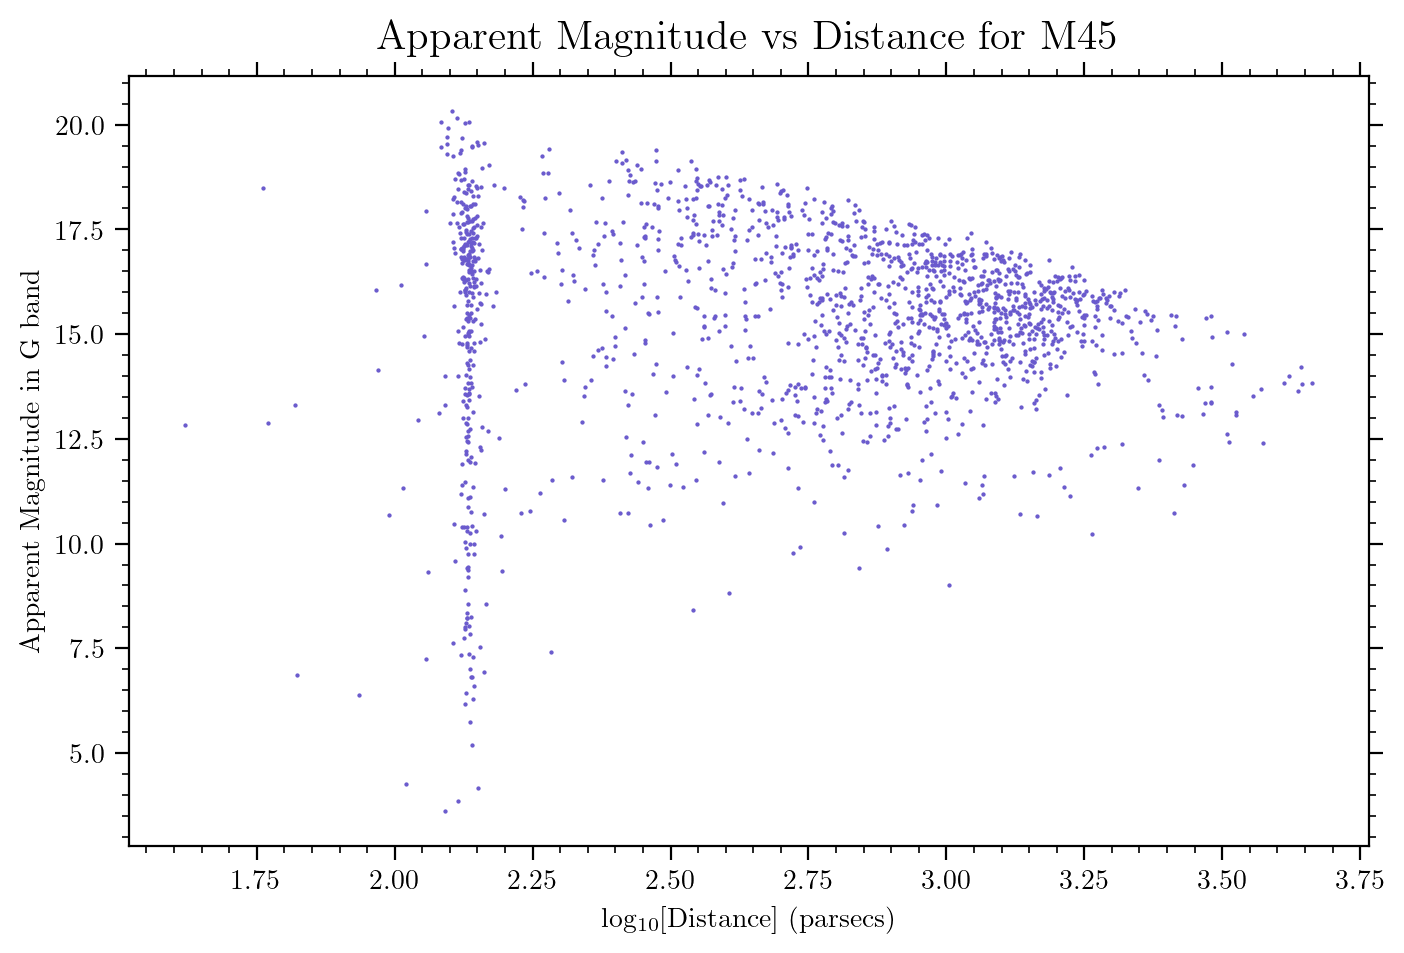

In [2]:
r_m45 = query_gaia('M45')
dist_m45 = plot_appmag_vs_dist('M45', r_m45)

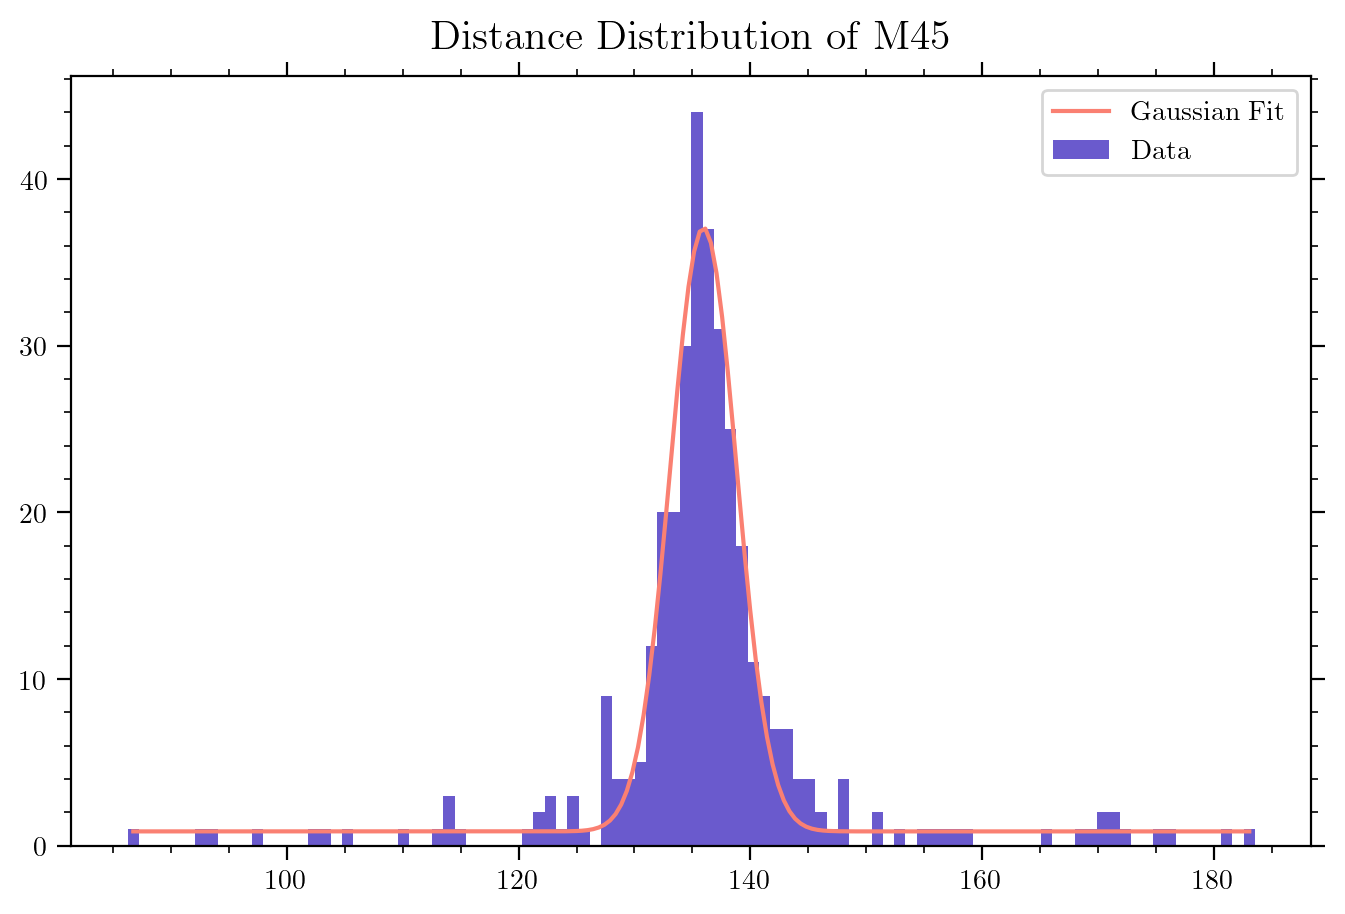

In [3]:
dist_m45 = dist_m45[np.logical_and(dist_m45<185, dist_m45>85)]
popt_m45 = gauss_fit('M45', dist_m45)

INFO: Query finished. [astroquery.utils.tap.core]


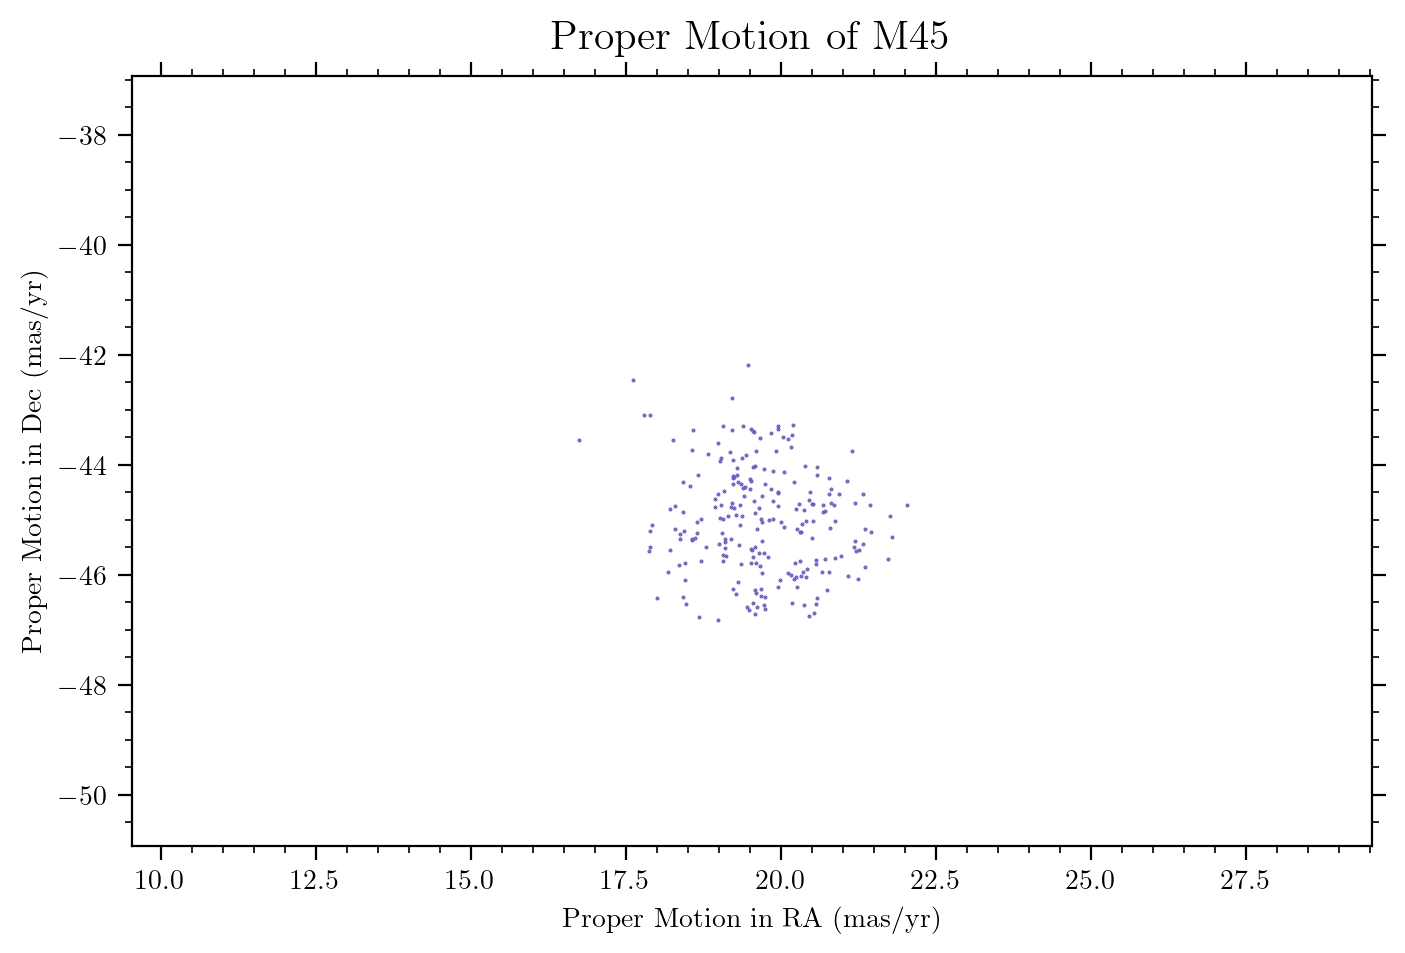

In [4]:
parallax_start_m45, parallax_end_m45 = parallax_cut(dist_m45, popt_m45)
r_m45_2 = plot_pm('M45', parallax_start_m45, parallax_end_m45, 0.25)

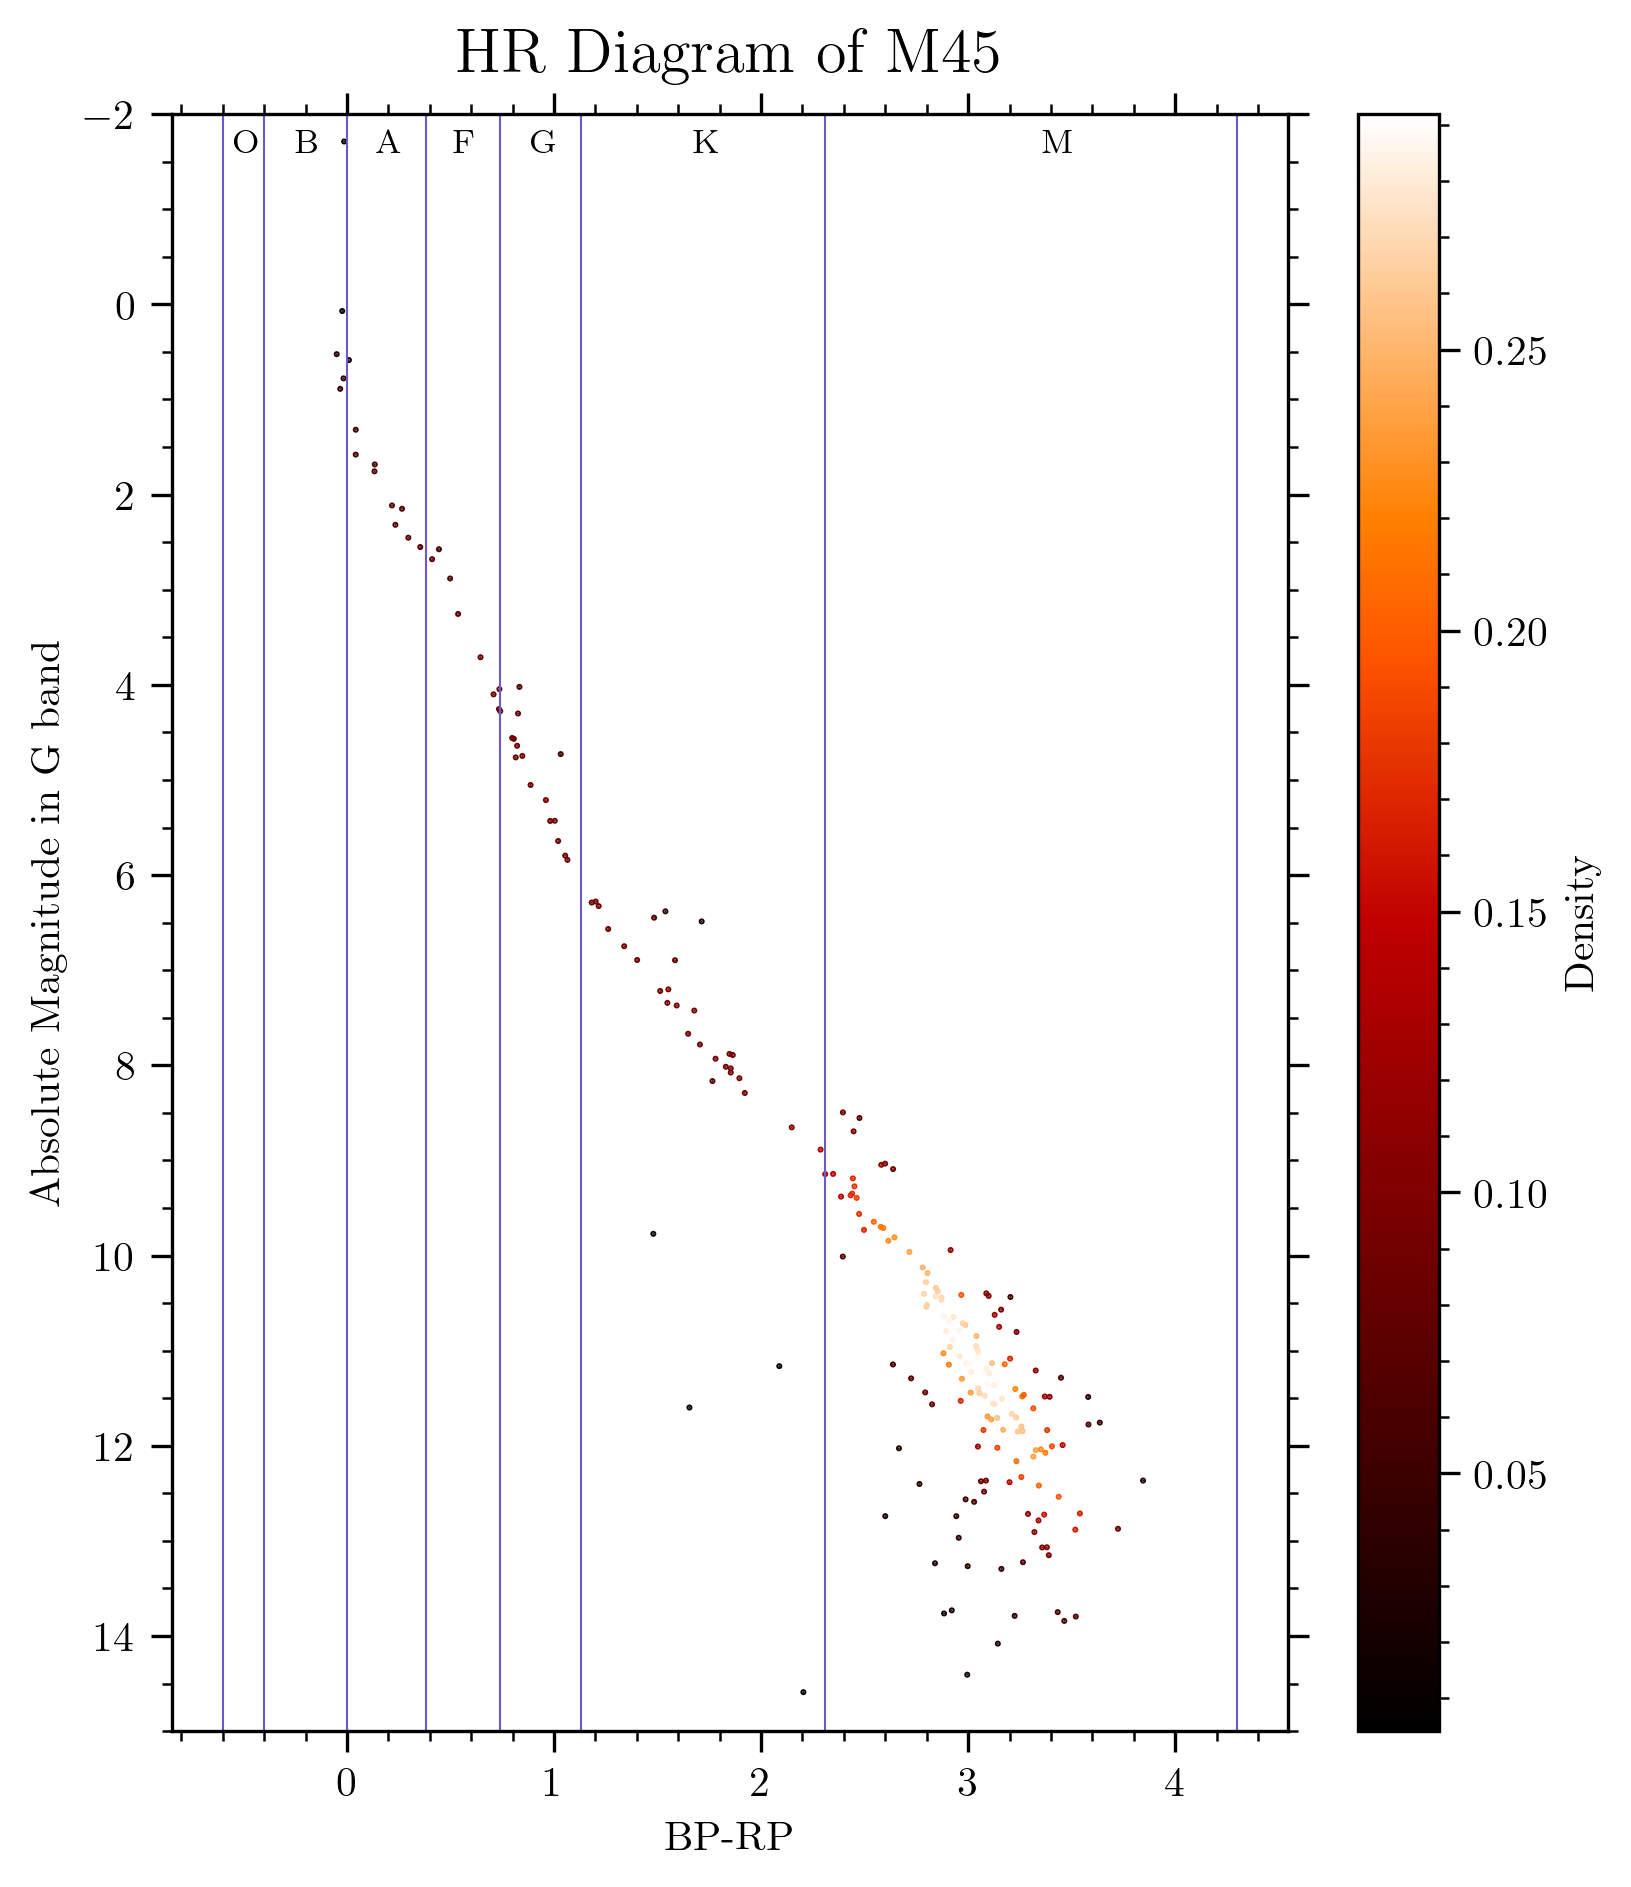

In [5]:
bprp_m45, absmag_m45 = hr_diag('M45', r_m45_2)

In [6]:
perc_in_spec_class('M45', bprp_m45)

Percentage of O type stars in M45 is 0.0%
Percentage of B type stars in M45 is 2.22%
Percentage of A type stars in M45 is 4.44%
Percentage of F type stars in M45 is 3.56%
Percentage of G type stars in M45 is 7.11%
Percentage of K type stars in M45 is 14.67%
Percentage of M type stars in M45 is 68.0%


In [7]:
initial_mass_m45 = []

for bprp, absmag in zip(np.array(bprp_m45), np.array(absmag_m45)):
    iso_bprp = iso['G_BPmag'] - iso['G_RPmag']
    iso_absmag = iso['Gmag']
    distance = np.sqrt((iso_bprp - bprp)**2 + (iso_absmag - absmag)**2)
    indices = np.where(distance == np.min(distance))[0]
    initial_mass_m45.append(iso.iloc[indices[0]]['Mass'])

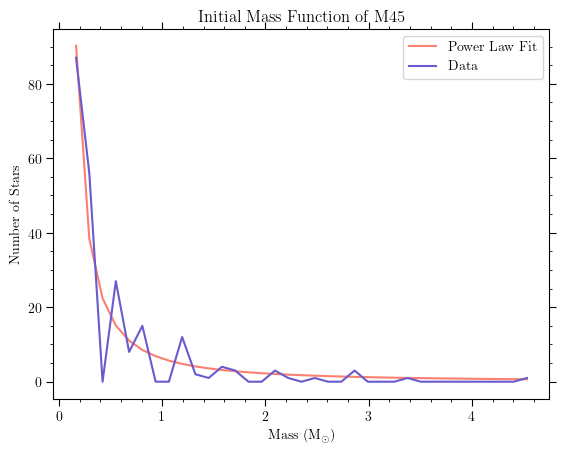

The power law index is 1.4861030137705302


In [60]:
n_m45, bins_m45 = np.histogram(initial_mass_m45, bins=35)
bins_m45 = (bins_m45[1:] + bins_m45[:-1])/2
popt, pcov = curve_fit(powerlaw, bins_m45, n_m45, p0=[1, 2])
plt.plot(bins_m45, powerlaw(bins_m45, *popt), label='Power Law Fit', color='salmon')
plt.plot(bins_m45, n_m45, label='Data', color='slateblue')
plt.ylabel('Number of Stars')
plt.xlabel('Mass (M$_\odot$)')
plt.title('Initial Mass Function of M45')
plt.legend()
plt.show()
print('The power law index is', popt[1])

# **NGC 188**

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Percentage of O type stars in NGC 188 is 0.0%
Percentage of B type stars in NGC 188 is 0.36%
Percentage of A type stars in NGC 188 is 0.0%
Percentage of F type stars in NGC 188 is 2.54%
Percentage of G type stars in NGC 188 is 81.16%
Percentage of K type stars in NGC 188 is 15.94%
Percentage of M type stars in NGC 188 is 0.0%


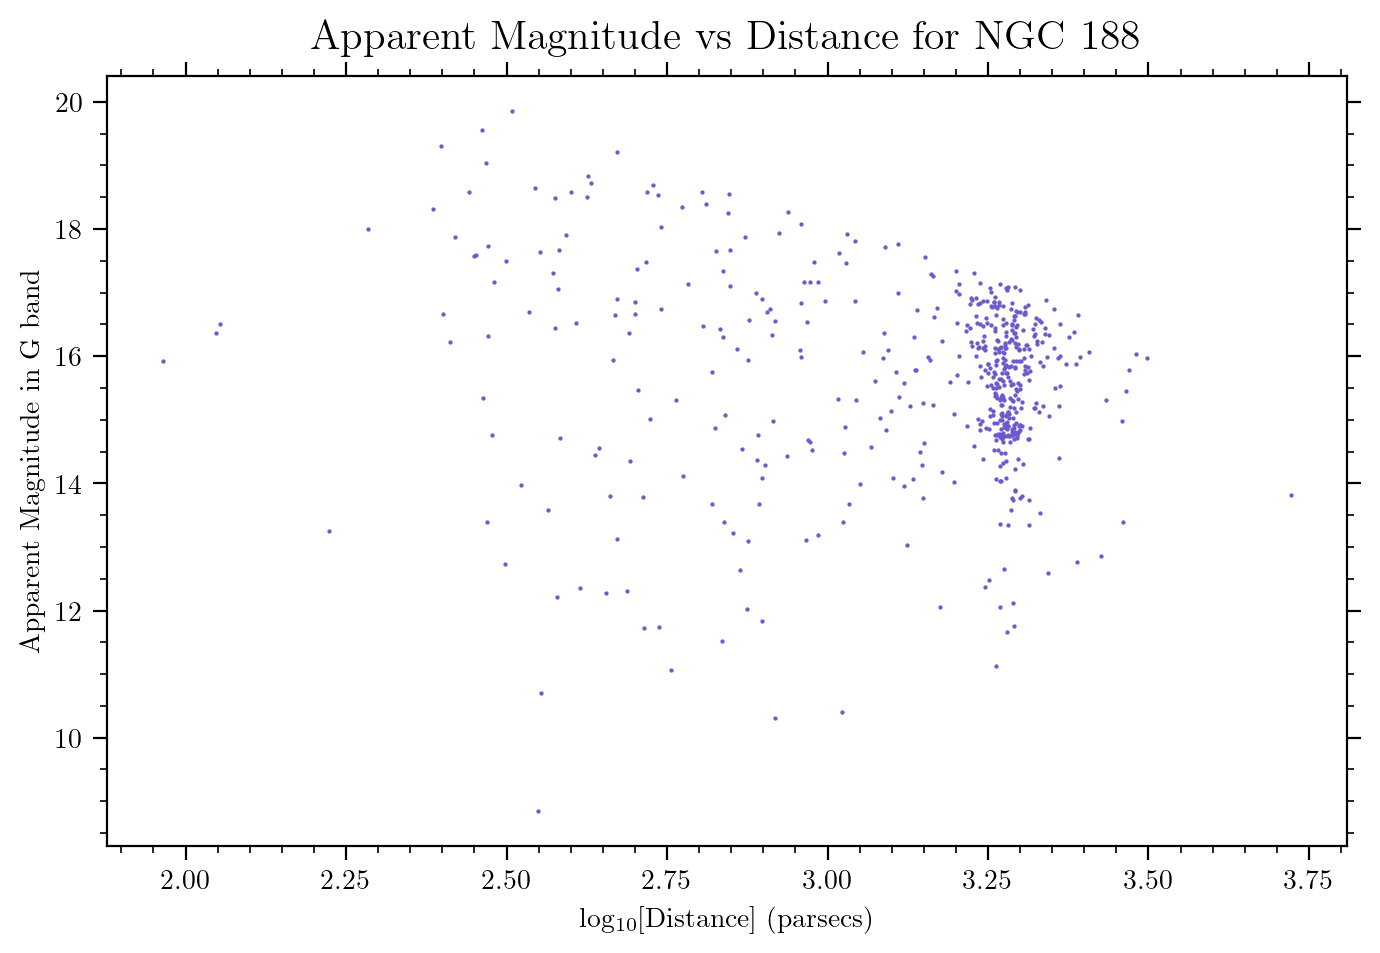

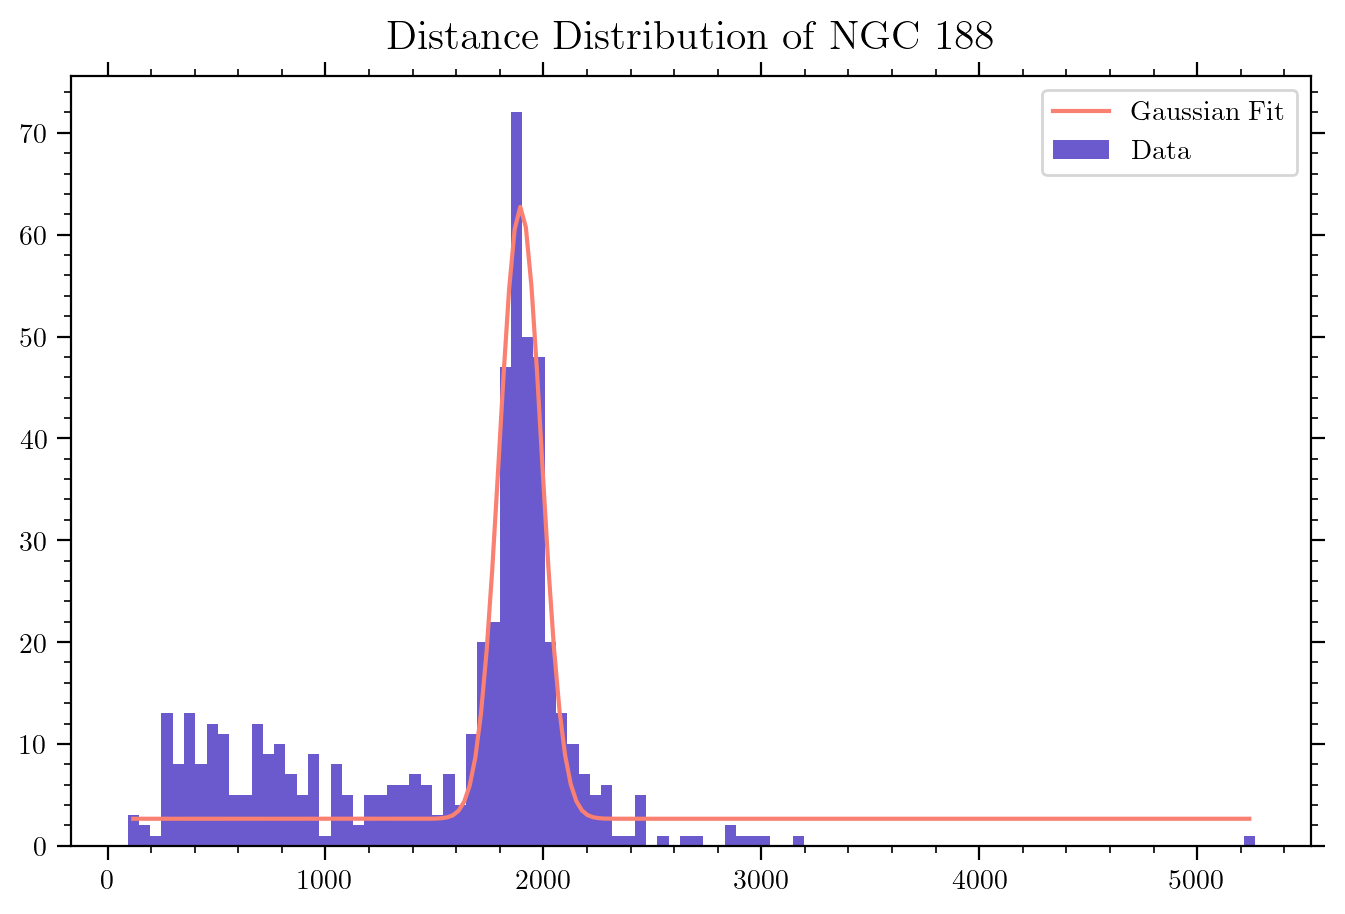

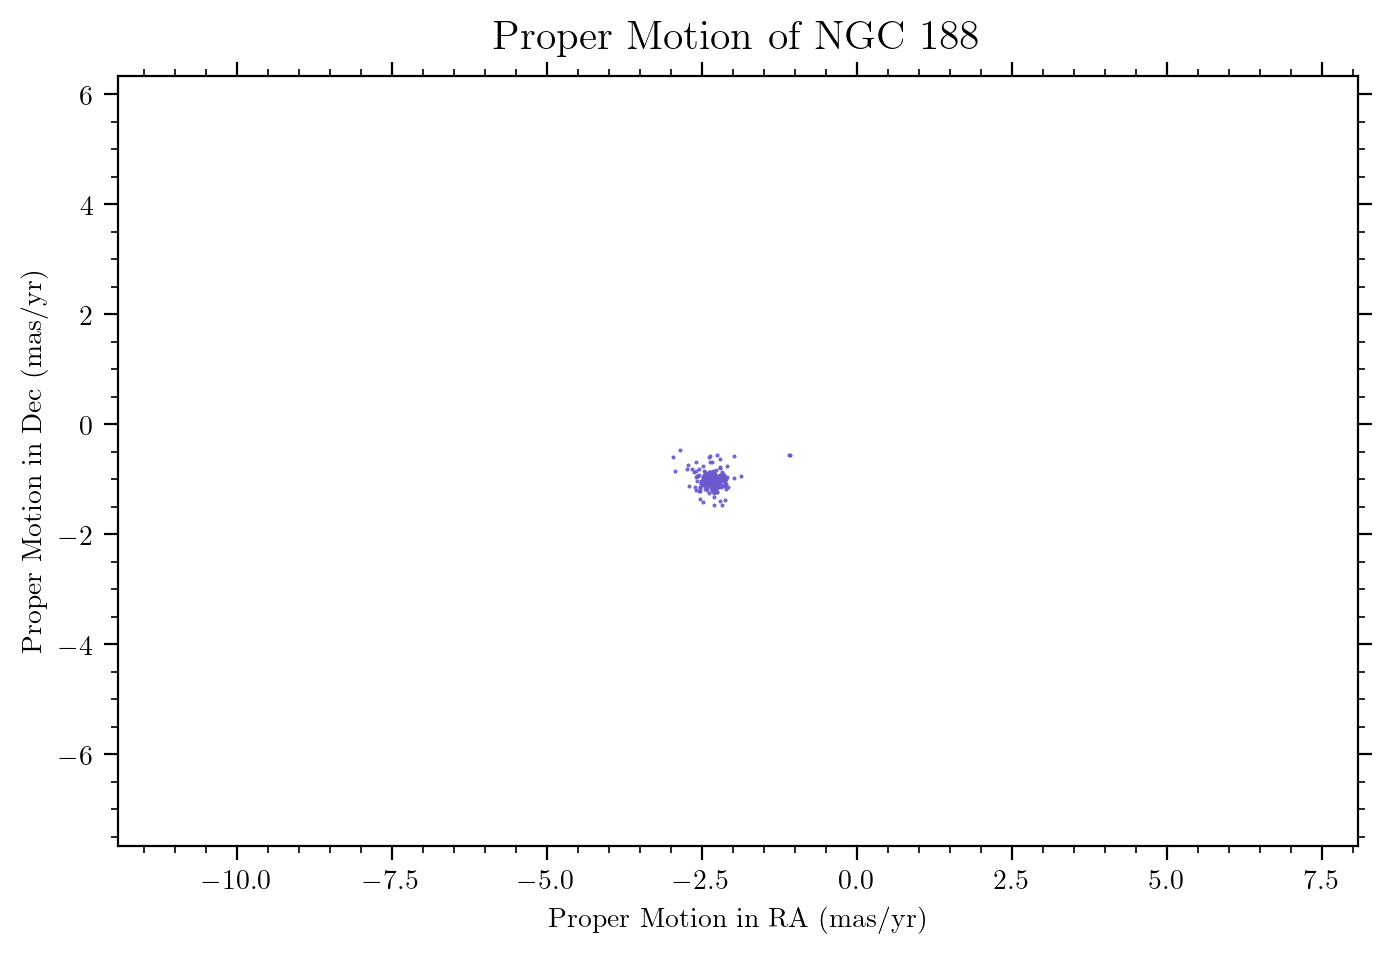

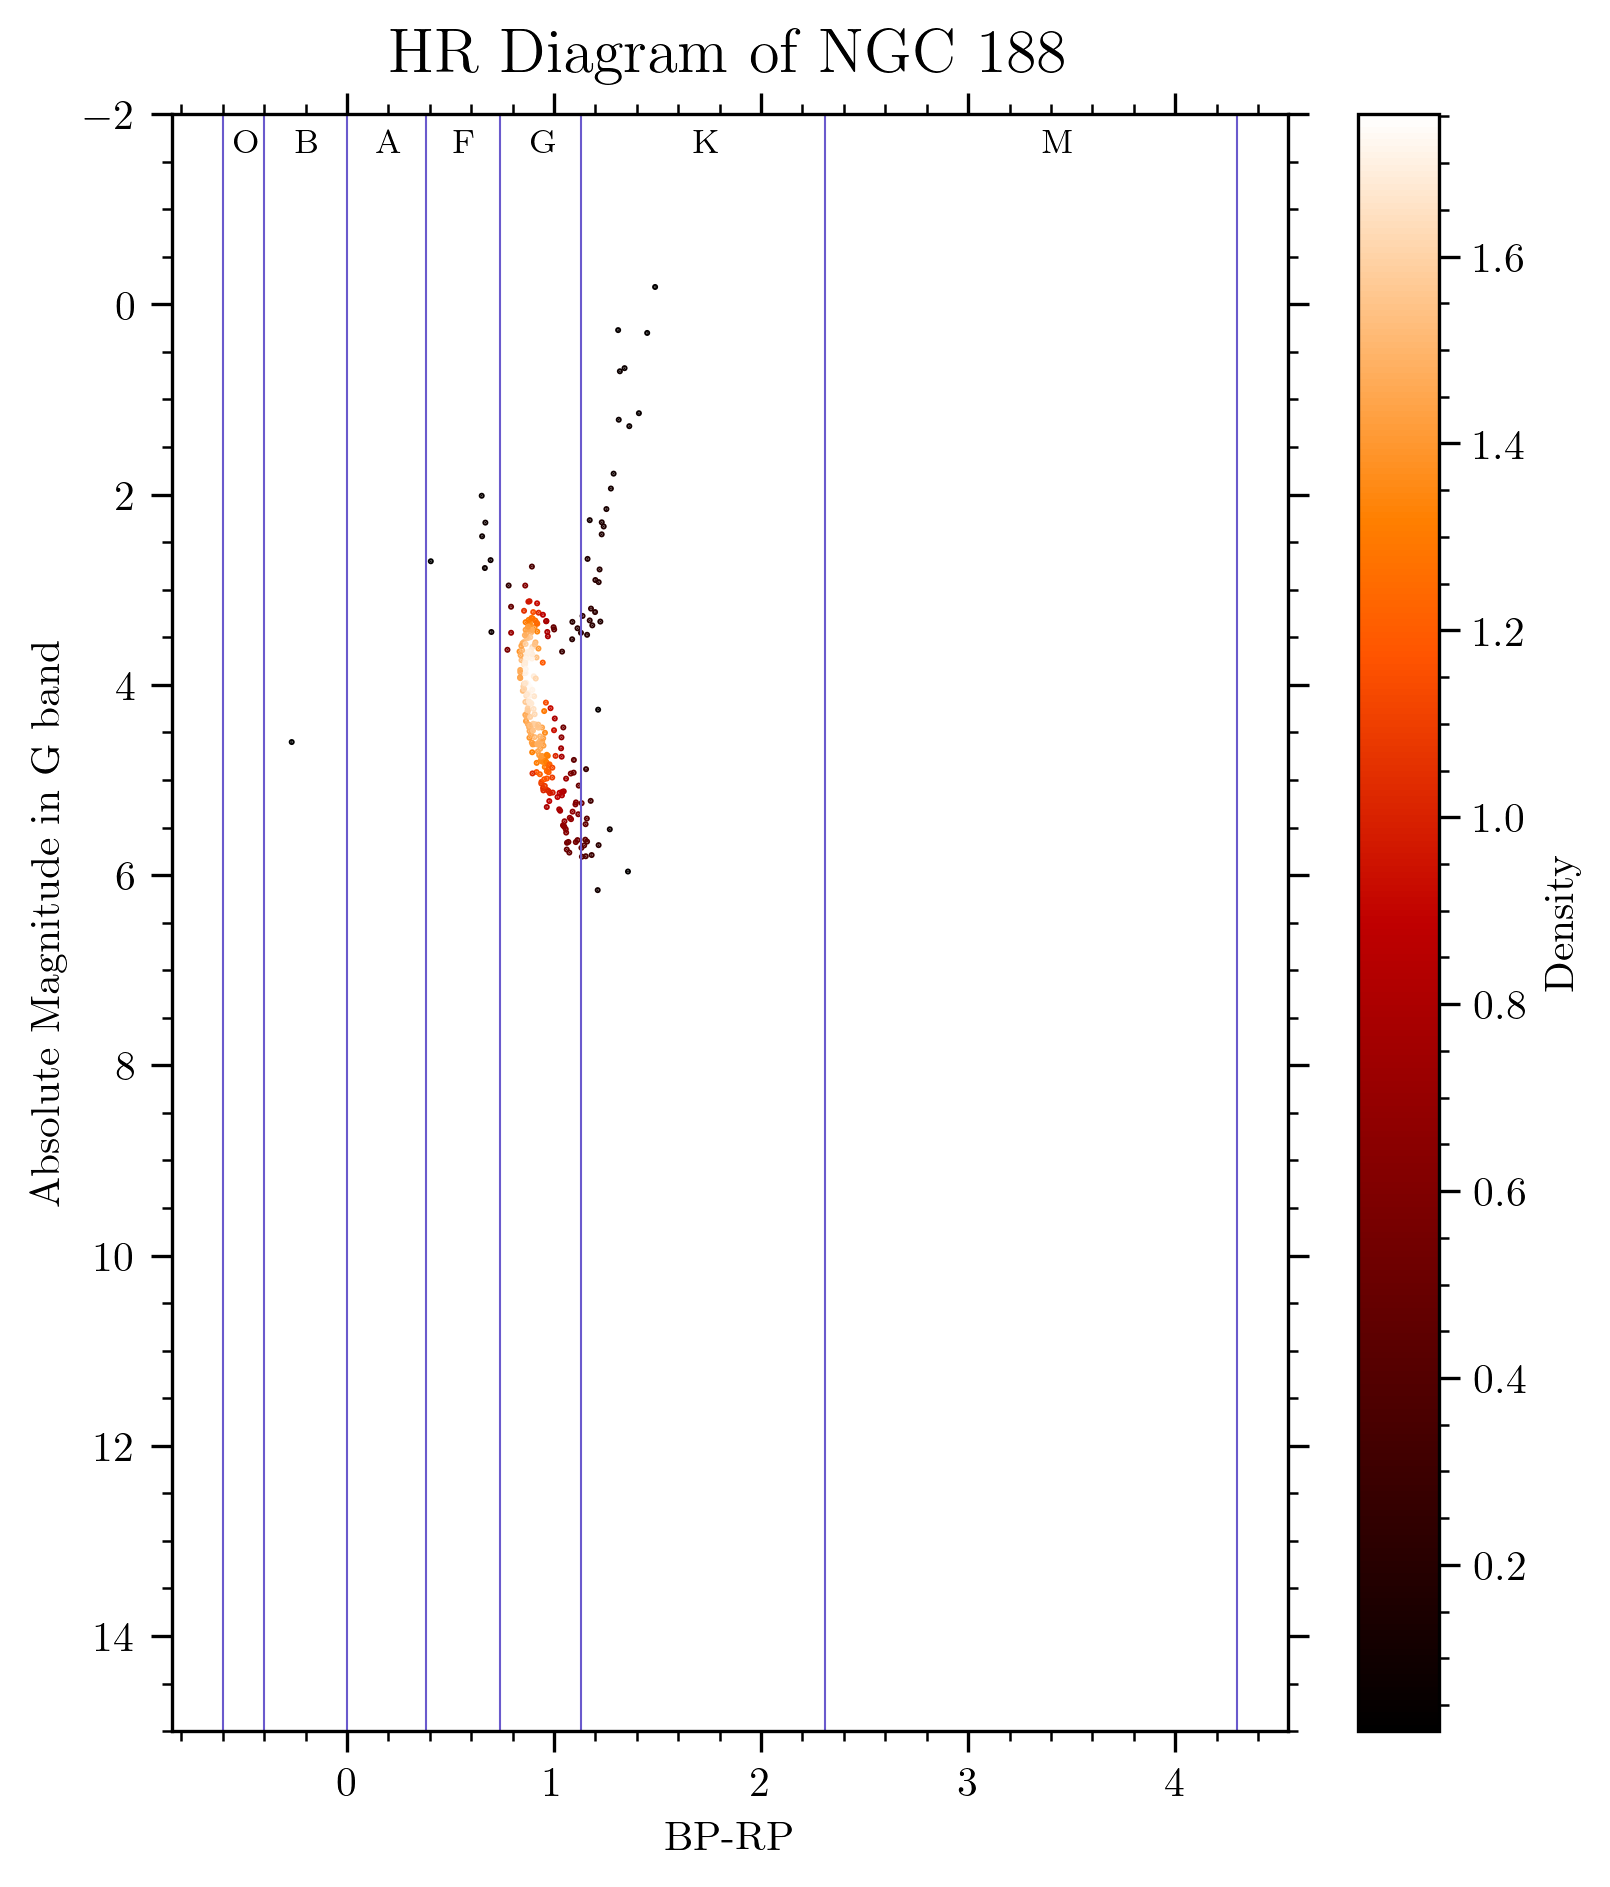

In [8]:
plot_all('NGC 188')

# **Messier 50**

INFO: Query finished. [astroquery.utils.tap.core]


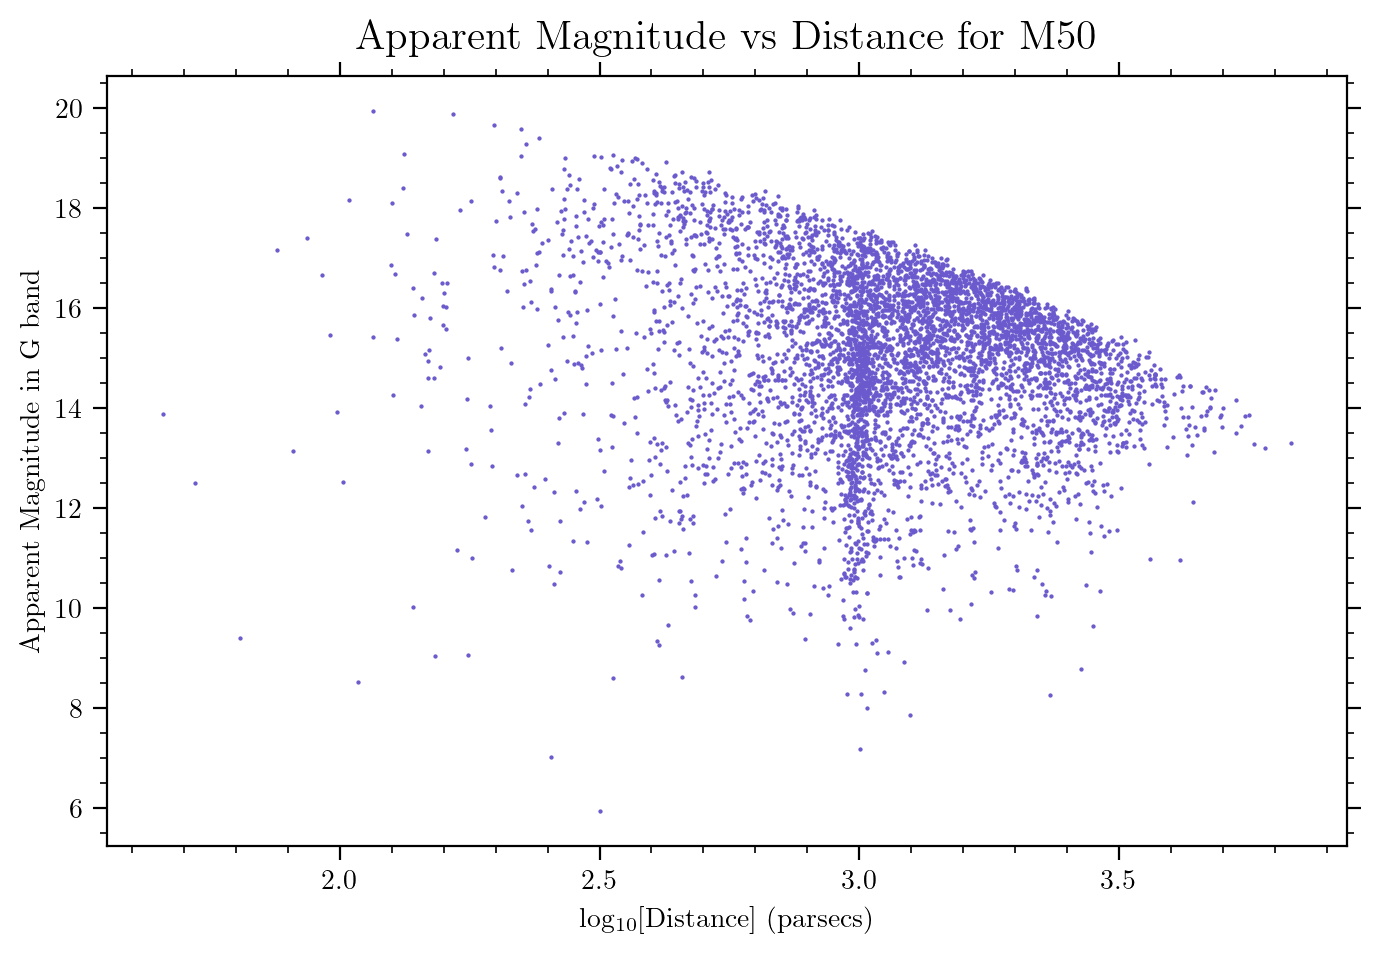

In [14]:
r_m50 = query_gaia('M50')
dist_m50 = plot_appmag_vs_dist('M50', r_m50)

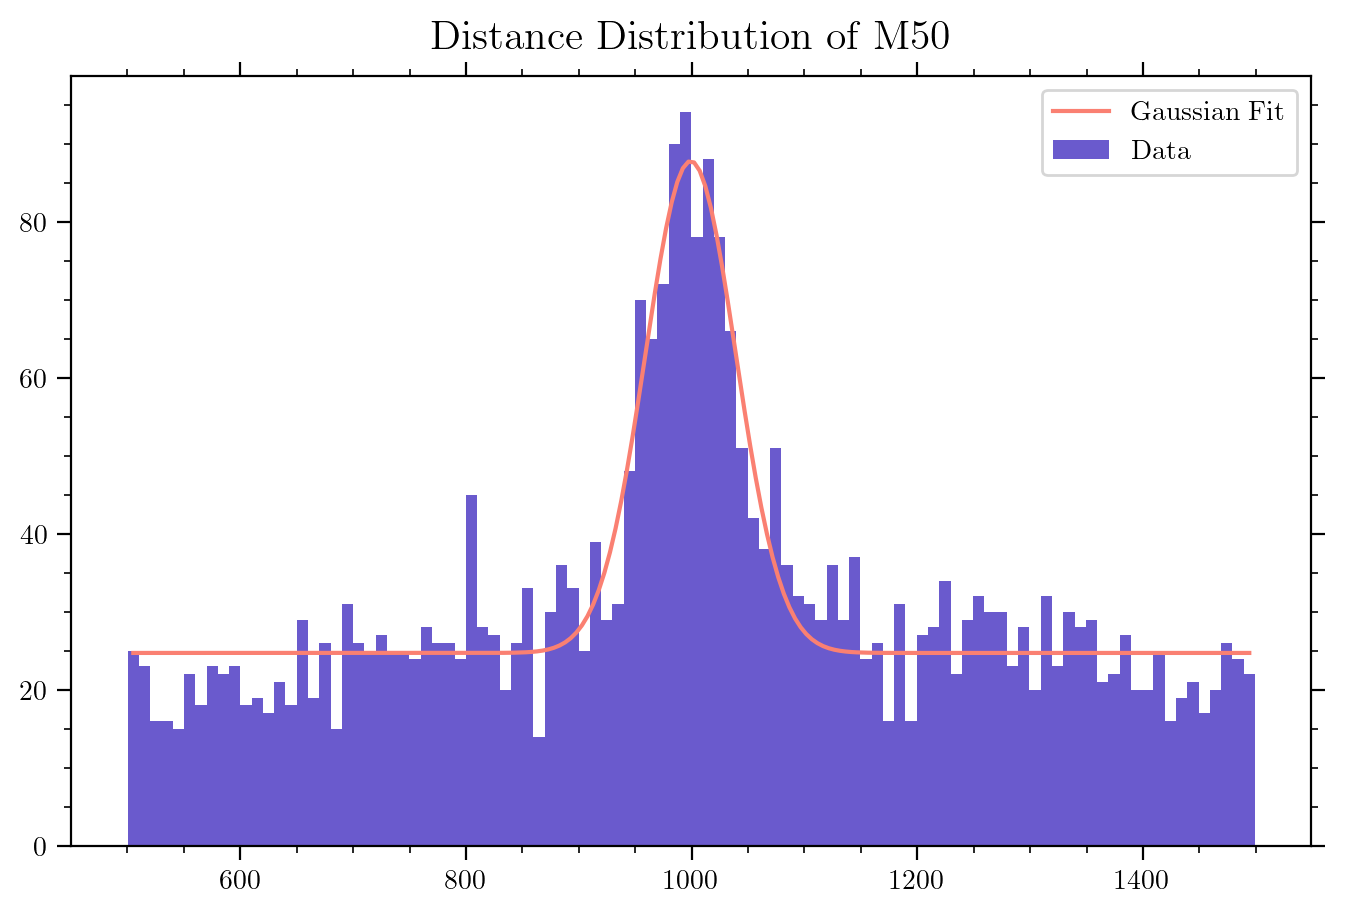

In [15]:
dist_m50 = dist_m50[np.logical_and(dist_m50<1500, dist_m50>500)]
popt_m50 = gauss_fit('M50', dist_m50)

INFO: Query finished. [astroquery.utils.tap.core]


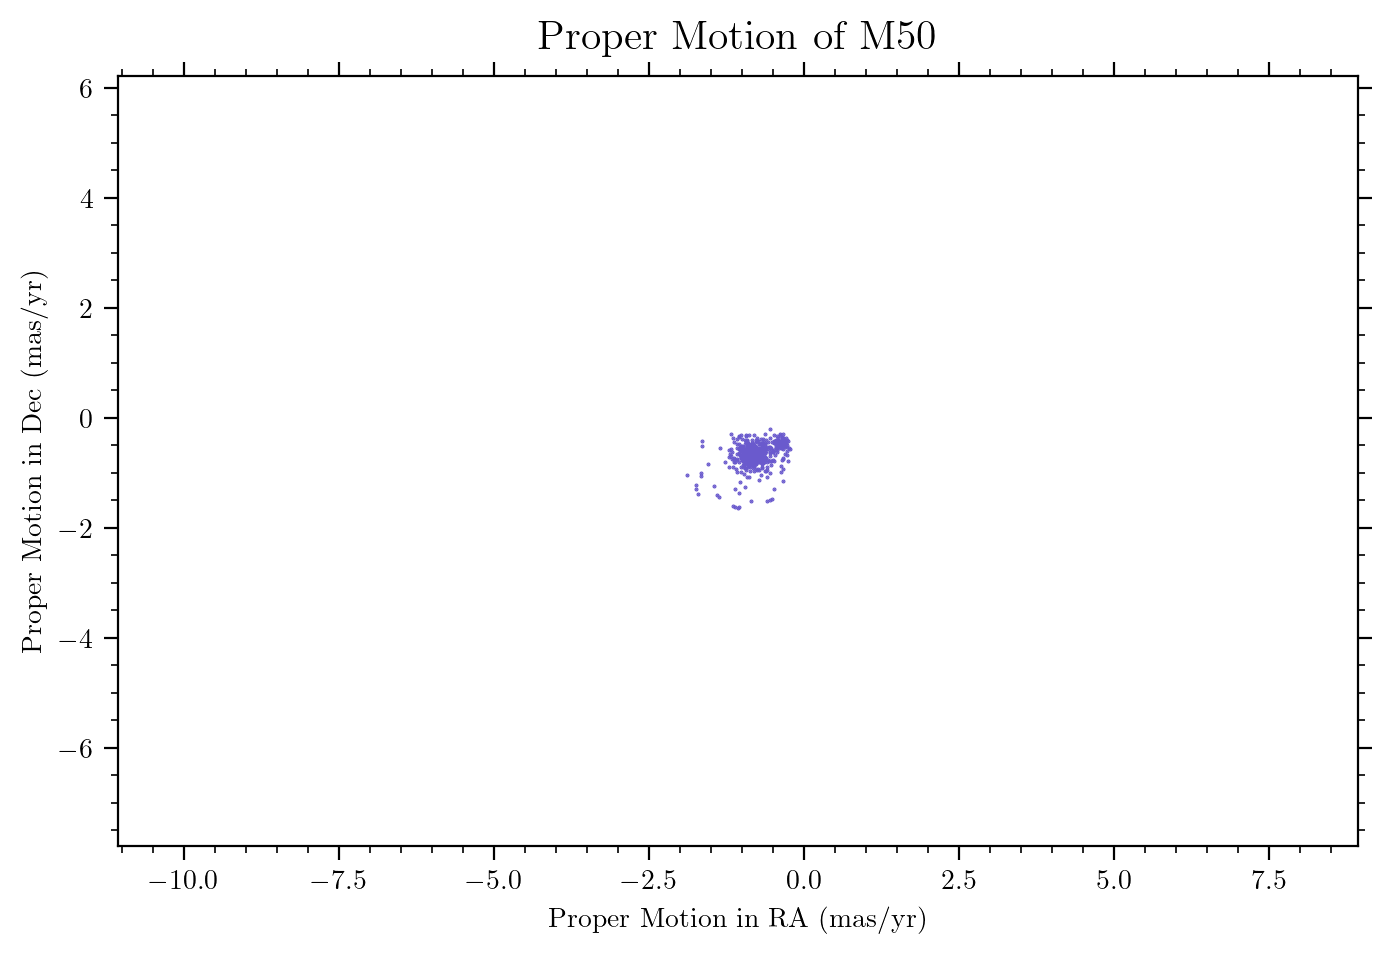

In [16]:
parallax_start_m50, parallax_end_m50 = parallax_cut(dist_m50, popt_m50)
r_m50_2 = plot_pm('M50', parallax_start_m50, parallax_end_m50, 0.2)

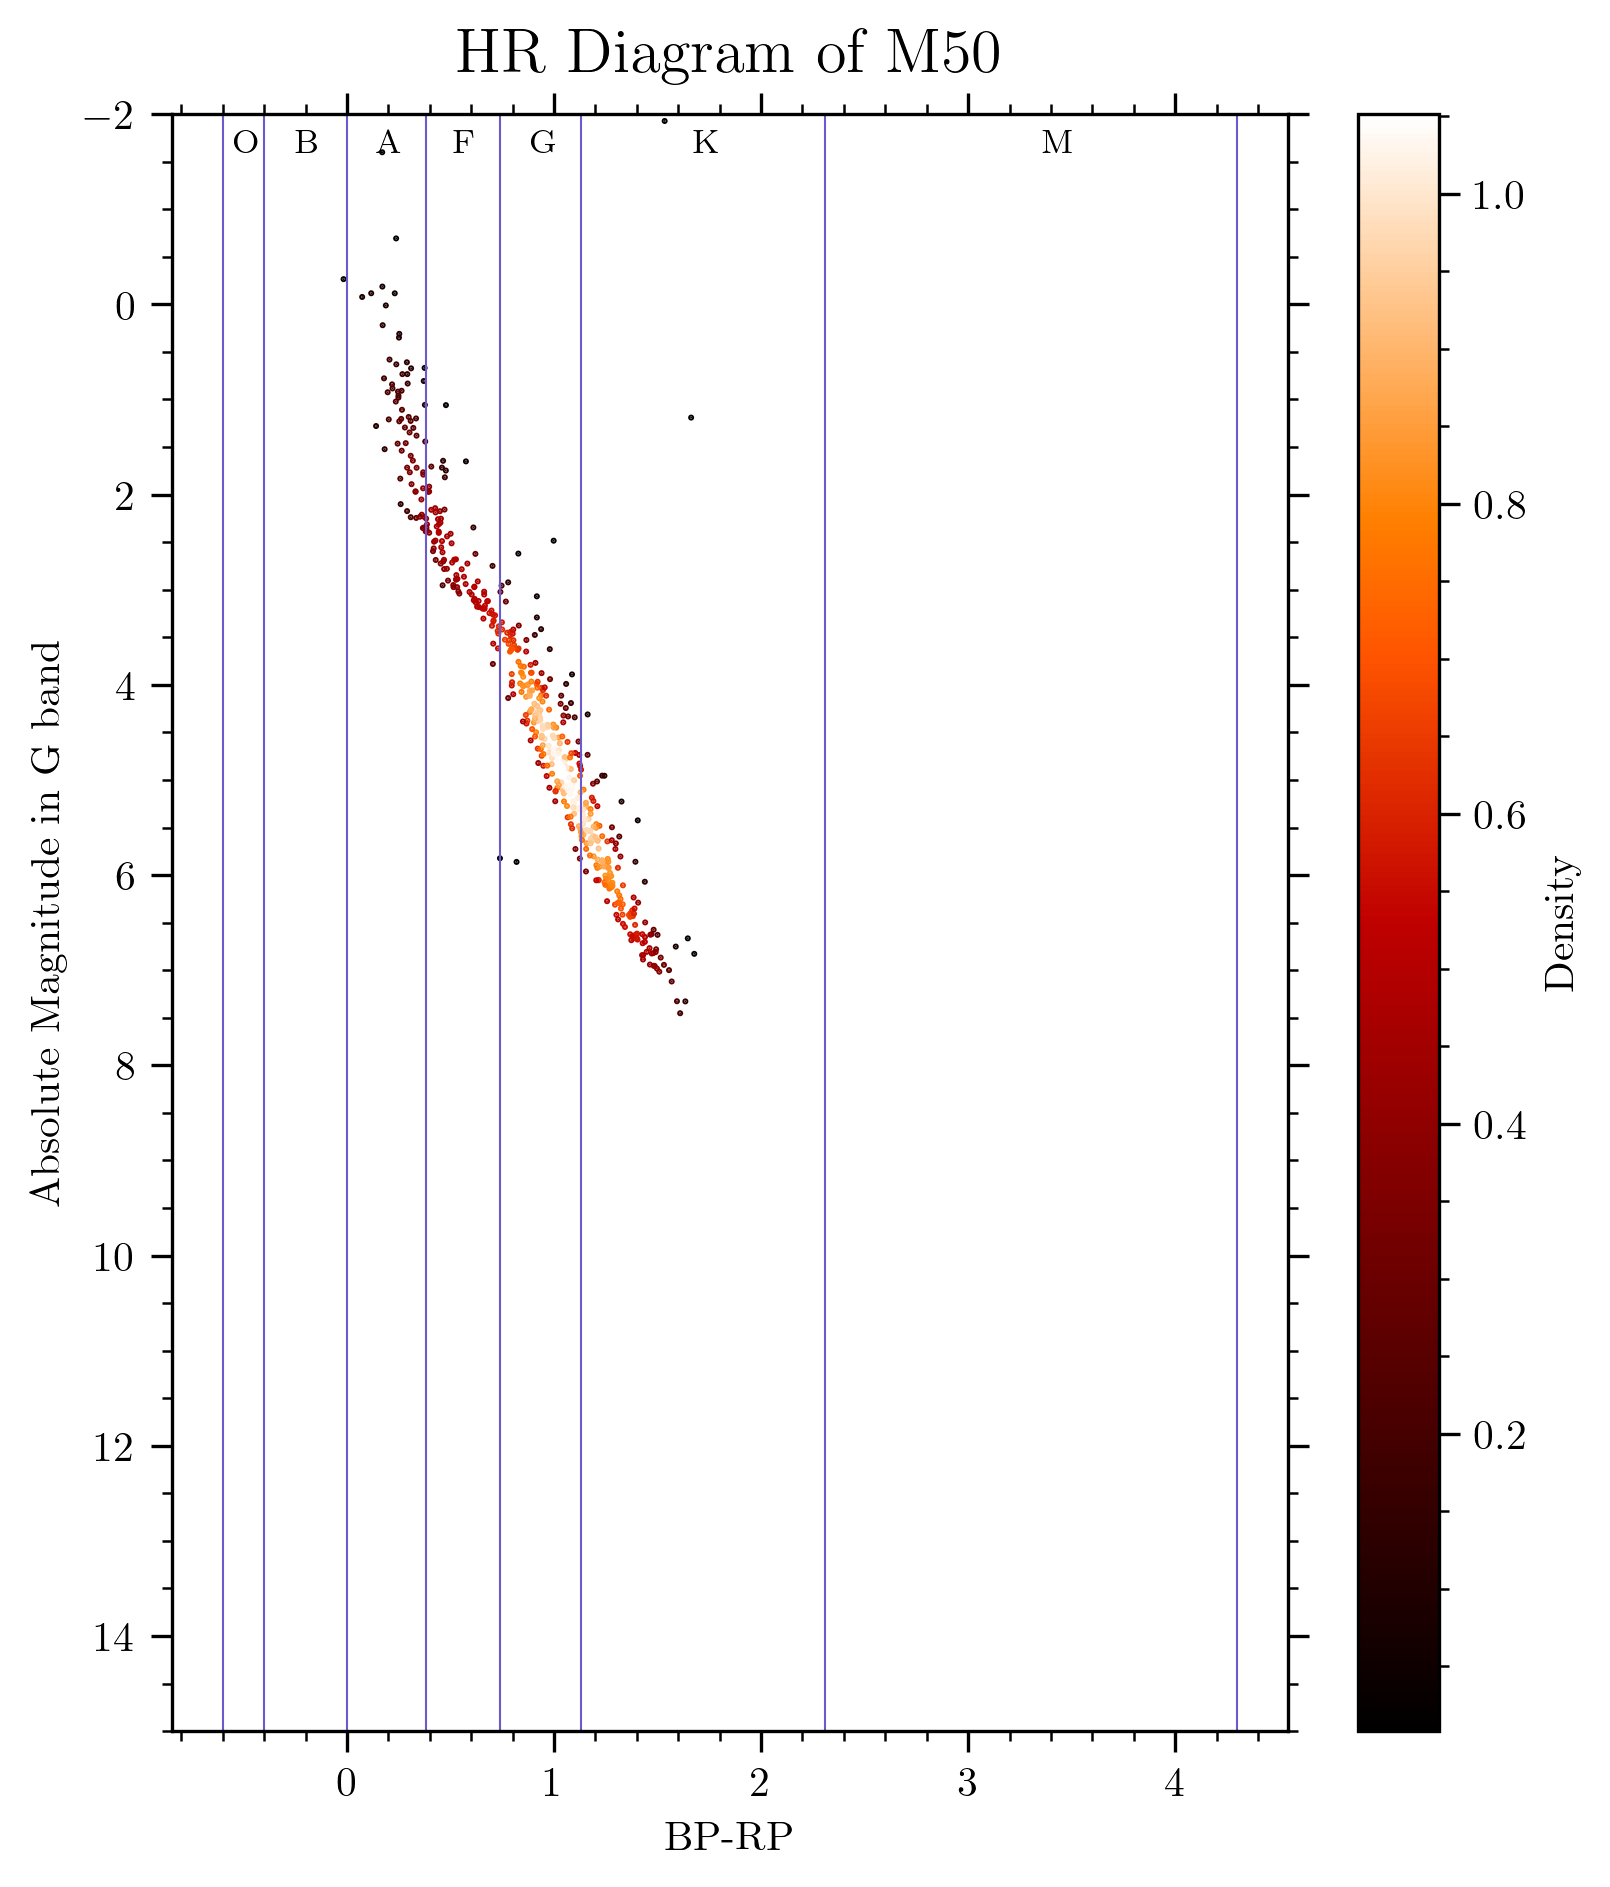

In [17]:
bprp_m50, absmag_m50 = hr_diag('M50', r_m50_2)

In [18]:
perc_in_spec_class('M50', bprp_m50)

Percentage of O type stars in M50 is 0.0%
Percentage of B type stars in M50 is 0.18%
Percentage of A type stars in M50 is 12.41%
Percentage of F type stars in M50 is 18.07%
Percentage of G type stars in M50 is 39.78%
Percentage of K type stars in M50 is 29.56%
Percentage of M type stars in M50 is 0.0%


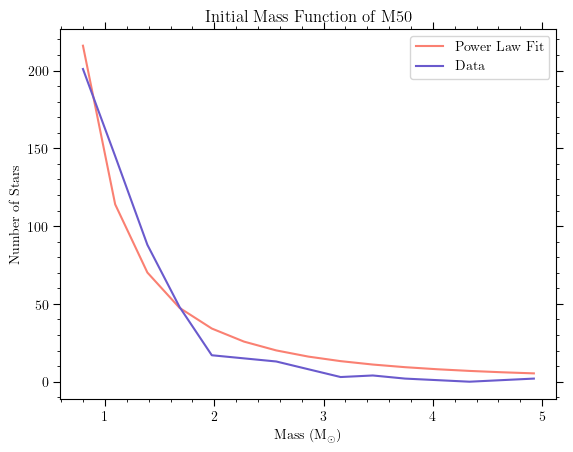

The power law index is 2.0307970866983833


In [61]:
initial_mass_m50 = []

for bprp, absmag in zip(np.array(bprp_m50), np.array(absmag_m50)):
    iso_bprp = iso['G_BPmag'] - iso['G_RPmag']
    iso_absmag = iso['Gmag']
    distance = np.sqrt((iso_bprp - bprp)**2 + (iso_absmag - absmag)**2)
    indices = np.where(distance == np.min(distance))[0]
    initial_mass_m50.append(iso.iloc[indices[0]]['Mass'])

n_m50, bins_m50 = np.histogram(initial_mass_m50, bins=15)
bins_m50 = (bins_m50[1:] + bins_m50[:-1])/2
popt, pcov = curve_fit(powerlaw, bins_m50, n_m50, p0=[1, 2])
plt.plot(bins_m50, powerlaw(bins_m50, *popt), label='Power Law Fit', color='salmon')
plt.plot(bins_m50, n_m50, label='Data', color='slateblue')
plt.ylabel('Number of Stars')
plt.xlabel('Mass (M$_\odot$)')
plt.title('Initial Mass Function of M50')
plt.legend()
plt.show()
print('The power law index is', popt[1])

# **Messier 67**

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Percentage of O type stars in M67 is 0.0%
Percentage of B type stars in M67 is 0.0%
Percentage of A type stars in M67 is 0.73%
Percentage of F type stars in M67 is 9.45%
Percentage of G type stars in M67 is 52.75%
Percentage of K type stars in M67 is 37.07%
Percentage of M type stars in M67 is 0.0%


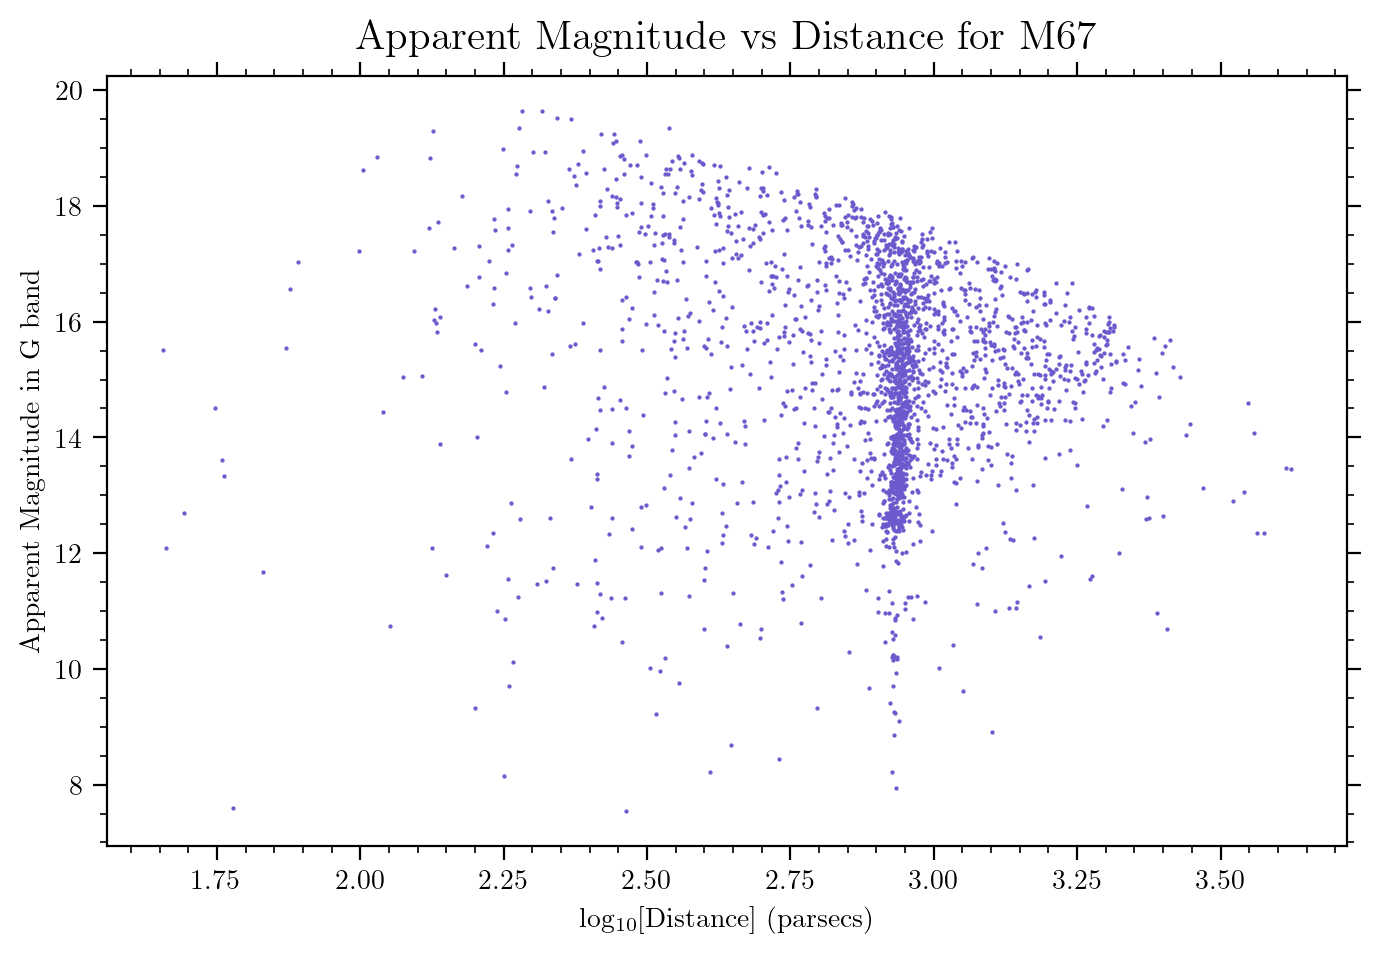

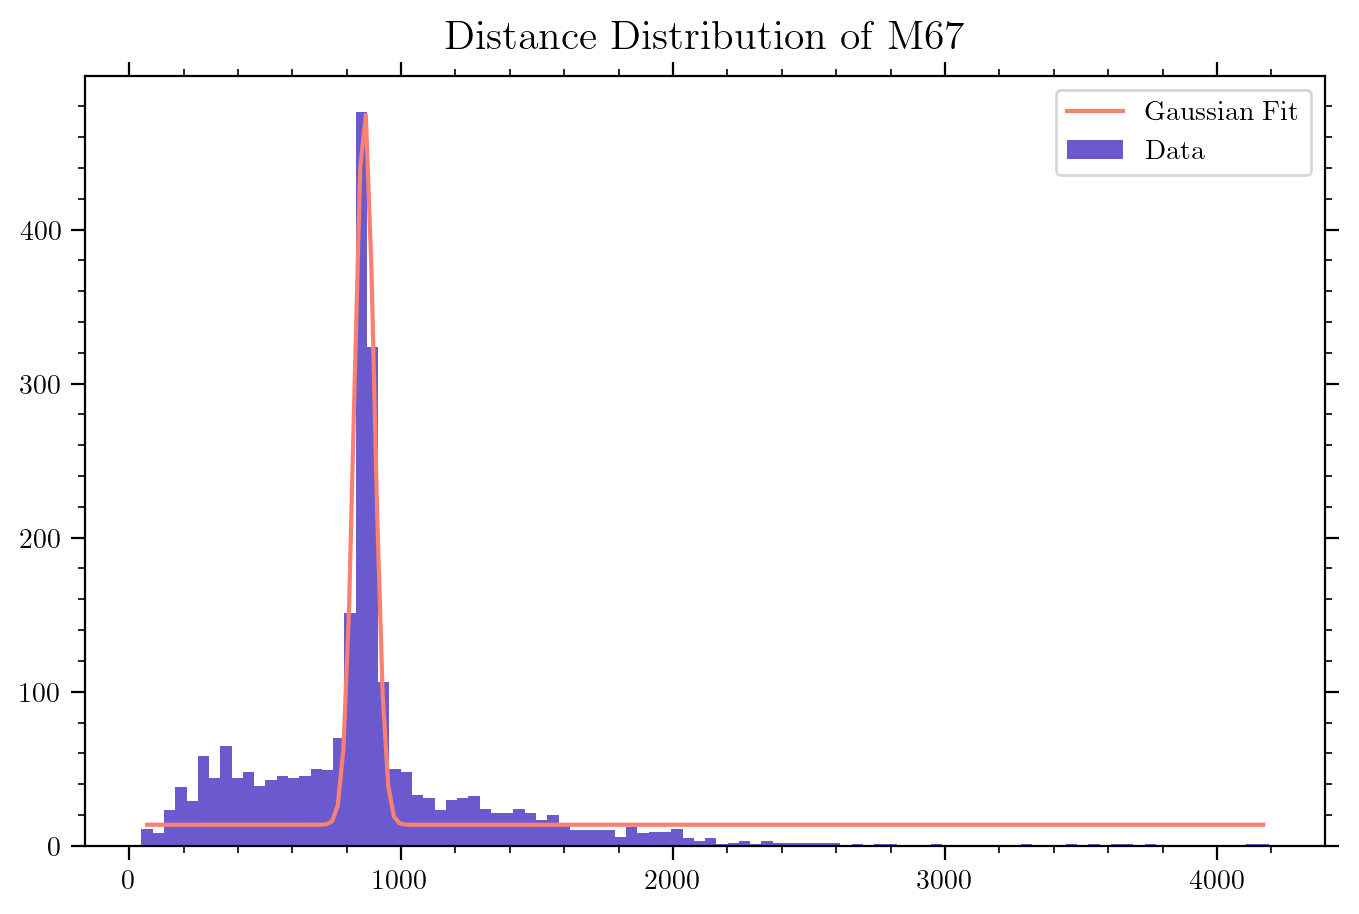

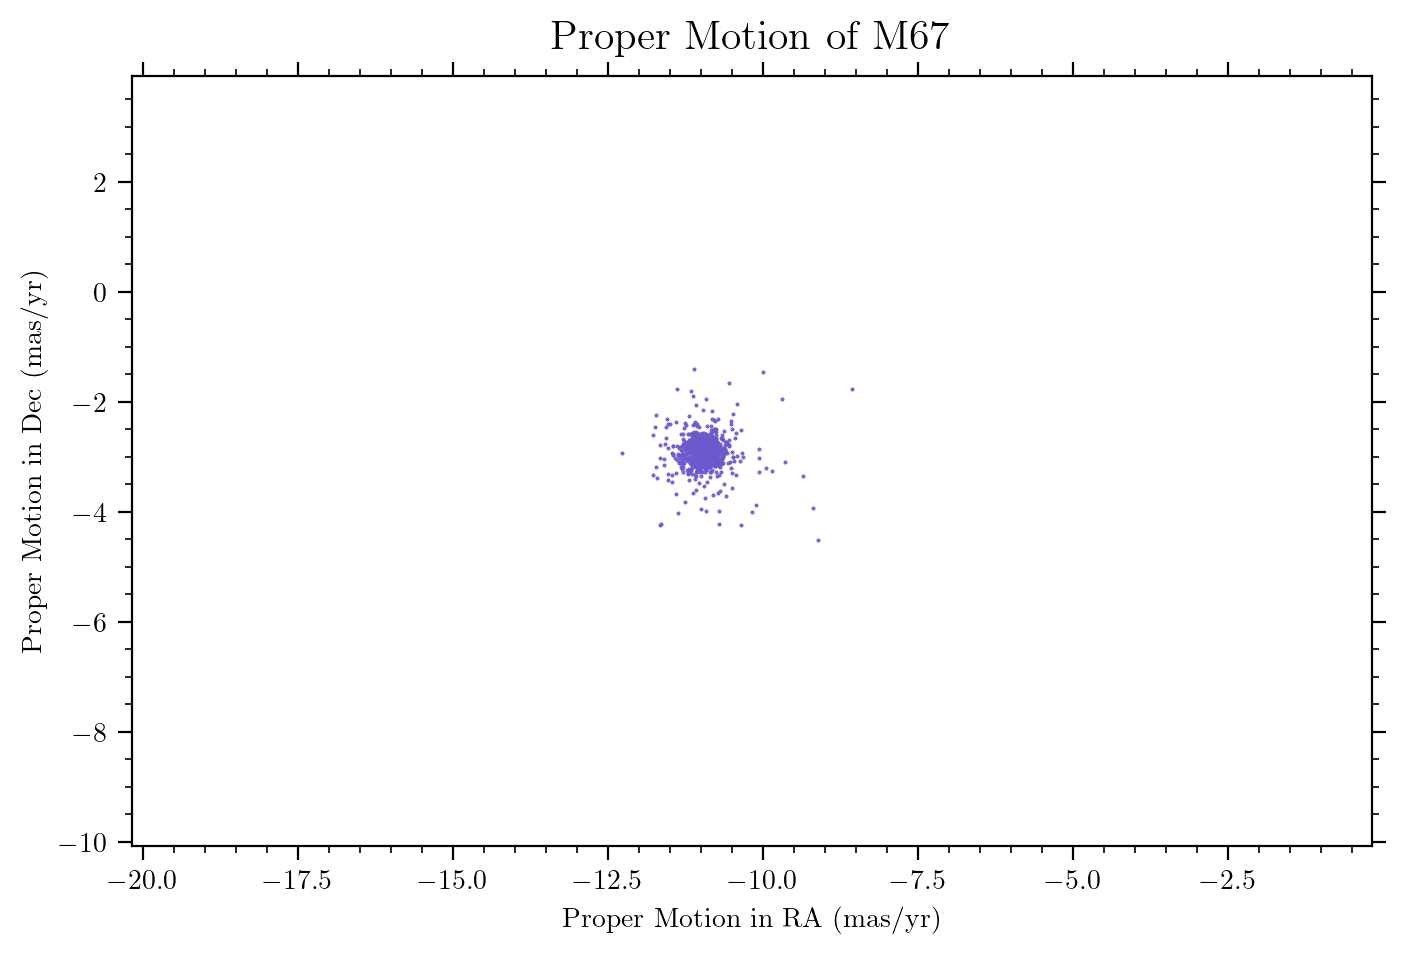

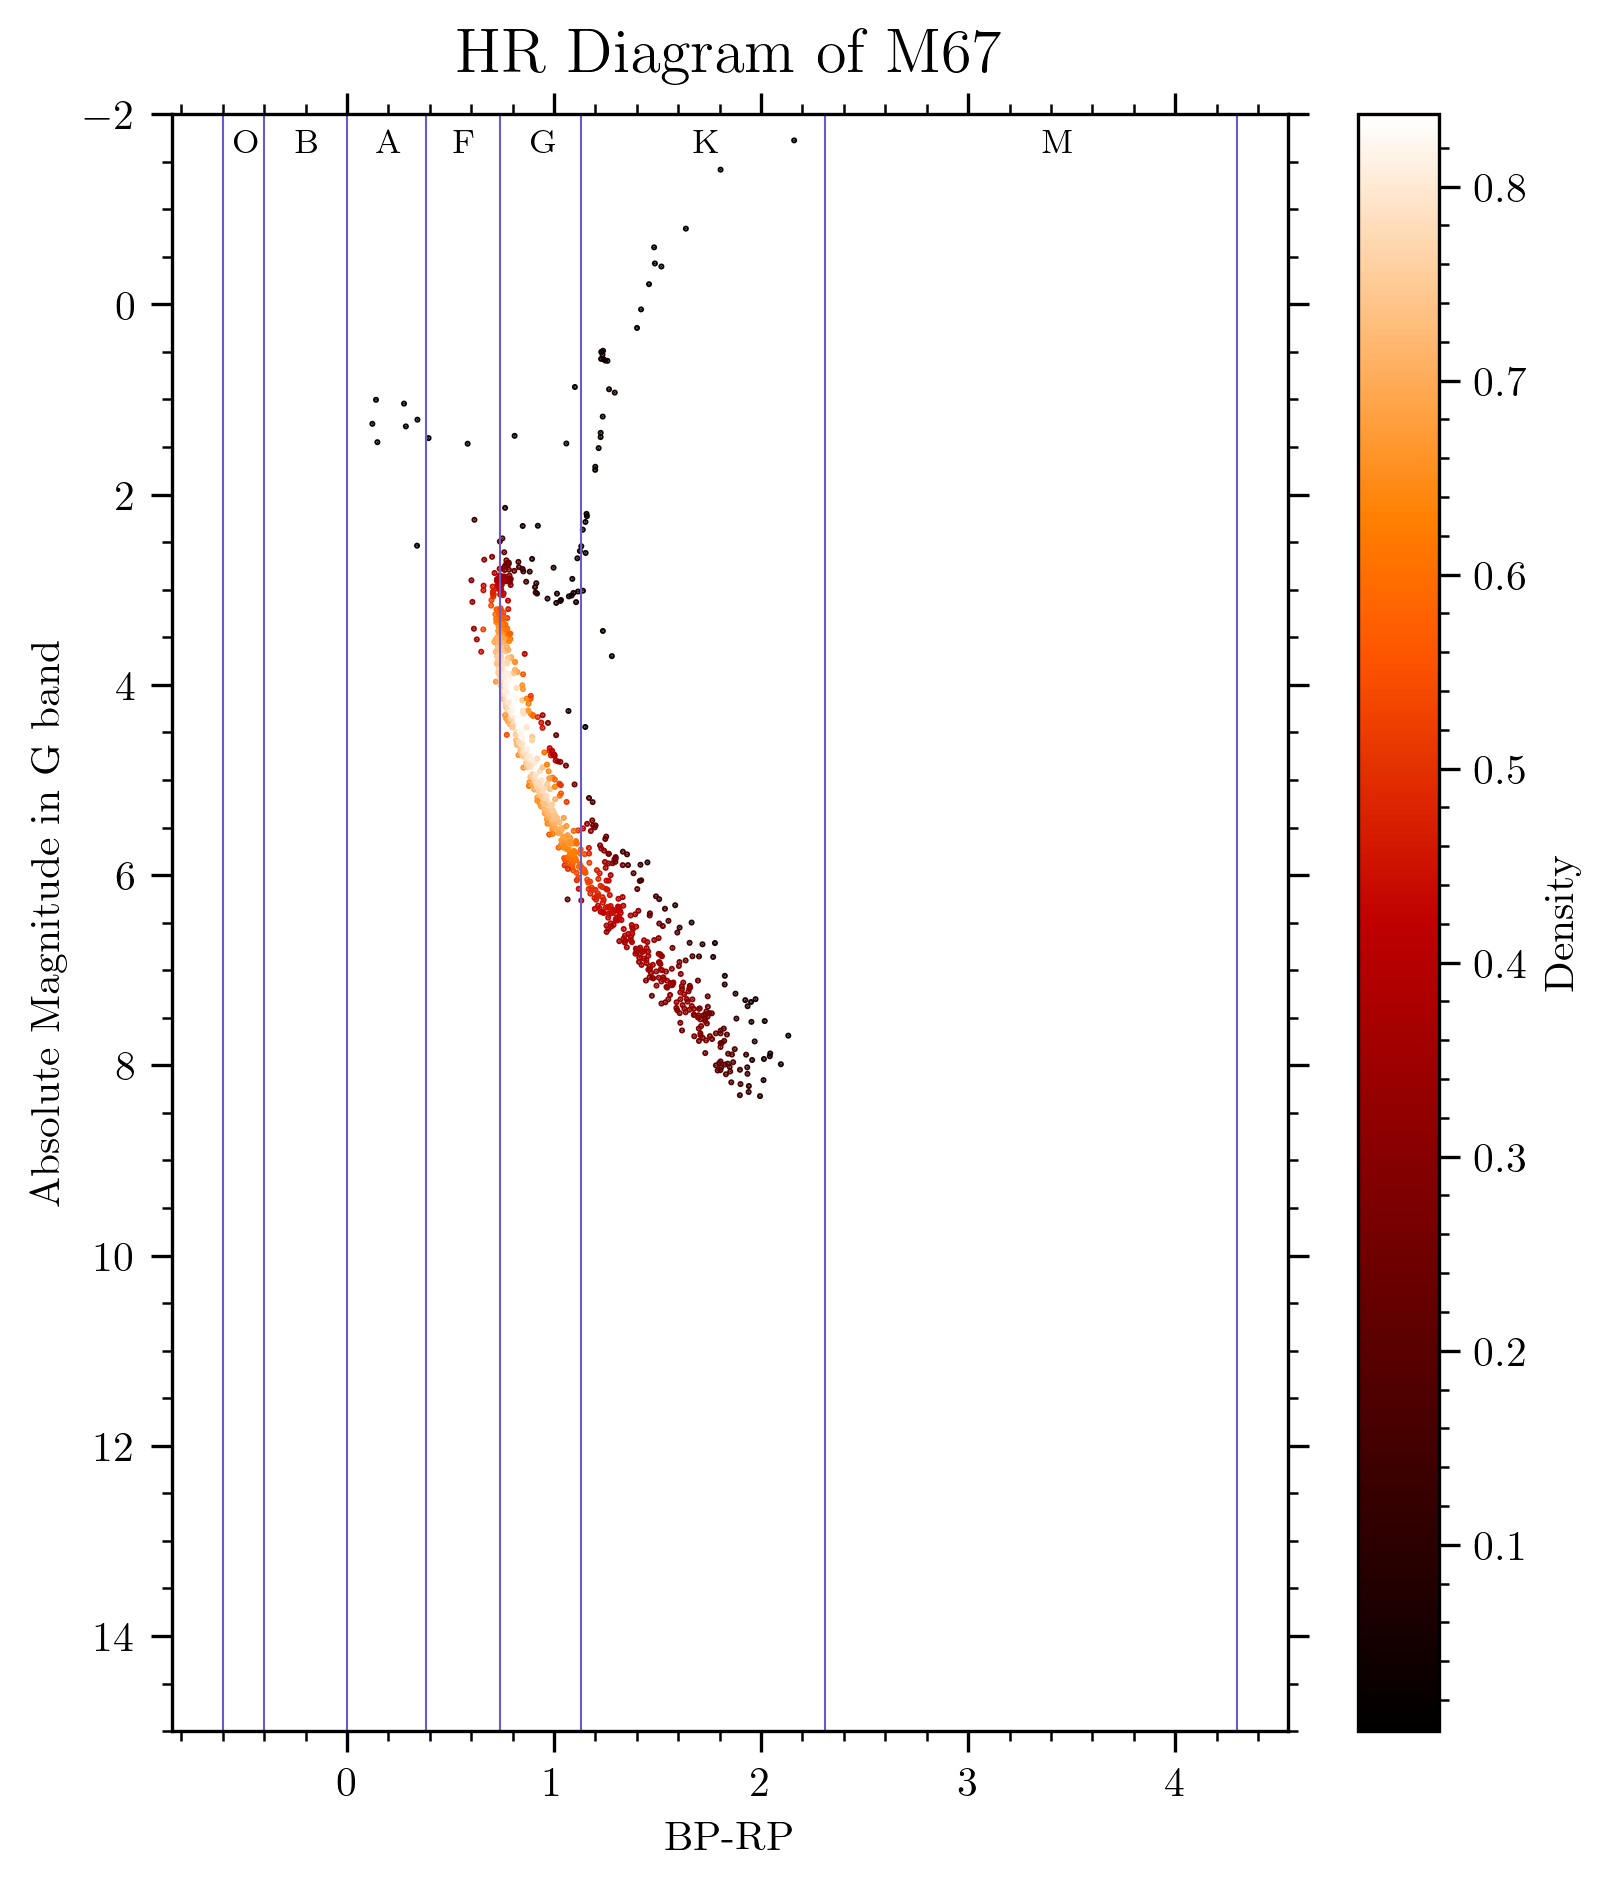

In [14]:
plot_all('M67')

# **Messier 6**

INFO: Query finished. [astroquery.utils.tap.core]


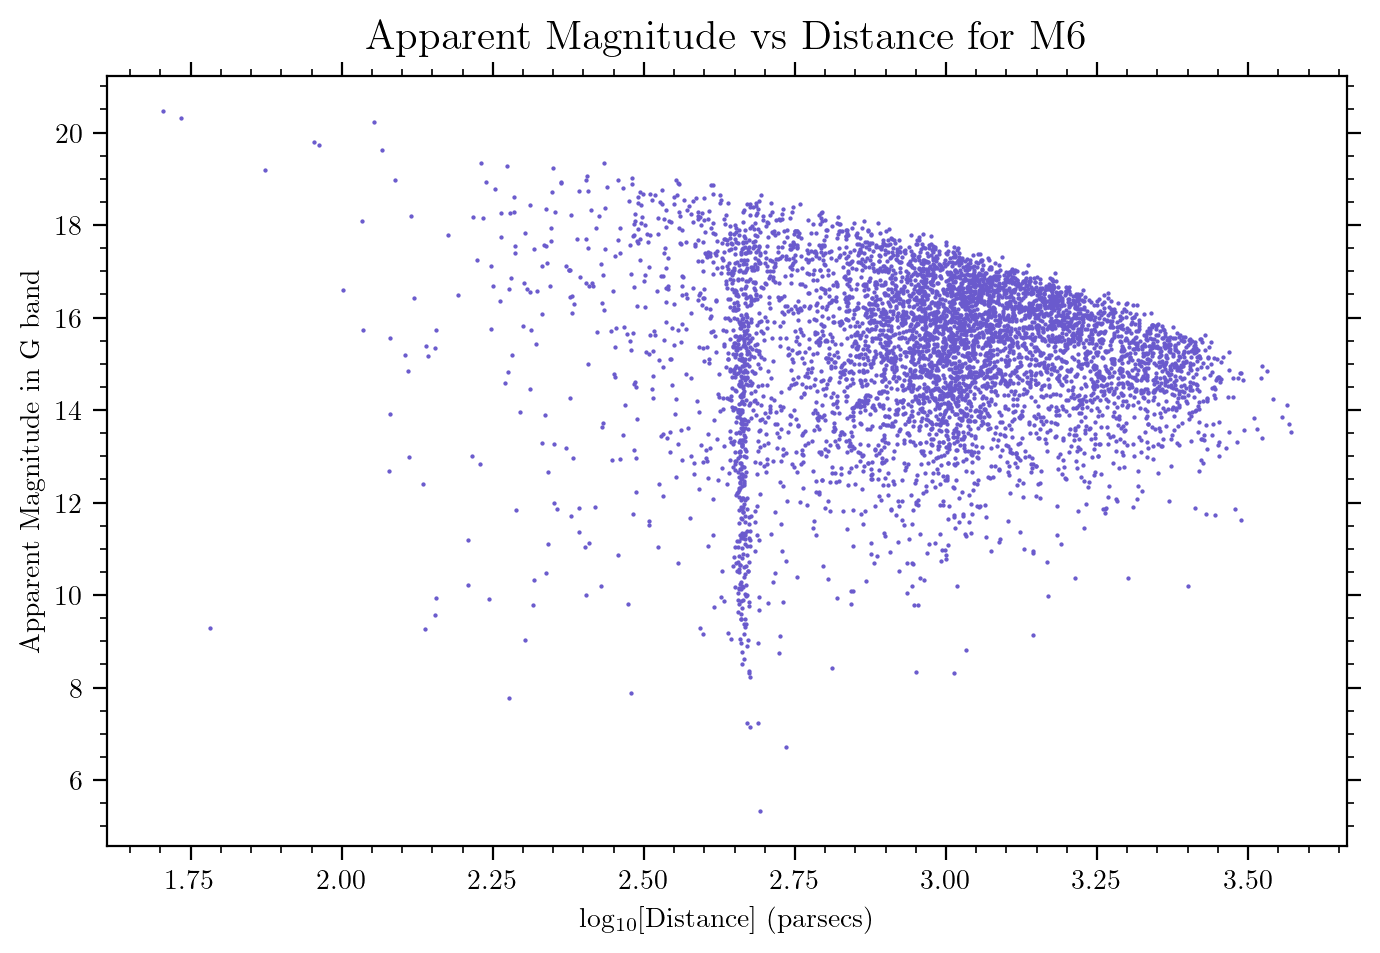

In [63]:
r_m6 = query_gaia('M6')
dist_m6 = plot_appmag_vs_dist('M6', r_m6)

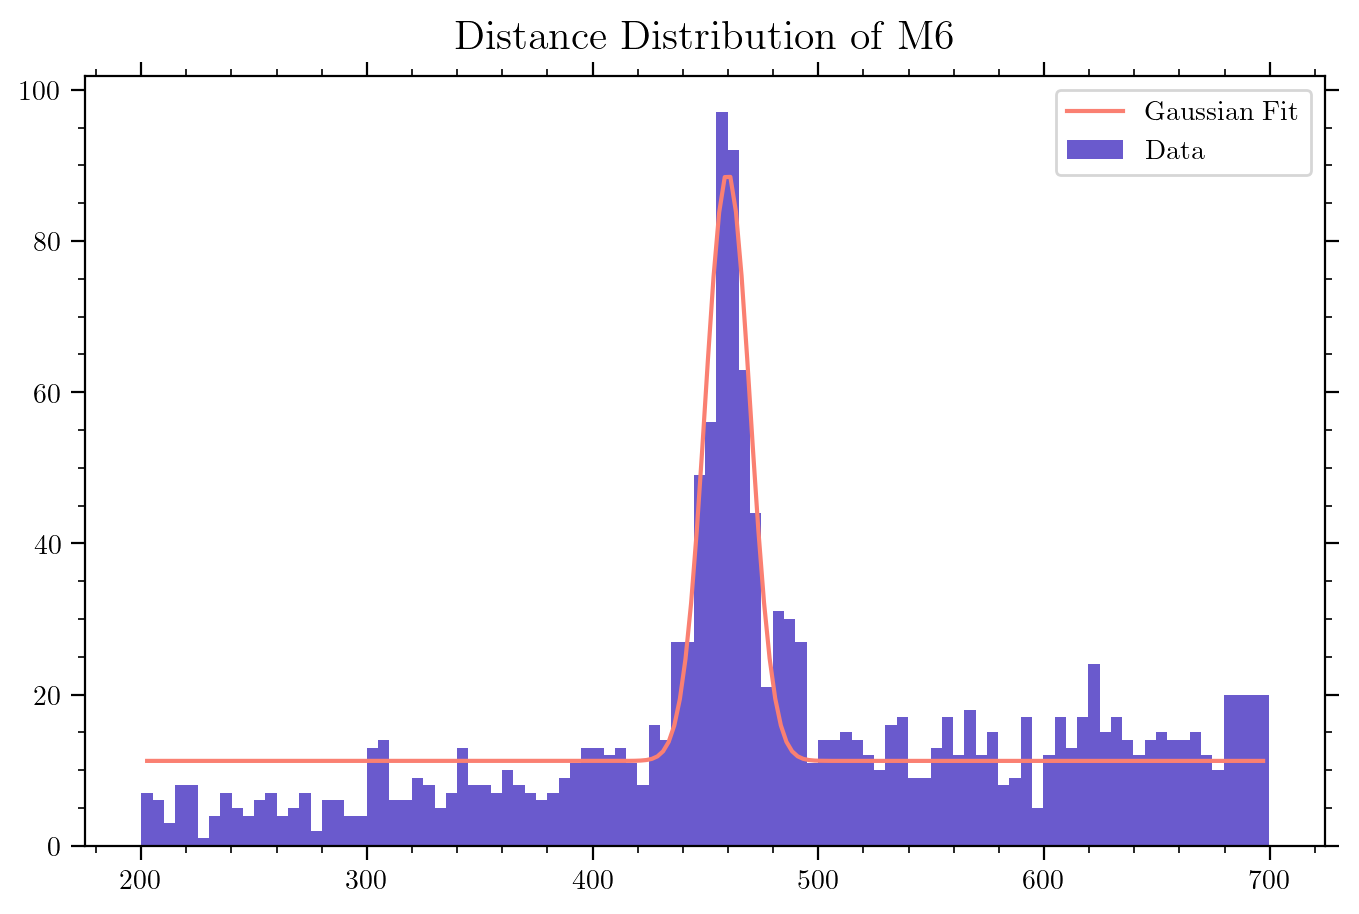

In [64]:
dist_m6 = dist_m6[np.logical_and(dist_m6<700, dist_m6>200)]
popt_m6 = gauss_fit('M6', dist_m6)

INFO: Query finished. [astroquery.utils.tap.core]


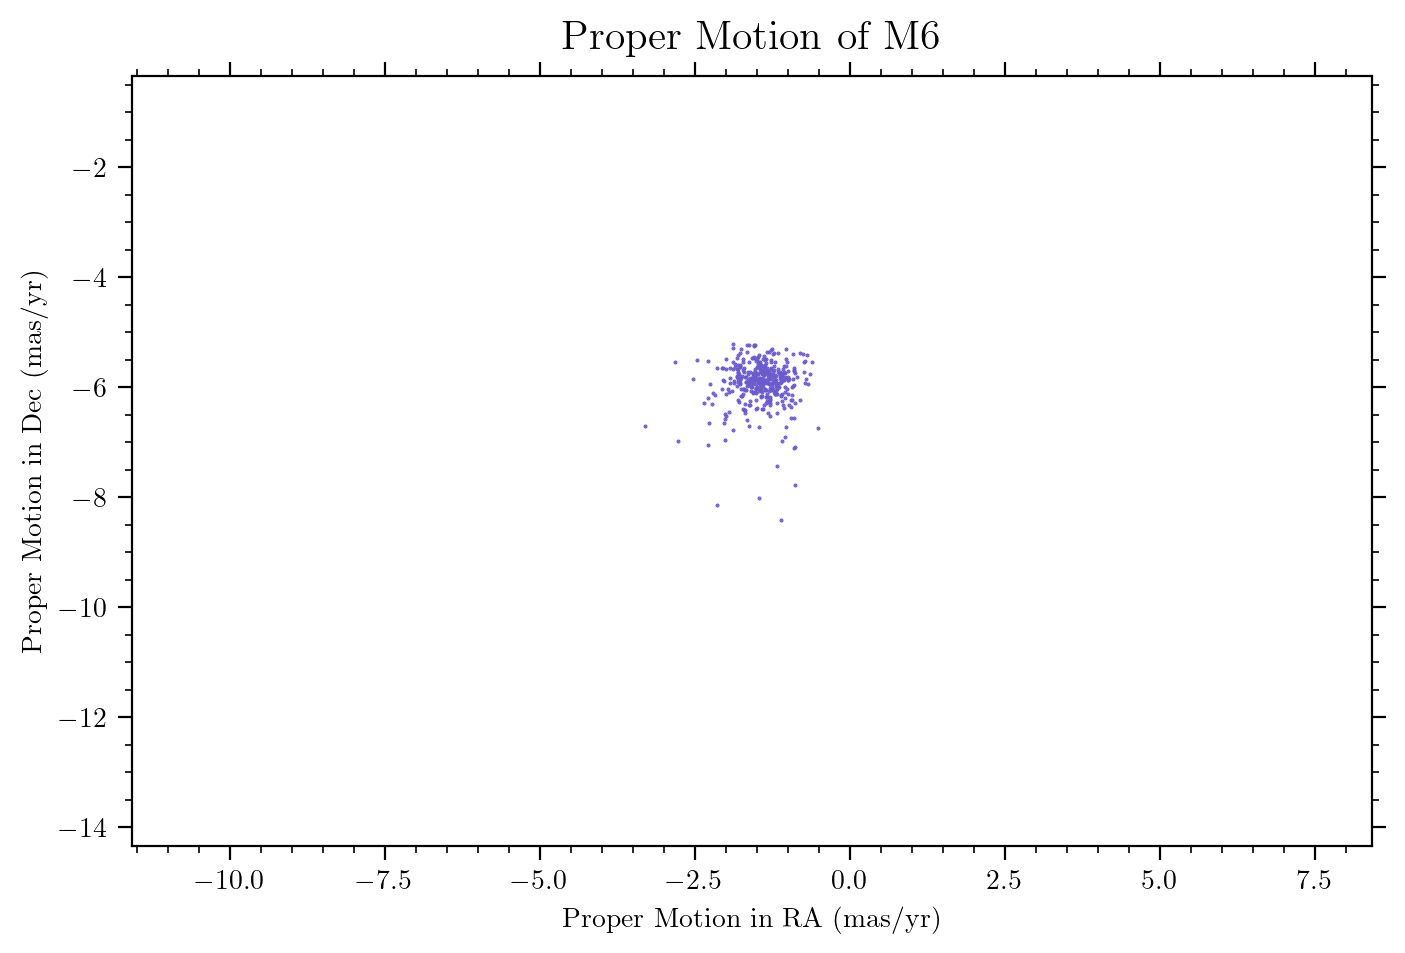

In [65]:
parallax_start_m6, parallax_end_m6 = parallax_cut(dist_m6, popt_m6)
r_m6_2 = plot_pm('M6', parallax_start_m6, parallax_end_m6, 0.3)

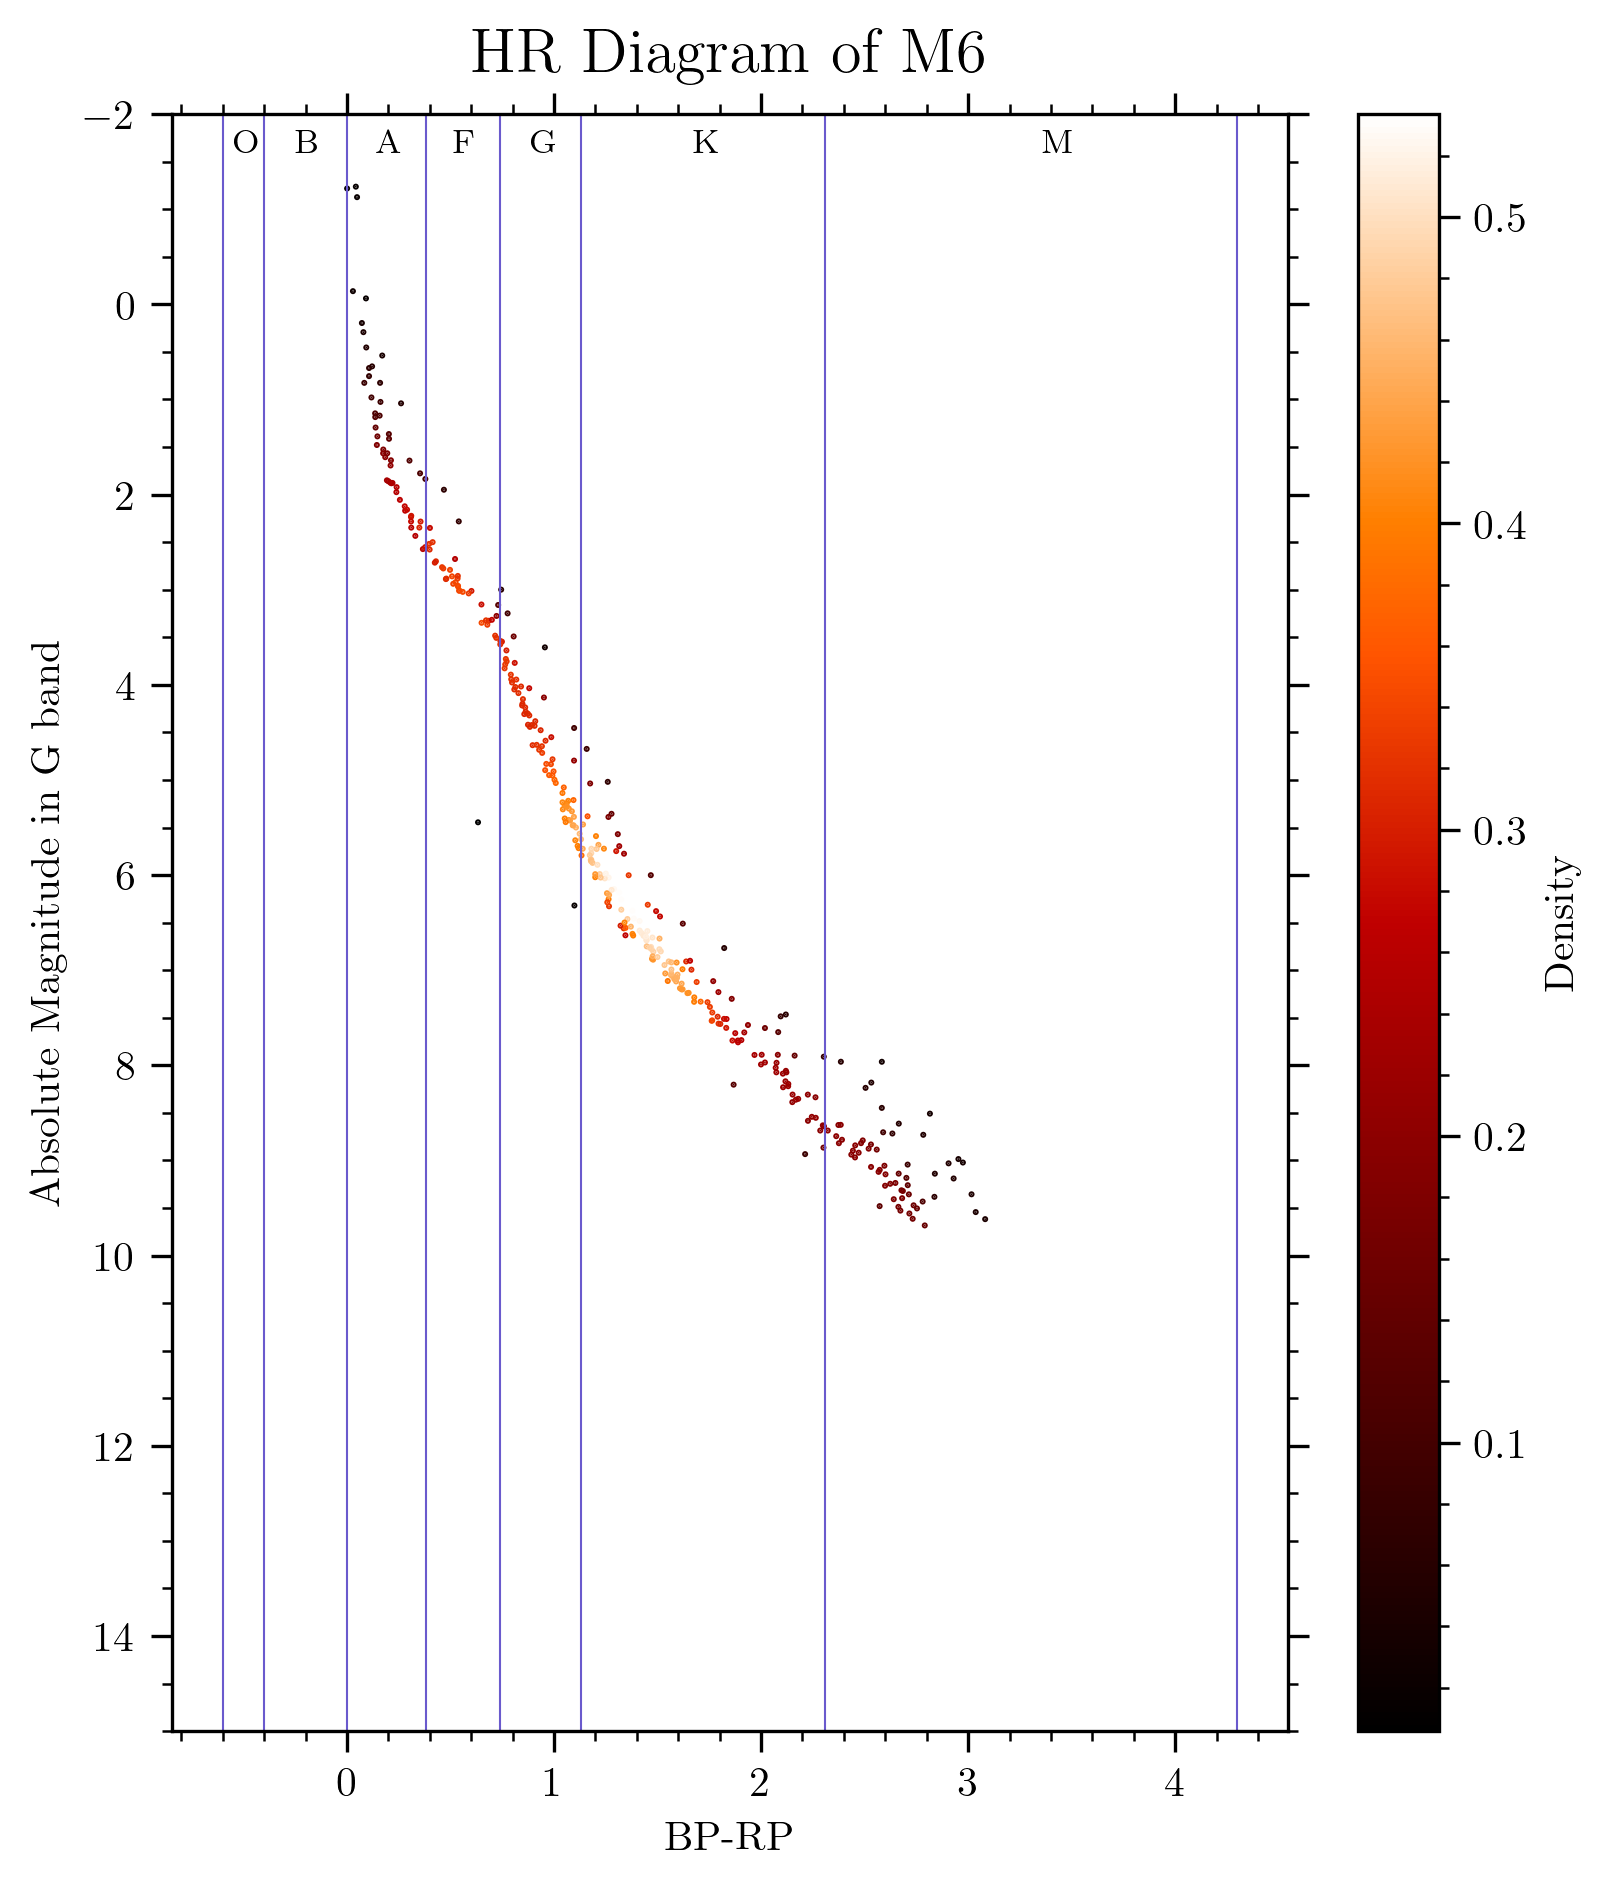

In [66]:
bprp_m6, absmag_m6 = hr_diag('M6', r_m6_2)

In [67]:
perc_in_spec_class('M6', bprp_m6)

Percentage of O type stars in M6 is 0.0%
Percentage of B type stars in M6 is 0.0%
Percentage of A type stars in M6 is 13.4%
Percentage of F type stars in M6 is 9.18%
Percentage of G type stars in M6 is 19.85%
Percentage of K type stars in M6 is 42.43%
Percentage of M type stars in M6 is 15.14%


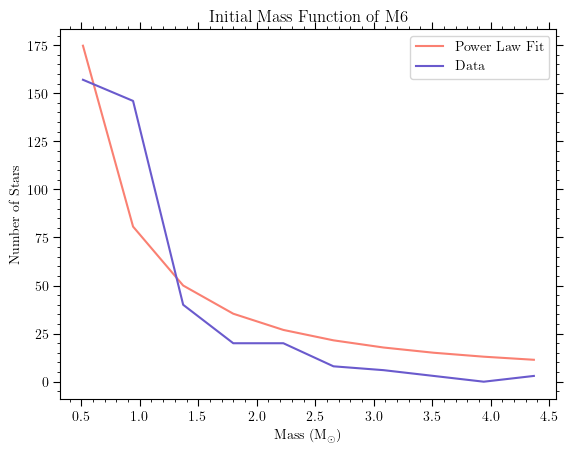

The power law index is 1.275586861806693


In [72]:
initial_mass_m6 = []

for bprp, absmag in zip(np.array(bprp_m6), np.array(absmag_m6)):
    iso_bprp = iso['G_BPmag'] - iso['G_RPmag']
    iso_absmag = iso['Gmag']
    distance = np.sqrt((iso_bprp - bprp)**2 + (iso_absmag - absmag)**2)
    indices = np.where(distance == np.min(distance))[0]
    initial_mass_m6.append(iso.iloc[indices[0]]['Mass'])

n_m6, bins_m6 = np.histogram(initial_mass_m6, bins=10)
bins_m6 = (bins_m6[1:] + bins_m6[:-1])/2
popt, pcov = curve_fit(powerlaw, bins_m6, n_m6, p0=[1, 2])
plt.plot(bins_m6, powerlaw(bins_m6, *popt), label='Power Law Fit', color='salmon')
plt.plot(bins_m6, n_m6, label='Data', color='slateblue')
plt.ylabel('Number of Stars')
plt.xlabel('Mass (M$_\odot$)')
plt.title('Initial Mass Function of M6')
plt.legend()
plt.show()
print('The power law index is', popt[1])

# **Messier 7**

INFO: Query finished. [astroquery.utils.tap.core]


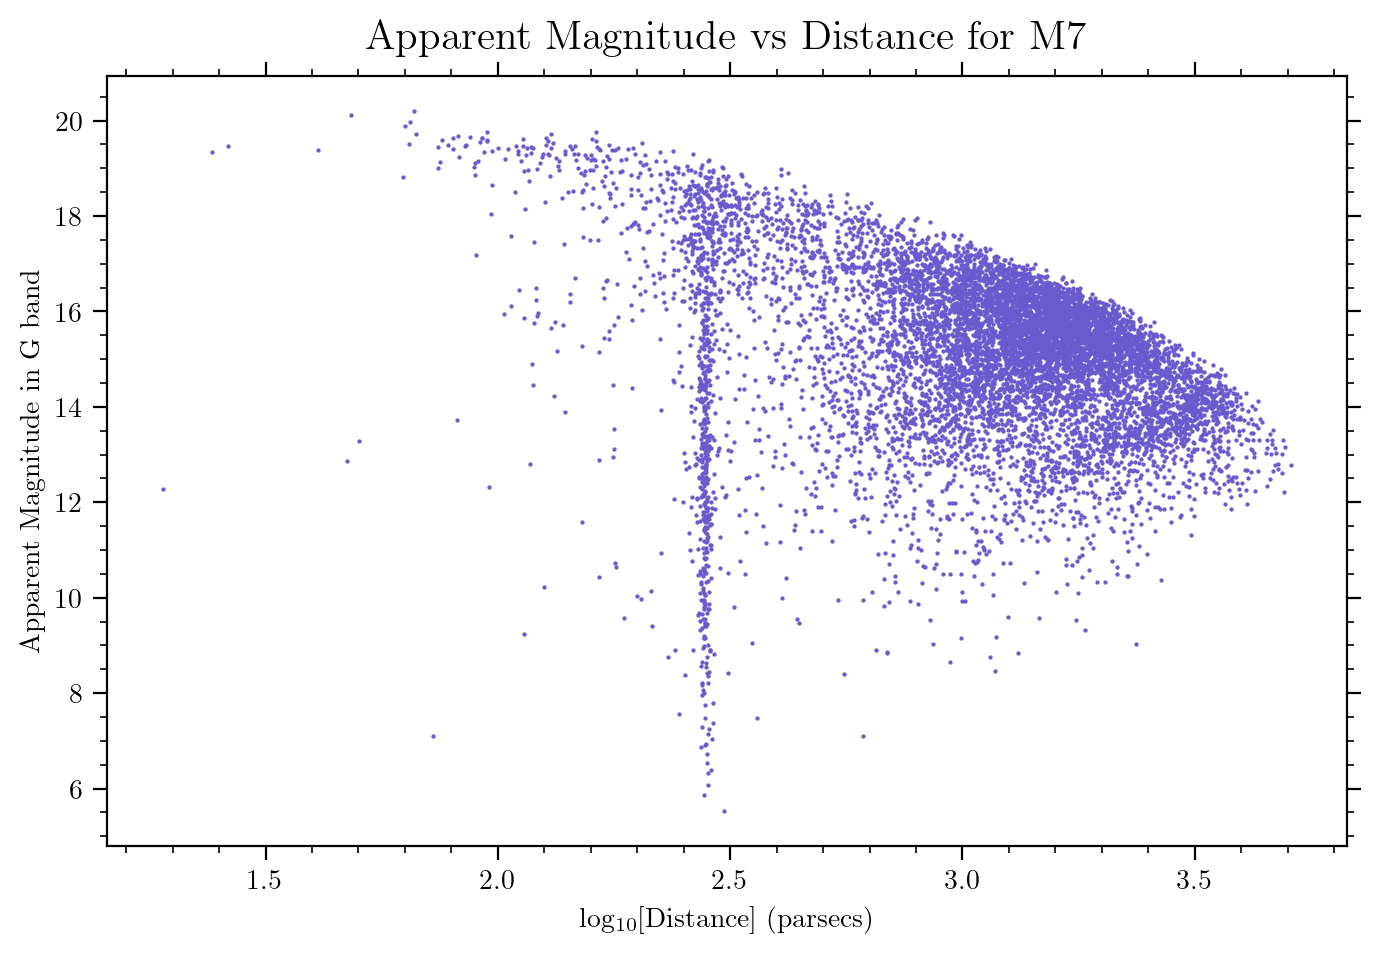

In [73]:
r_m7 = query_gaia('M7')
dist_m7 = plot_appmag_vs_dist('M7', r_m7)

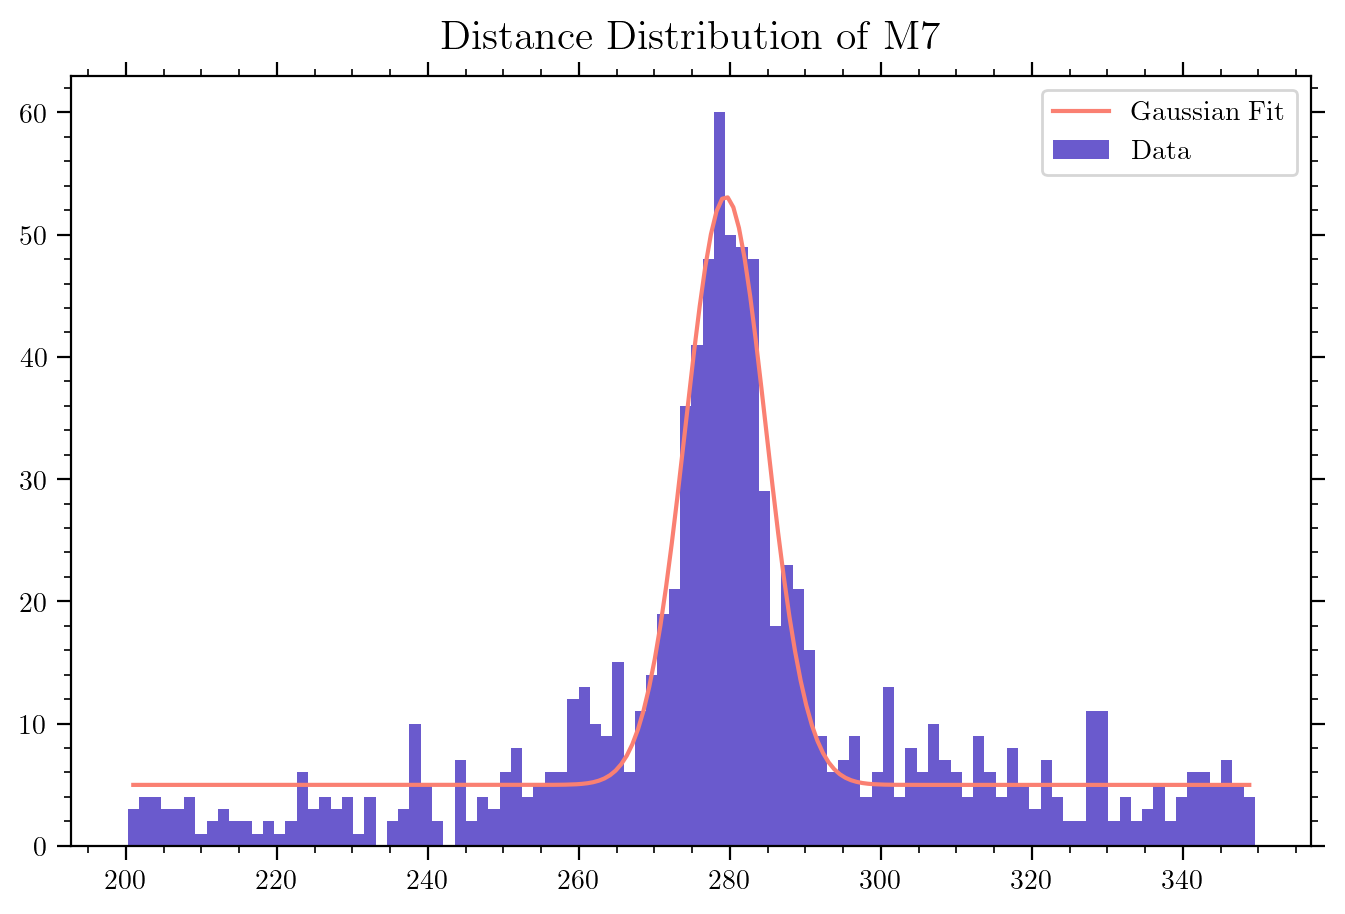

In [74]:
dist_m7 = dist_m7[np.logical_and(dist_m7<350, dist_m7>200)]
popt_m7 = gauss_fit('M7', dist_m7)

INFO: Query finished. [astroquery.utils.tap.core]


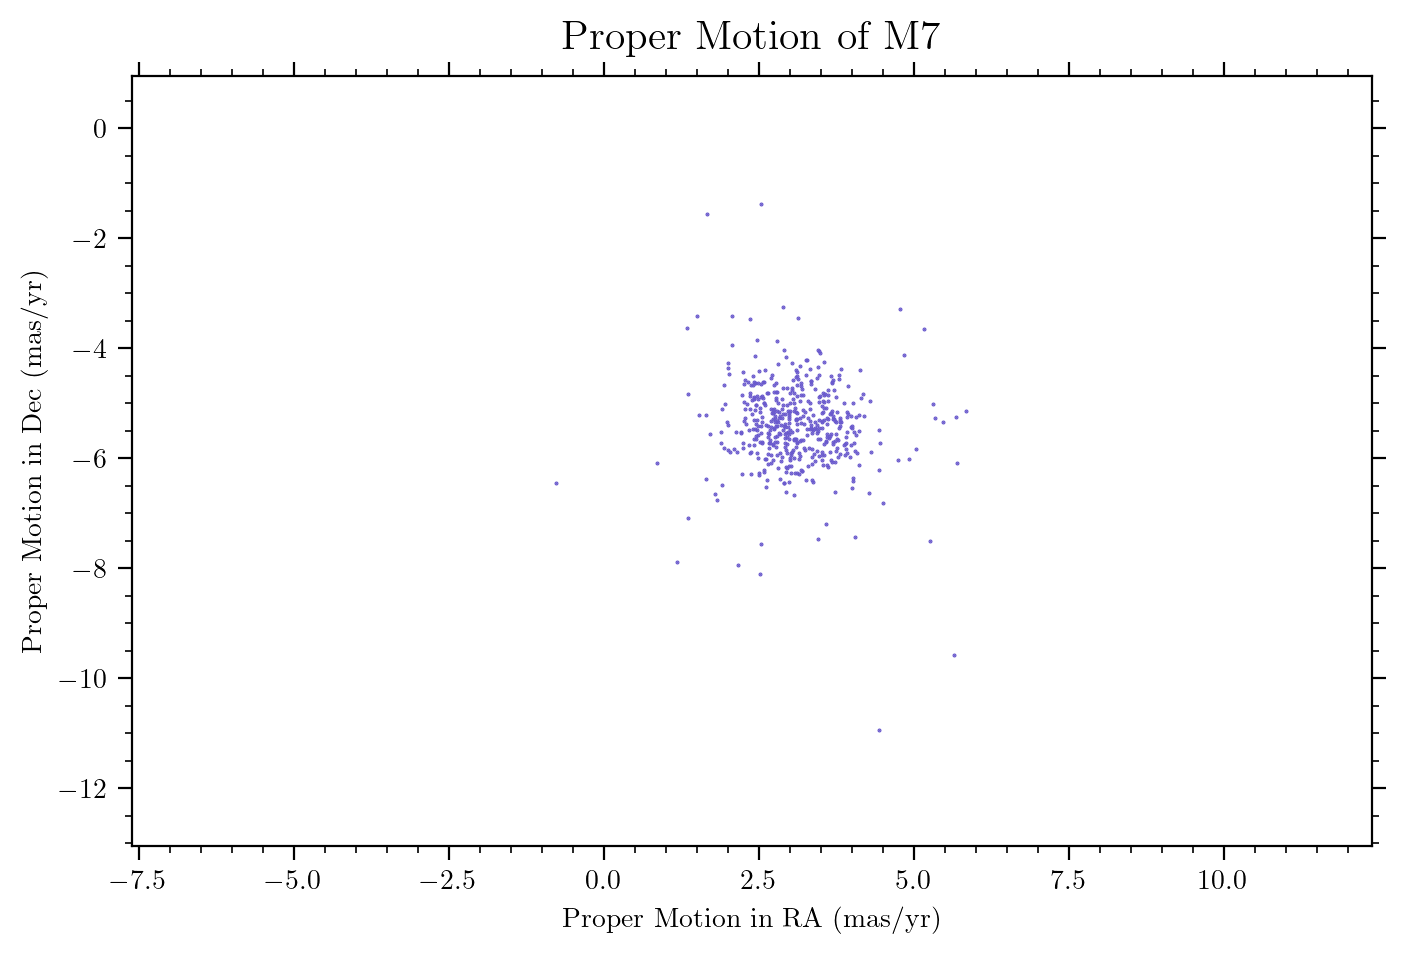

In [75]:
parallax_start_m7, parallax_end_m7 = parallax_cut(dist_m7, popt_m7)
r_m7_2 = plot_pm('M7', parallax_start_m7, parallax_end_m7, 1)

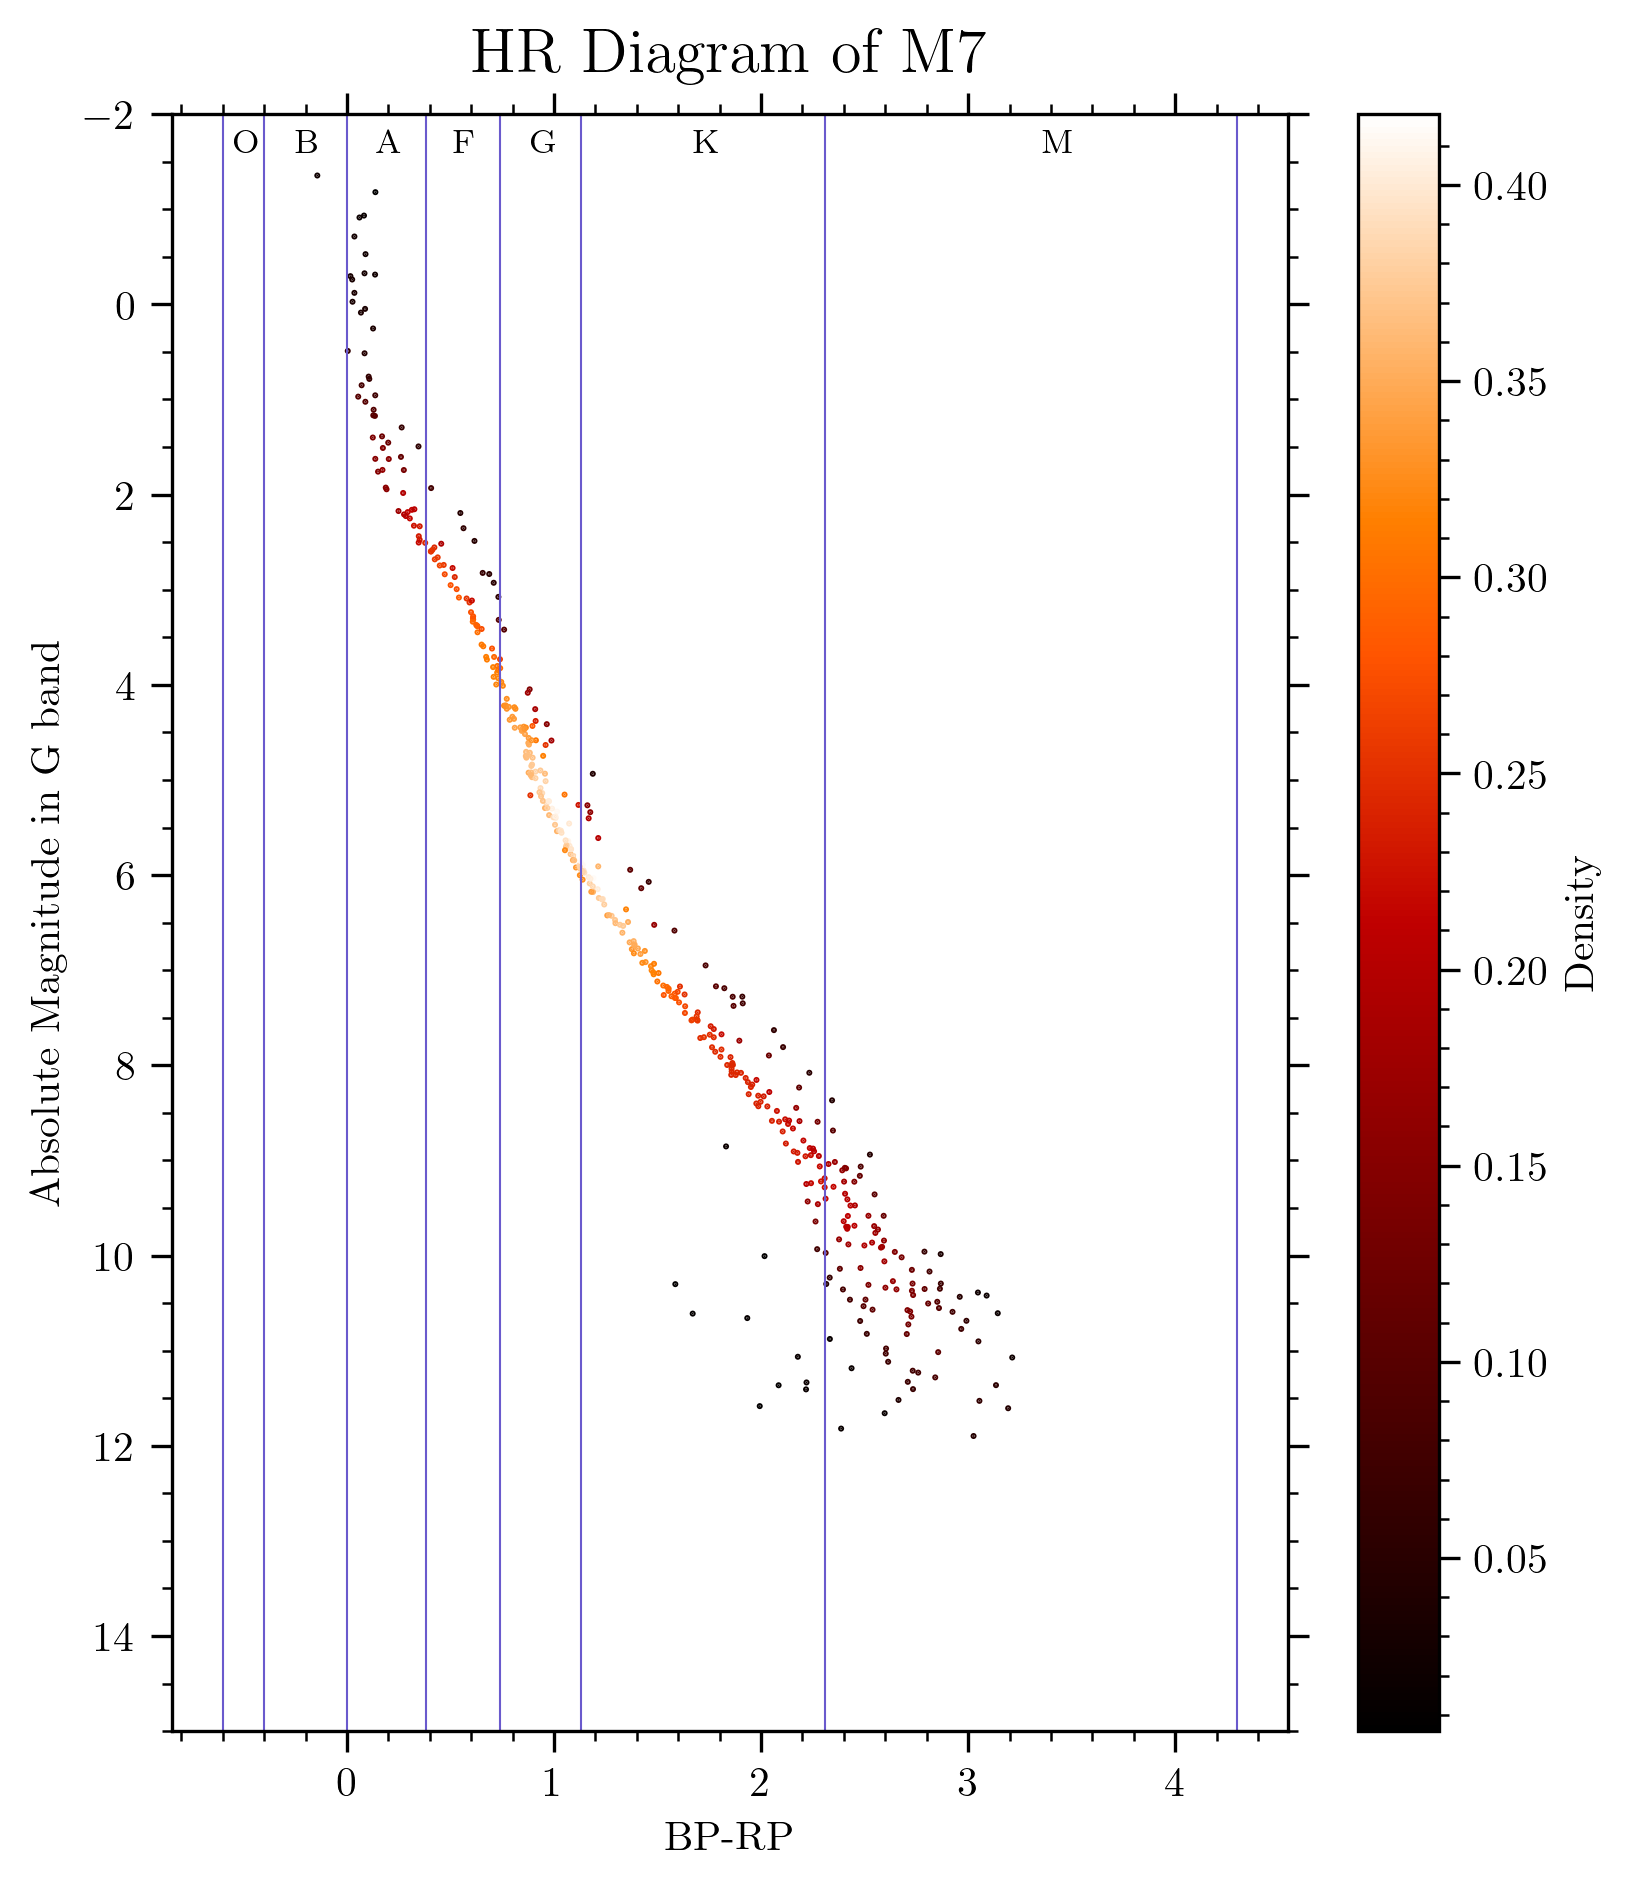

In [76]:
bprp_m7, absmag_m7 = hr_diag('M7', r_m7_2)

In [77]:
perc_in_spec_class('M7', bprp_m7)

Percentage of O type stars in M7 is 0.0%
Percentage of B type stars in M7 is 0.21%
Percentage of A type stars in M7 is 11.16%
Percentage of F type stars in M7 is 10.95%
Percentage of G type stars in M7 is 20.84%
Percentage of K type stars in M7 is 35.58%
Percentage of M type stars in M7 is 21.26%


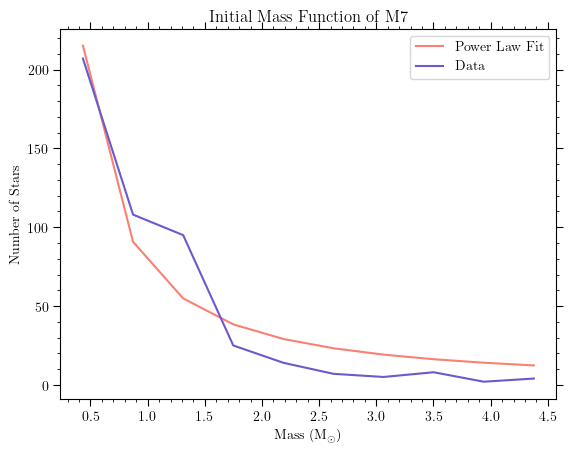

The power law index is 1.237267684068963


In [80]:
initial_mass_m7 = []

for bprp, absmag in zip(np.array(bprp_m7), np.array(absmag_m7)):
    iso_bprp = iso['G_BPmag'] - iso['G_RPmag']
    iso_absmag = iso['Gmag']
    distance = np.sqrt((iso_bprp - bprp)**2 + (iso_absmag - absmag)**2)
    indices = np.where(distance == np.min(distance))[0]
    initial_mass_m7.append(iso.iloc[indices[0]]['Mass'])

n_m7, bins_m7 = np.histogram(initial_mass_m7, bins=10)
bins_m7 = (bins_m7[1:] + bins_m7[:-1])/2
popt, pcov = curve_fit(powerlaw, bins_m7, n_m7, p0=[1, 2])
plt.plot(bins_m7, powerlaw(bins_m7, *popt), label='Power Law Fit', color='salmon')
plt.plot(bins_m7, n_m7, label='Data', color='slateblue')
plt.ylabel('Number of Stars')
plt.xlabel('Mass (M$_\odot$)')
plt.title('Initial Mass Function of M7')
plt.legend()
plt.show()
print('The power law index is', popt[1])

# **Messier 38**

INFO: Query finished. [astroquery.utils.tap.core]


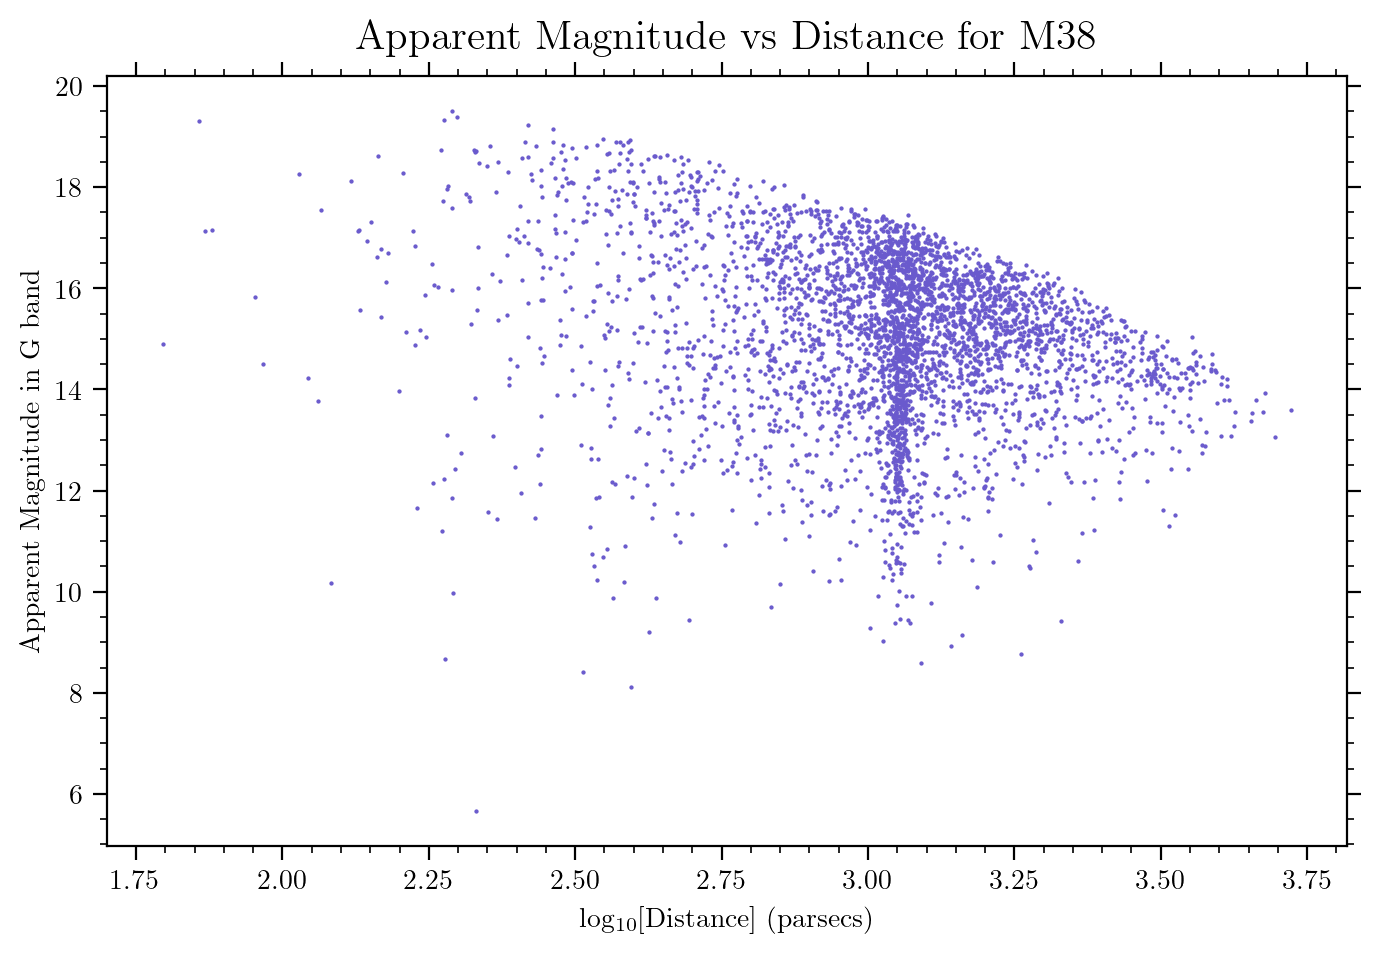

In [81]:
r_m38 = query_gaia('M38')
dist_m38 = plot_appmag_vs_dist('M38', r_m38)

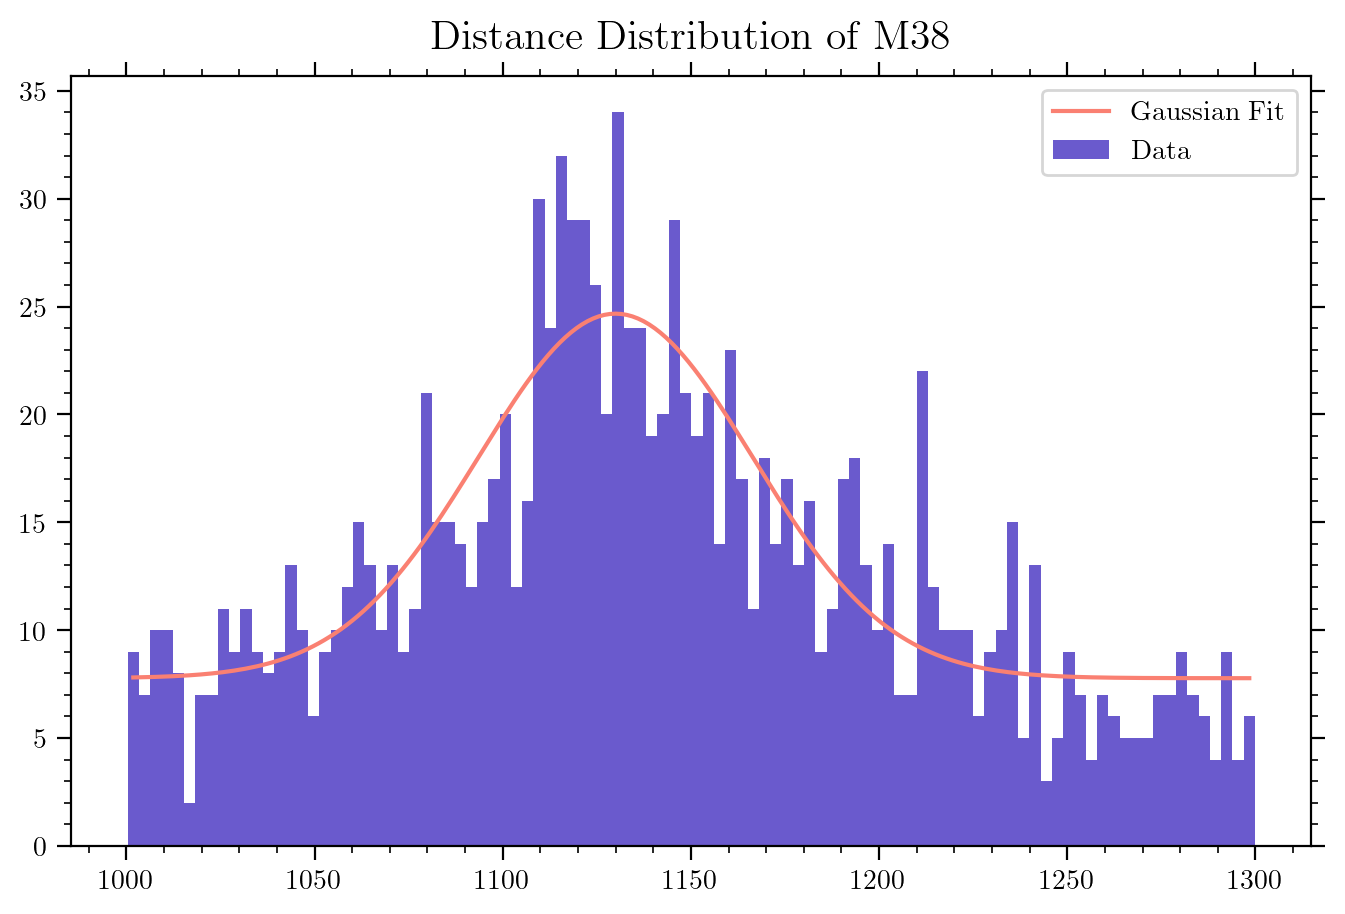

In [82]:
dist_m38 = dist_m38[np.logical_and(dist_m38<1300, dist_m38>1000)]
popt_m38 = gauss_fit('M38', dist_m38)

INFO: Query finished. [astroquery.utils.tap.core]


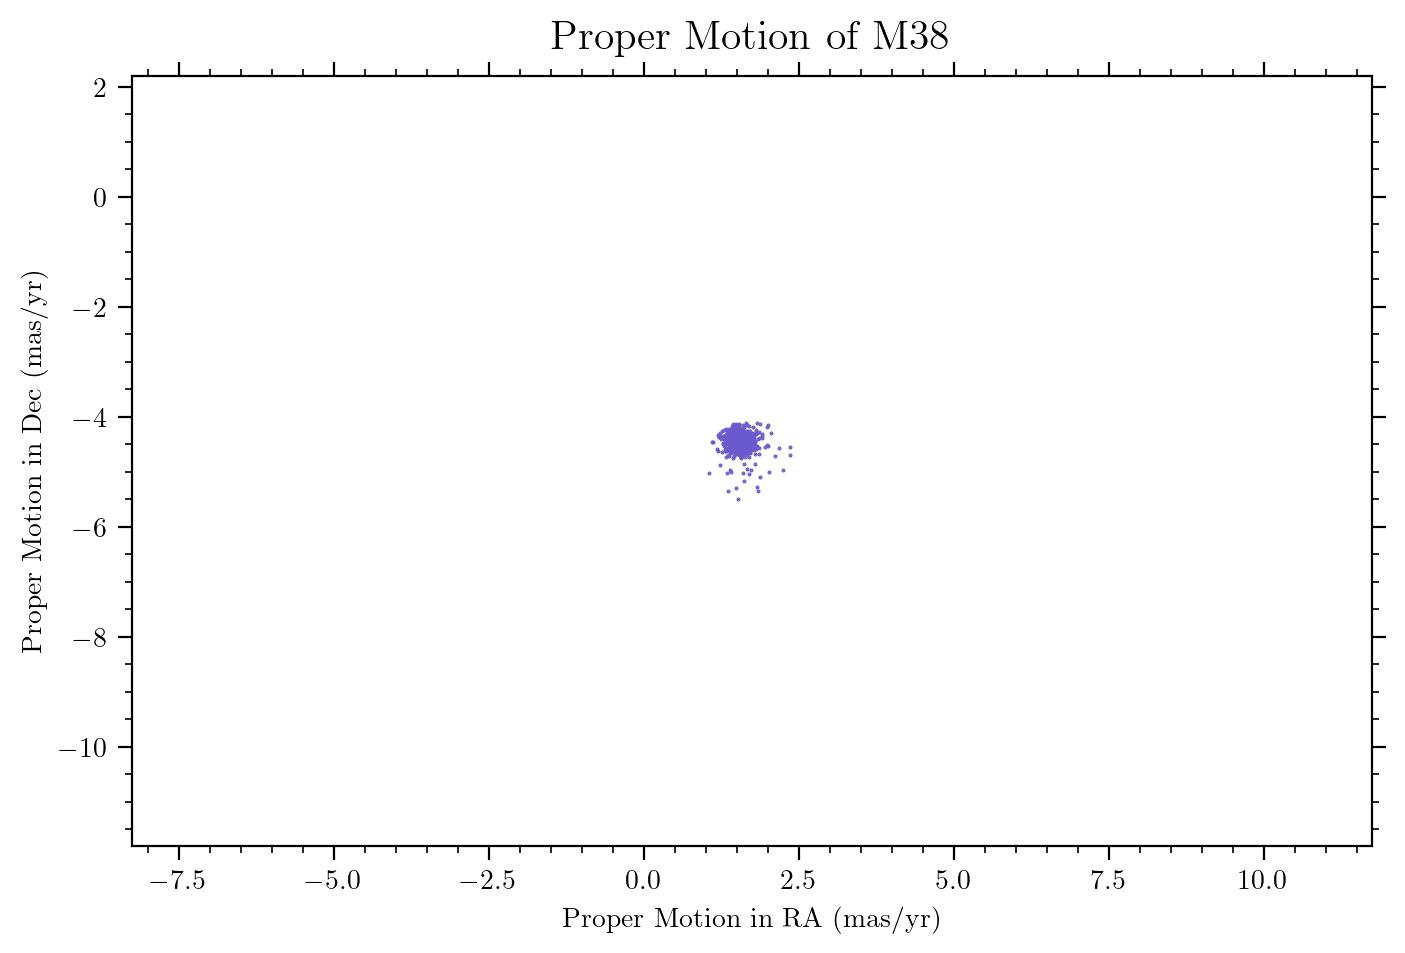

In [83]:
parallax_start_m38, parallax_end_m38 = parallax_cut(dist_m38, popt_m38)
r_m38_2 = plot_pm('M38', parallax_start_m38, parallax_end_m38, 0.2)

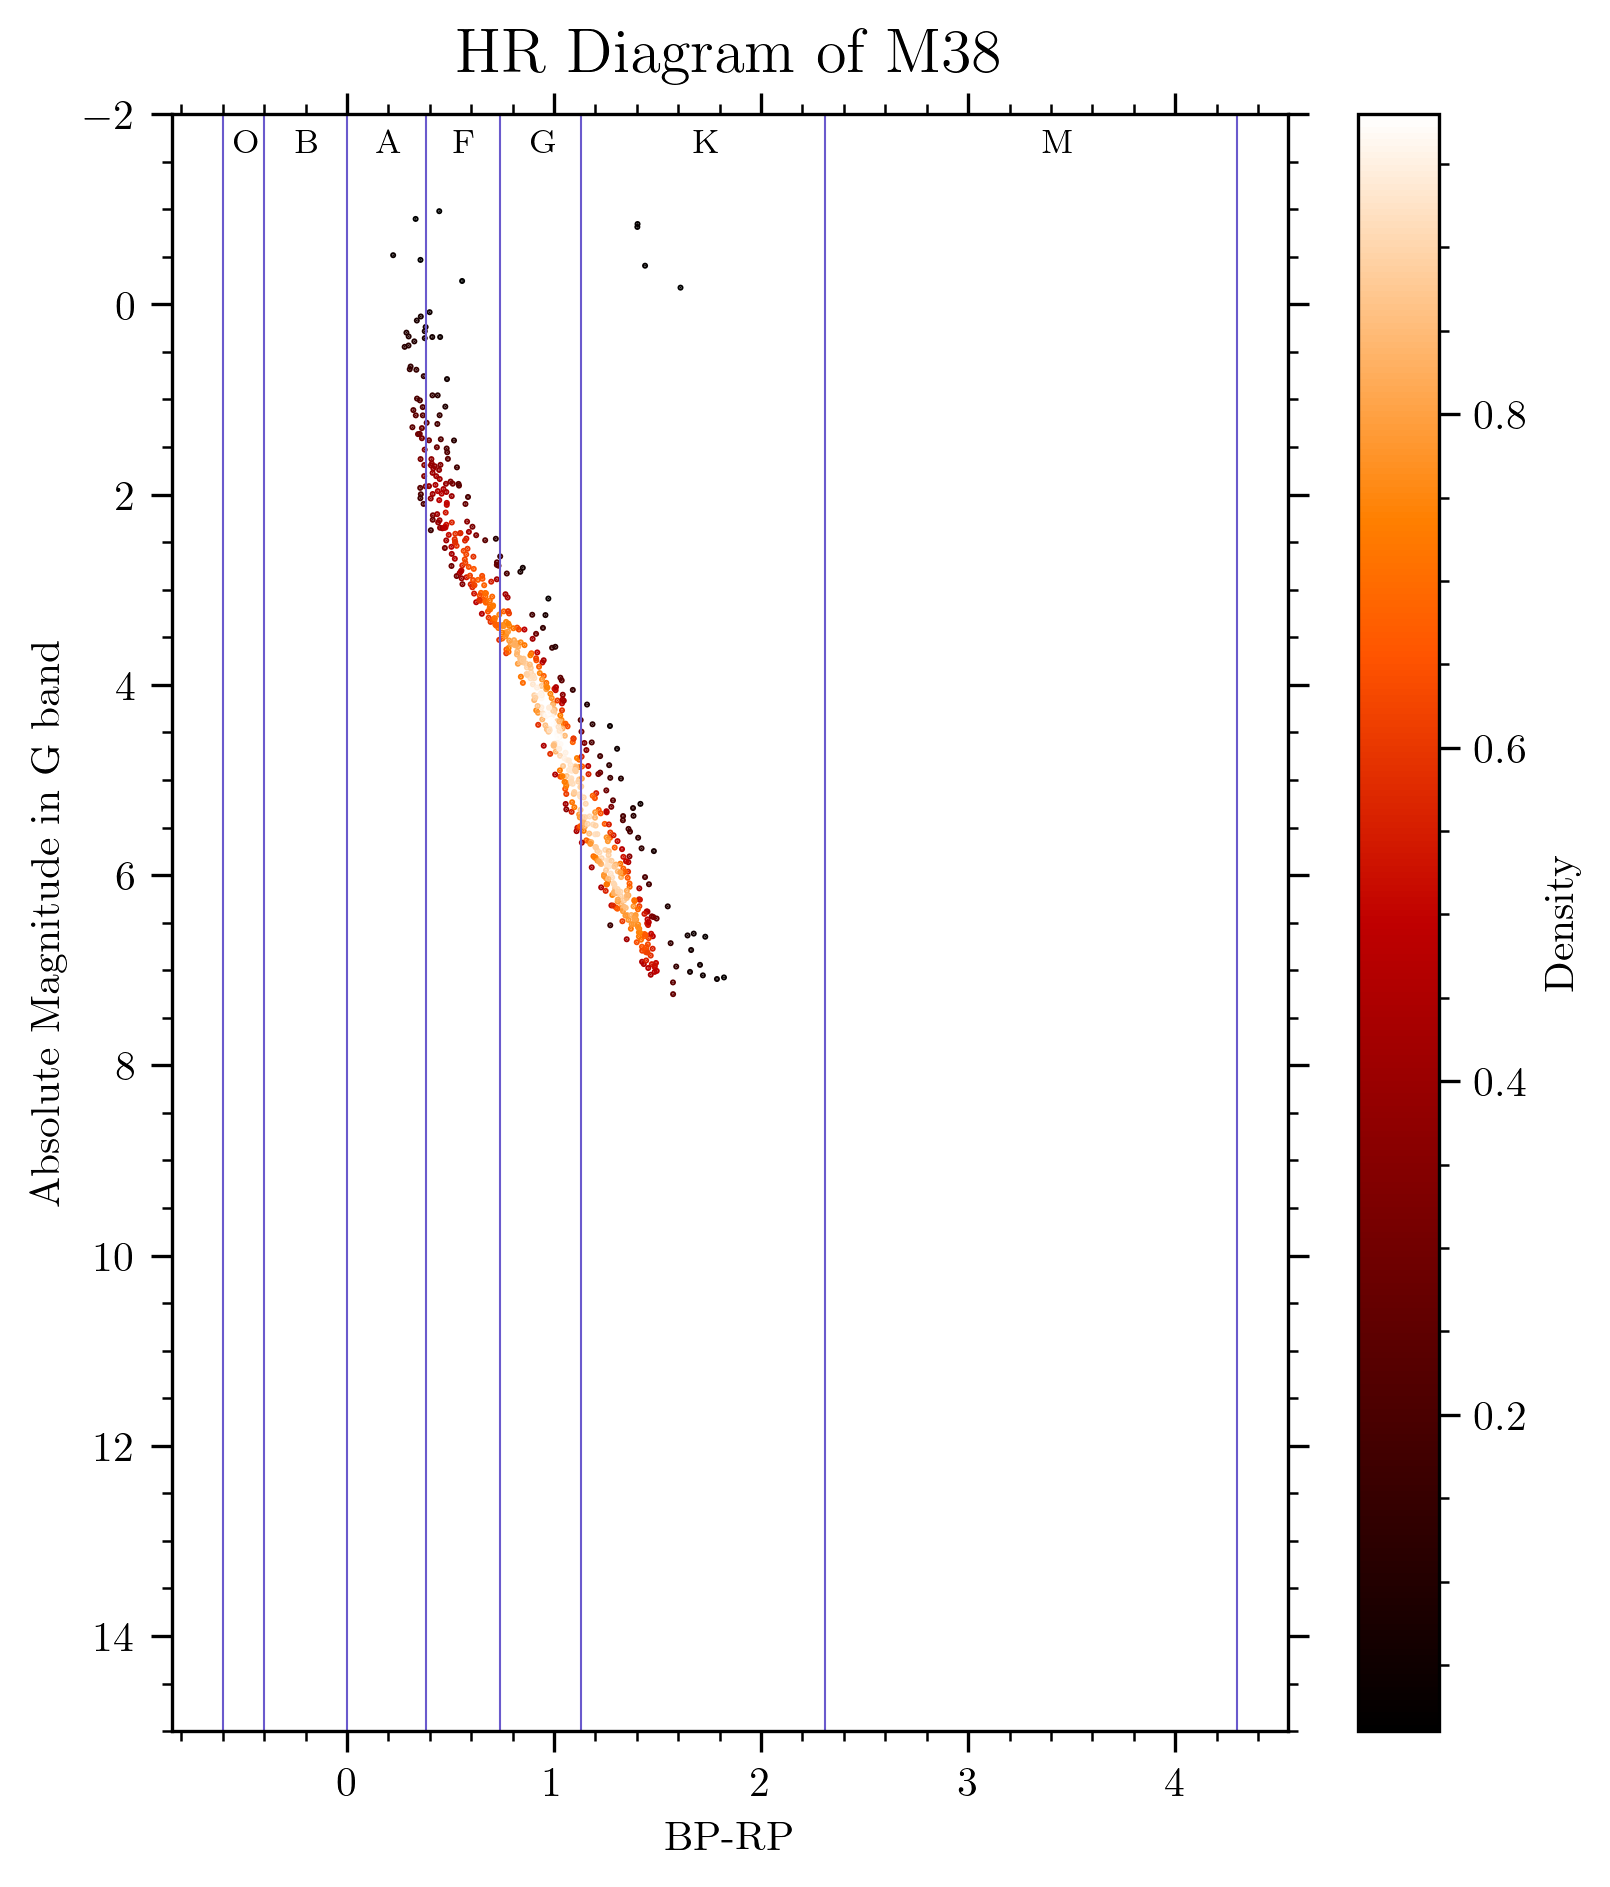

In [84]:
bprp_m38, absmag_m38 = hr_diag('M38', r_m38_2)

In [85]:
perc_in_spec_class('M38', bprp_m38)

Percentage of O type stars in M38 is 0.0%
Percentage of B type stars in M38 is 0.0%
Percentage of A type stars in M38 is 5.69%
Percentage of F type stars in M38 is 23.08%
Percentage of G type stars in M38 is 34.31%
Percentage of K type stars in M38 is 36.92%
Percentage of M type stars in M38 is 0.0%


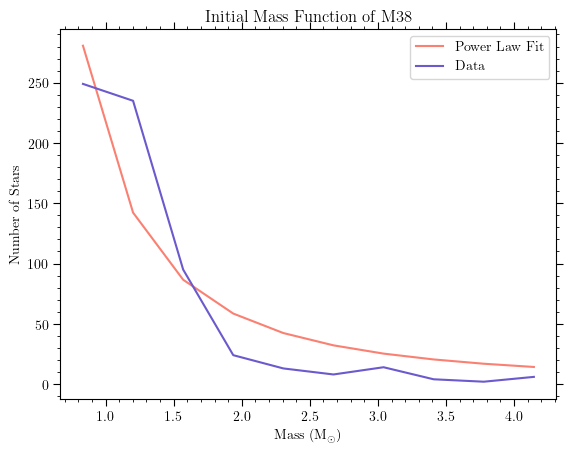

The power law index is 1.8598557139972107


In [88]:
initial_mass_m38 = []

for bprp, absmag in zip(np.array(bprp_m38), np.array(absmag_m38)):
    iso_bprp = iso['G_BPmag'] - iso['G_RPmag']
    iso_absmag = iso['Gmag']
    distance = np.sqrt((iso_bprp - bprp)**2 + (iso_absmag - absmag)**2)
    indices = np.where(distance == np.min(distance))[0]
    initial_mass_m38.append(iso.iloc[indices[0]]['Mass'])

n_m38, bins_m38 = np.histogram(initial_mass_m38, bins=10)
bins_m38 = (bins_m38[1:] + bins_m38[:-1])/2
popt, pcov = curve_fit(powerlaw, bins_m38, n_m38, p0=[1, 2])
plt.plot(bins_m38, powerlaw(bins_m38, *popt), label='Power Law Fit', color='salmon')
plt.plot(bins_m38, n_m38, label='Data', color='slateblue')
plt.ylabel('Number of Stars')
plt.xlabel('Mass (M$_\odot$)')
plt.title('Initial Mass Function of M38')
plt.legend()
plt.show()
print('The power law index is', popt[1])

# **Lambda Orionis**

INFO: Query finished. [astroquery.utils.tap.core]


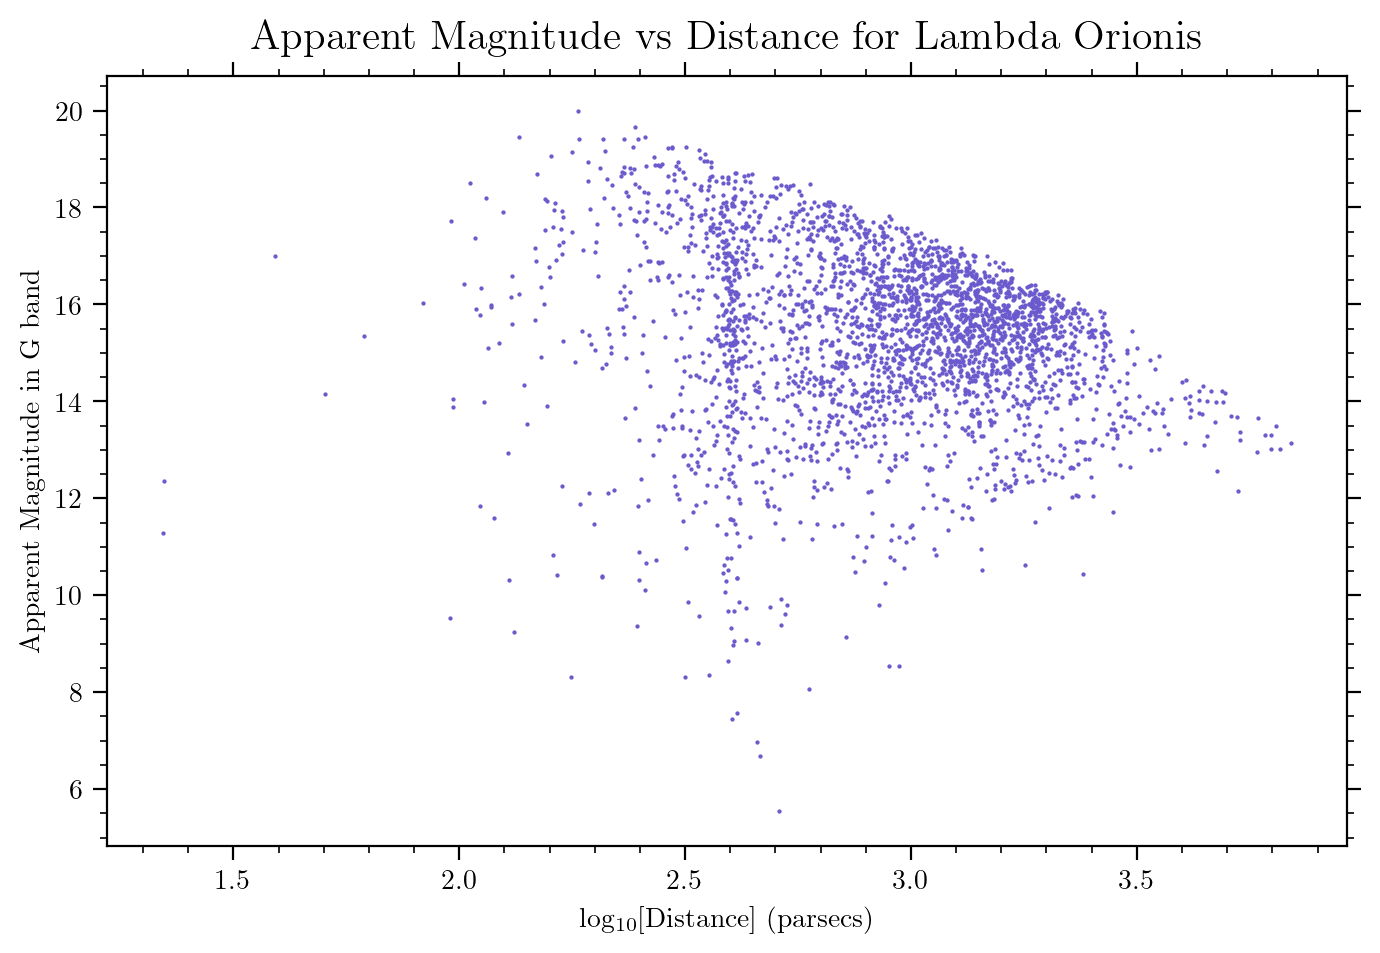

In [89]:
ra, dec = 83.784, 9.934
r_loc = query_gaia(ra=ra, dec=dec)
dist_loc = plot_appmag_vs_dist("Lambda Orionis", r_loc)

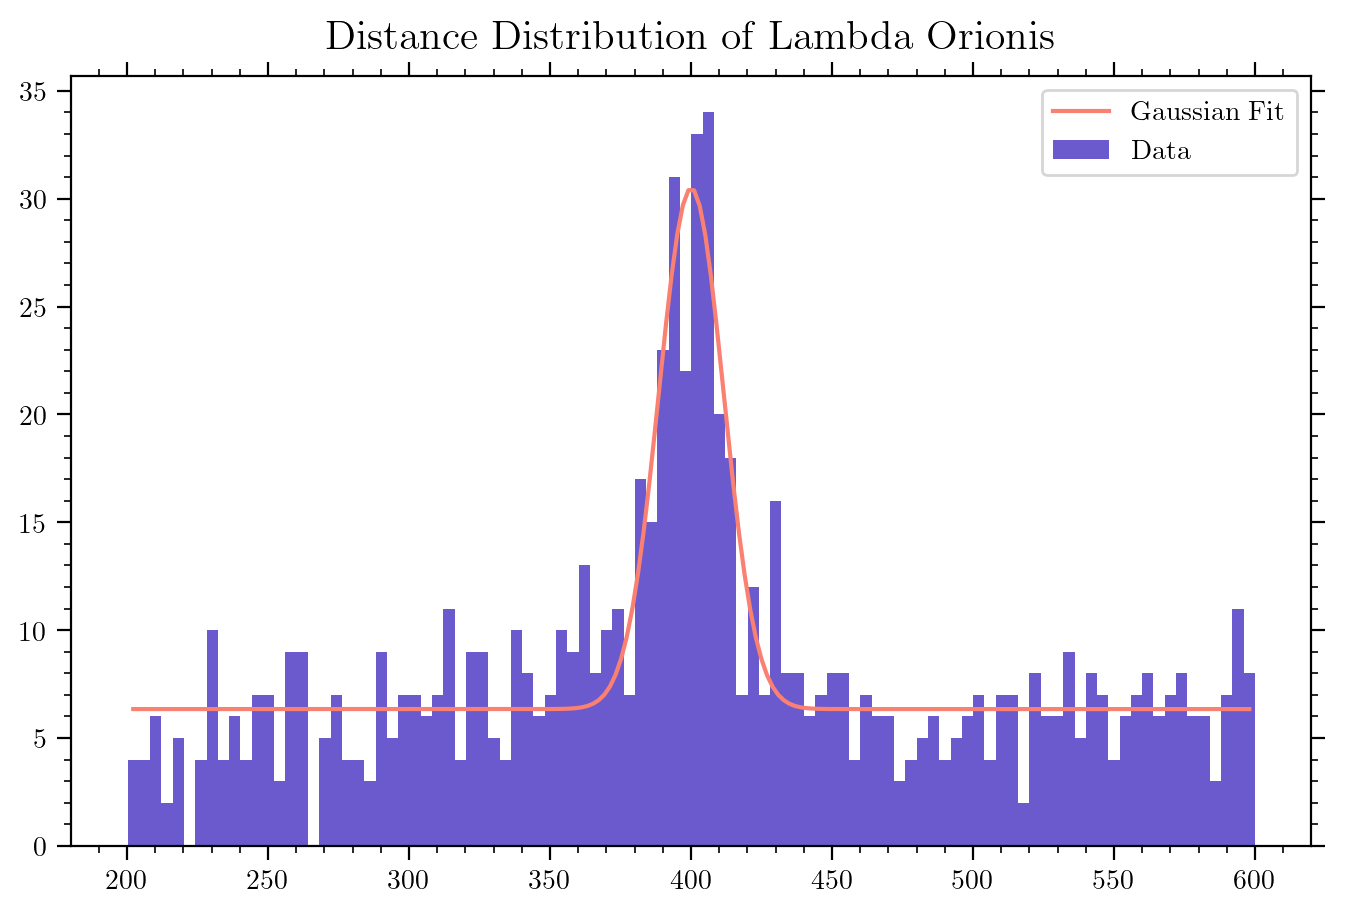

In [90]:
dist_loc = dist_loc[np.logical_and(dist_loc<600, dist_loc>200)]
popt_loc = gauss_fit("Lambda Orionis", dist_loc)

INFO: Query finished. [astroquery.utils.tap.core]


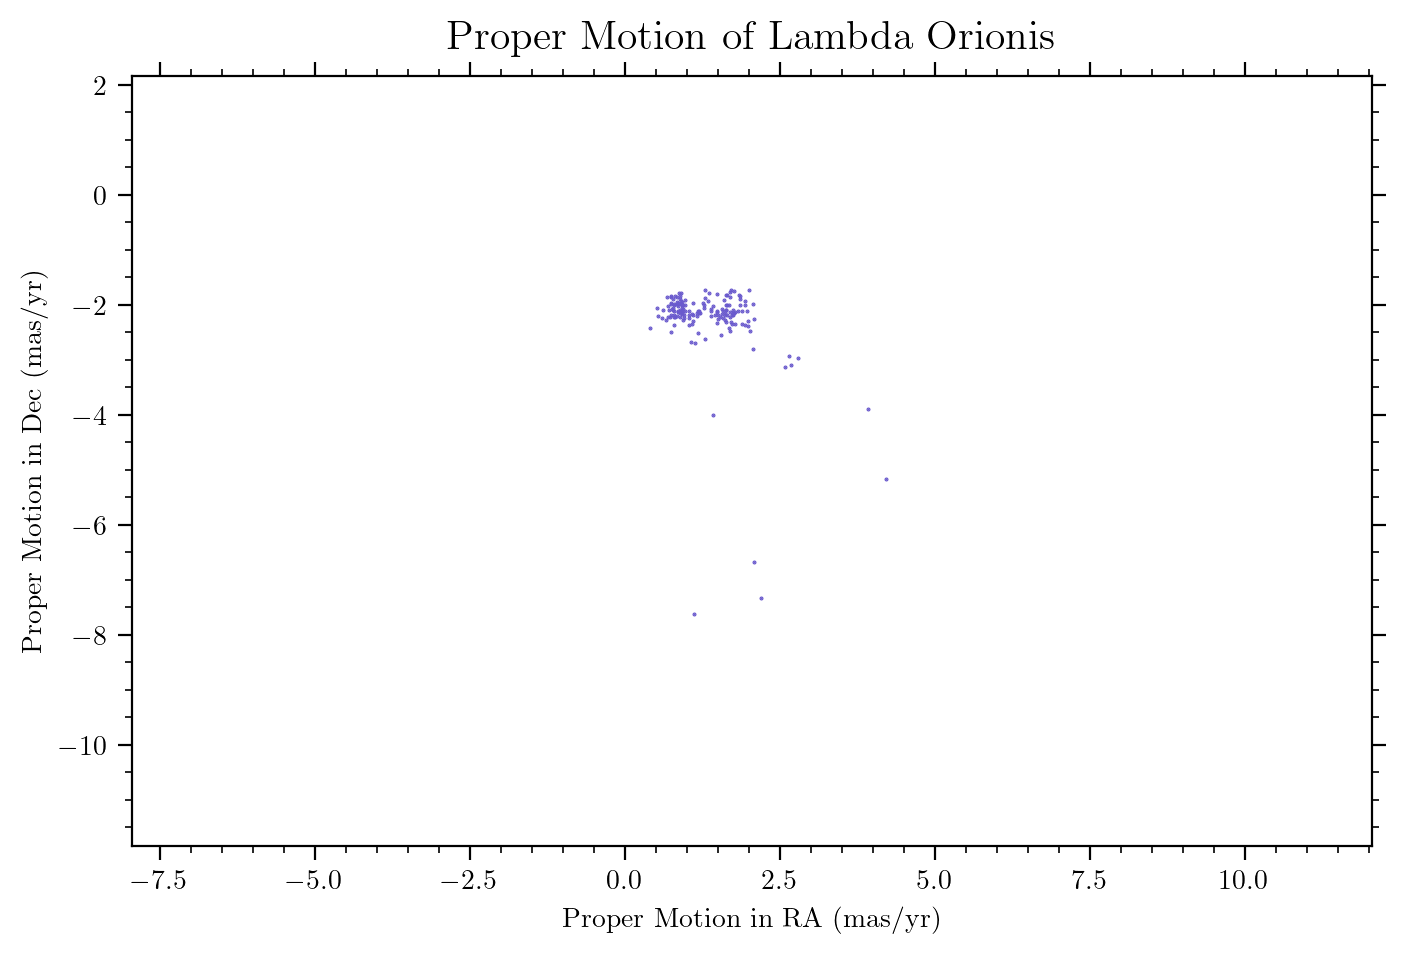

In [91]:
parallax_start_loc, parallax_end_loc = parallax_cut(dist_loc, popt_loc)
r_loc_2 = plot_pm("Lambda Orionis", parallax_start_loc, parallax_end_loc, 0.4, ra=ra, dec=dec)

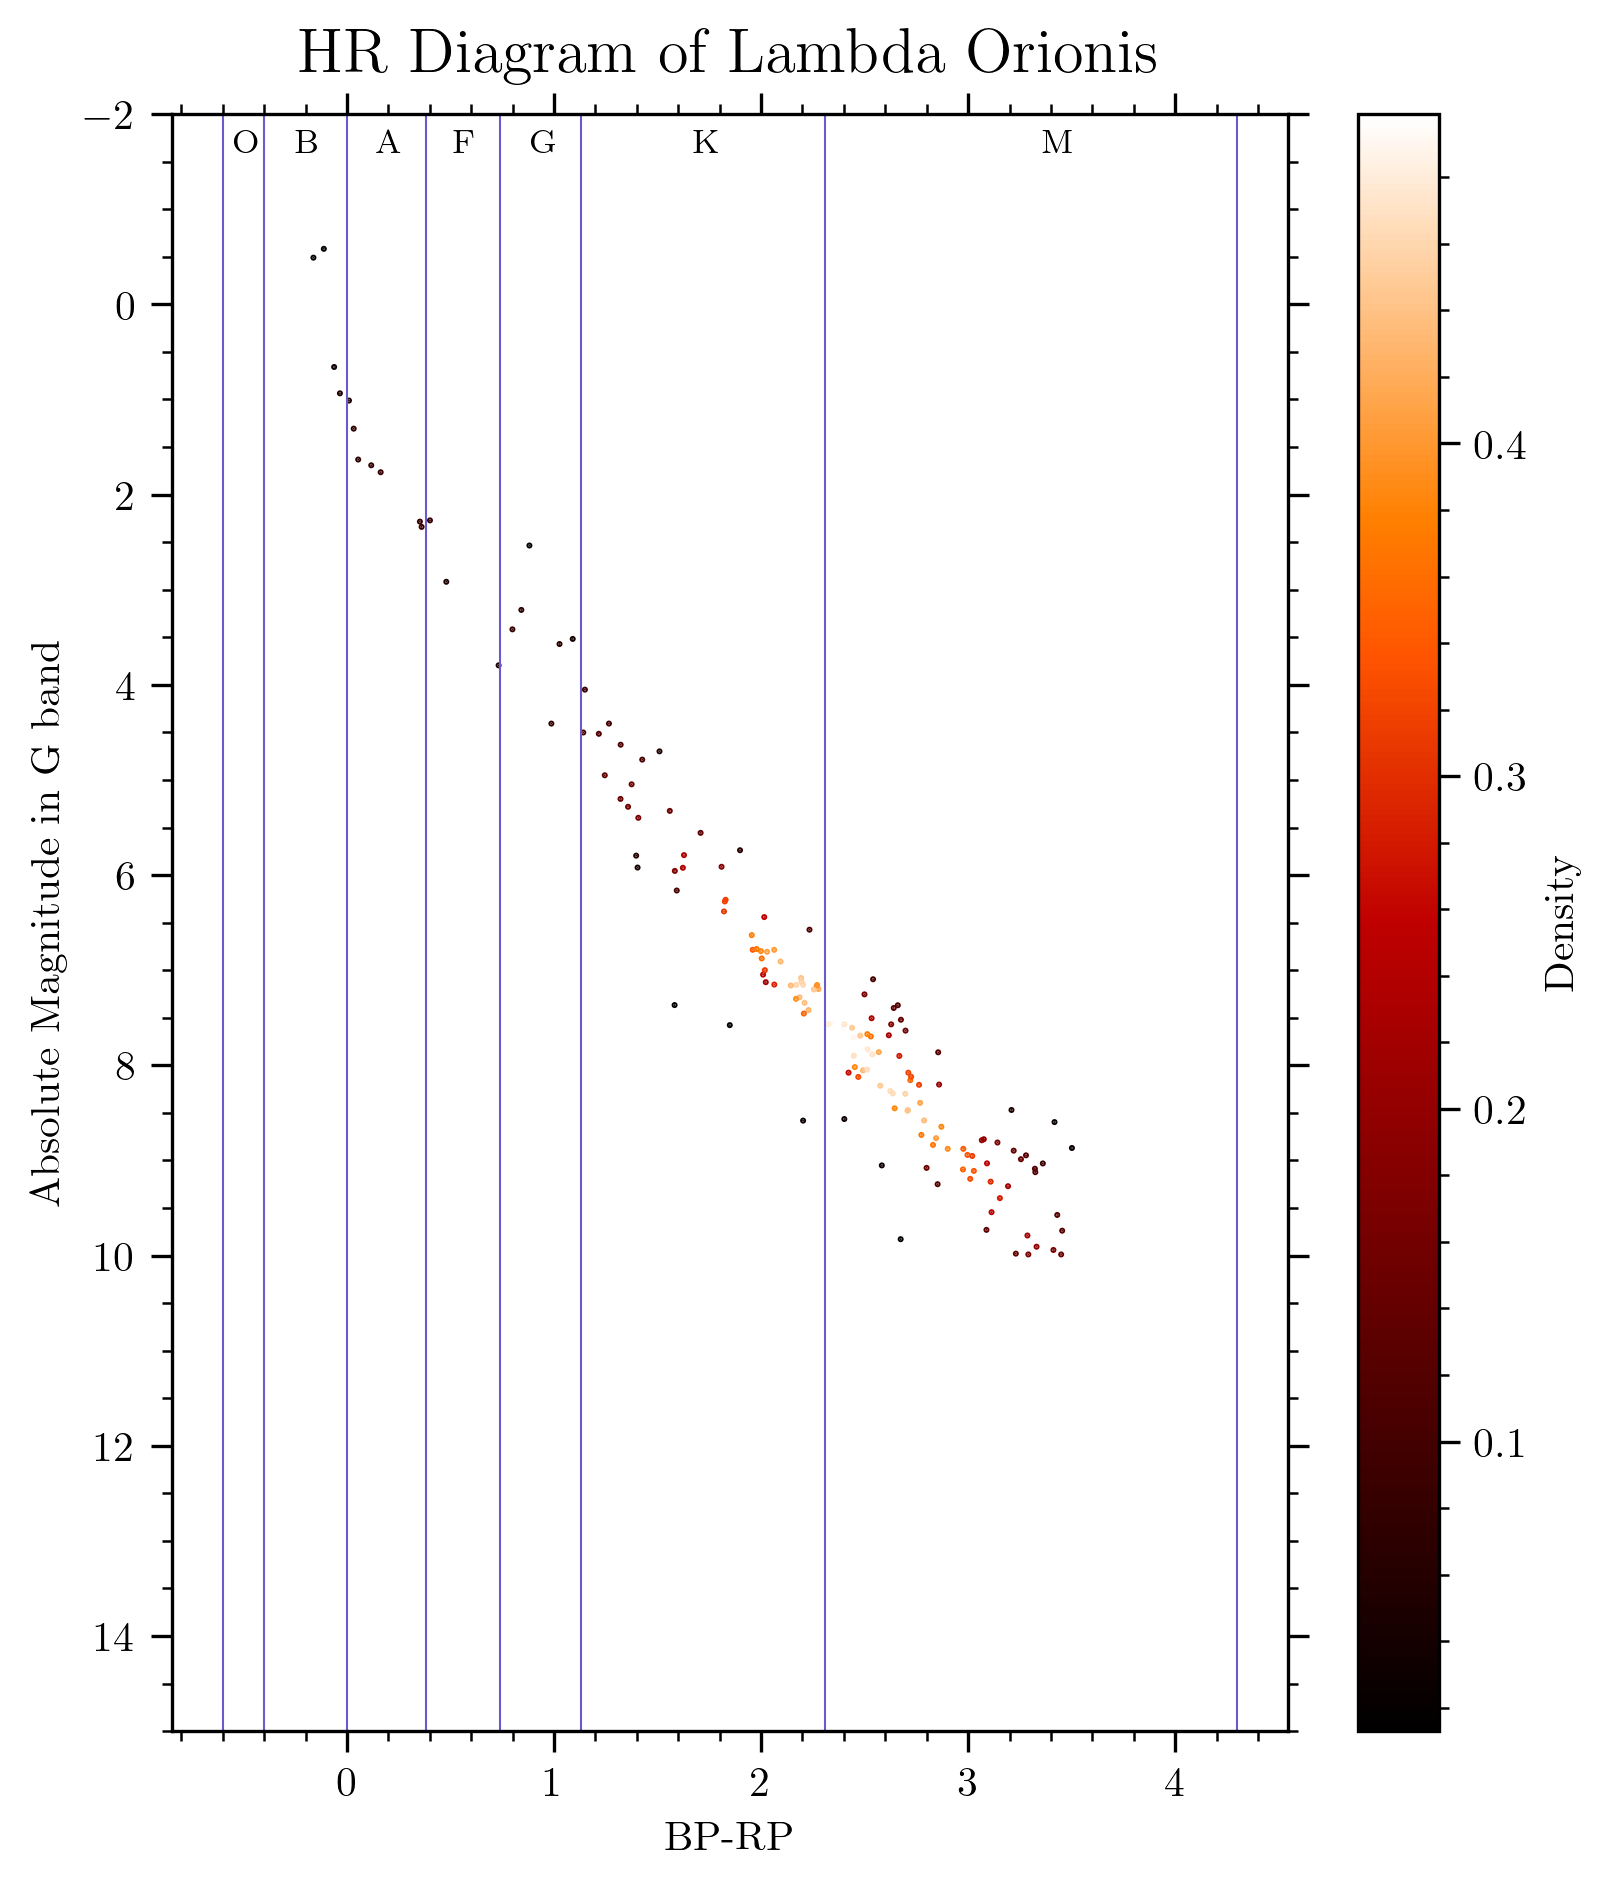

In [92]:
bprp_loc, absmag_loc = hr_diag("Lambda Orionis", r_loc_2)

In [93]:
perc_in_spec_class("Lambda Orionis", bprp_loc)

Percentage of O type stars in Lambda Orionis is 0.0%
Percentage of B type stars in Lambda Orionis is 2.44%
Percentage of A type stars in Lambda Orionis is 4.27%
Percentage of F type stars in Lambda Orionis is 1.83%
Percentage of G type stars in Lambda Orionis is 3.66%
Percentage of K type stars in Lambda Orionis is 34.15%
Percentage of M type stars in Lambda Orionis is 53.66%


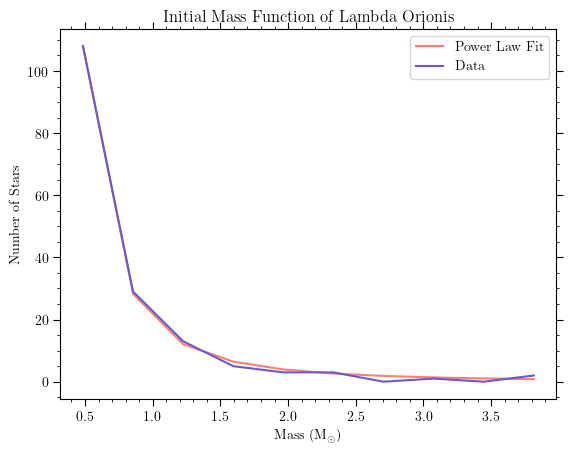

The power law index is 2.3657972747443745


In [96]:
initial_mass_loc = []

for bprp, absmag in zip(np.array(bprp_loc), np.array(absmag_loc)):
    iso_bprp = iso['G_BPmag'] - iso['G_RPmag']
    iso_absmag = iso['Gmag']
    distance = np.sqrt((iso_bprp - bprp)**2 + (iso_absmag - absmag)**2)
    indices = np.where(distance == np.min(distance))[0]
    initial_mass_loc.append(iso.iloc[indices[0]]['Mass'])

n_loc, bins_loc = np.histogram(initial_mass_loc, bins=10)
bins_loc = (bins_loc[1:] + bins_loc[:-1])/2
popt, pcov = curve_fit(powerlaw, bins_loc, n_loc, p0=[1, 2])
plt.plot(bins_loc, powerlaw(bins_loc, *popt), label='Power Law Fit', color='salmon')
plt.plot(bins_loc, n_loc, label='Data', color='slateblue')
plt.ylabel('Number of Stars')
plt.xlabel('Mass (M$_\odot$)')
plt.title('Initial Mass Function of Lambda Orionis')
plt.legend()
plt.show()
print('The power law index is', popt[1])

# **Alpha Persei Cluster**

INFO: Query finished. [astroquery.utils.tap.core]


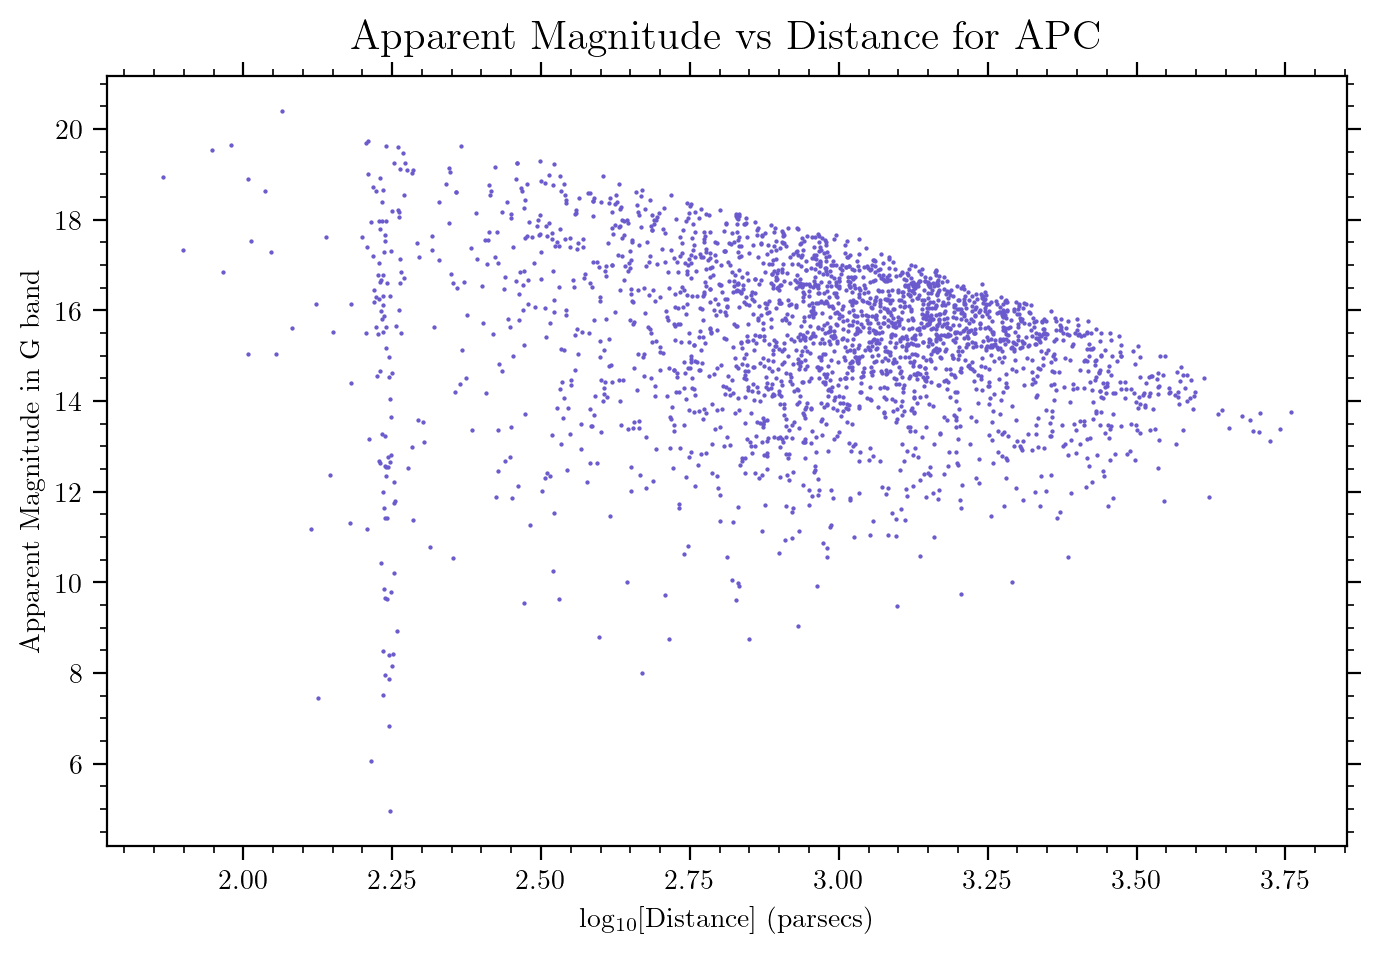

In [97]:
ra_apc, dec_apc = 51.675, 48.8
r_apc = query_gaia(ra = ra_apc, dec = dec_apc)
dist_loc_apc = plot_appmag_vs_dist("APC", r_apc)

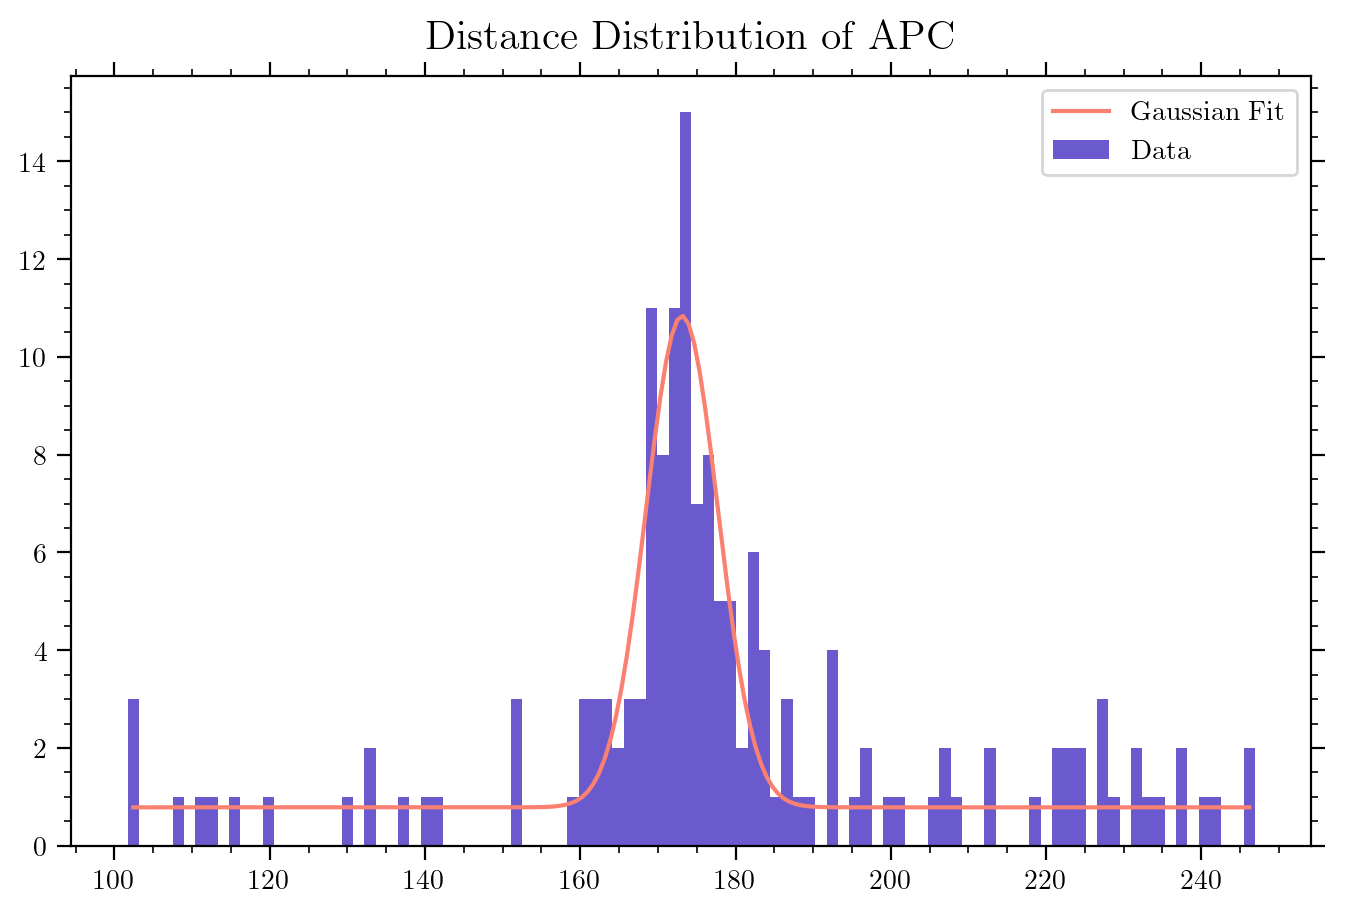

In [98]:
dist_loc_apc = dist_loc_apc[np.logical_and(dist_loc_apc<250, dist_loc_apc>100)]
popt_loc_apc = gauss_fit("APC", dist_loc_apc)

INFO: Query finished. [astroquery.utils.tap.core]


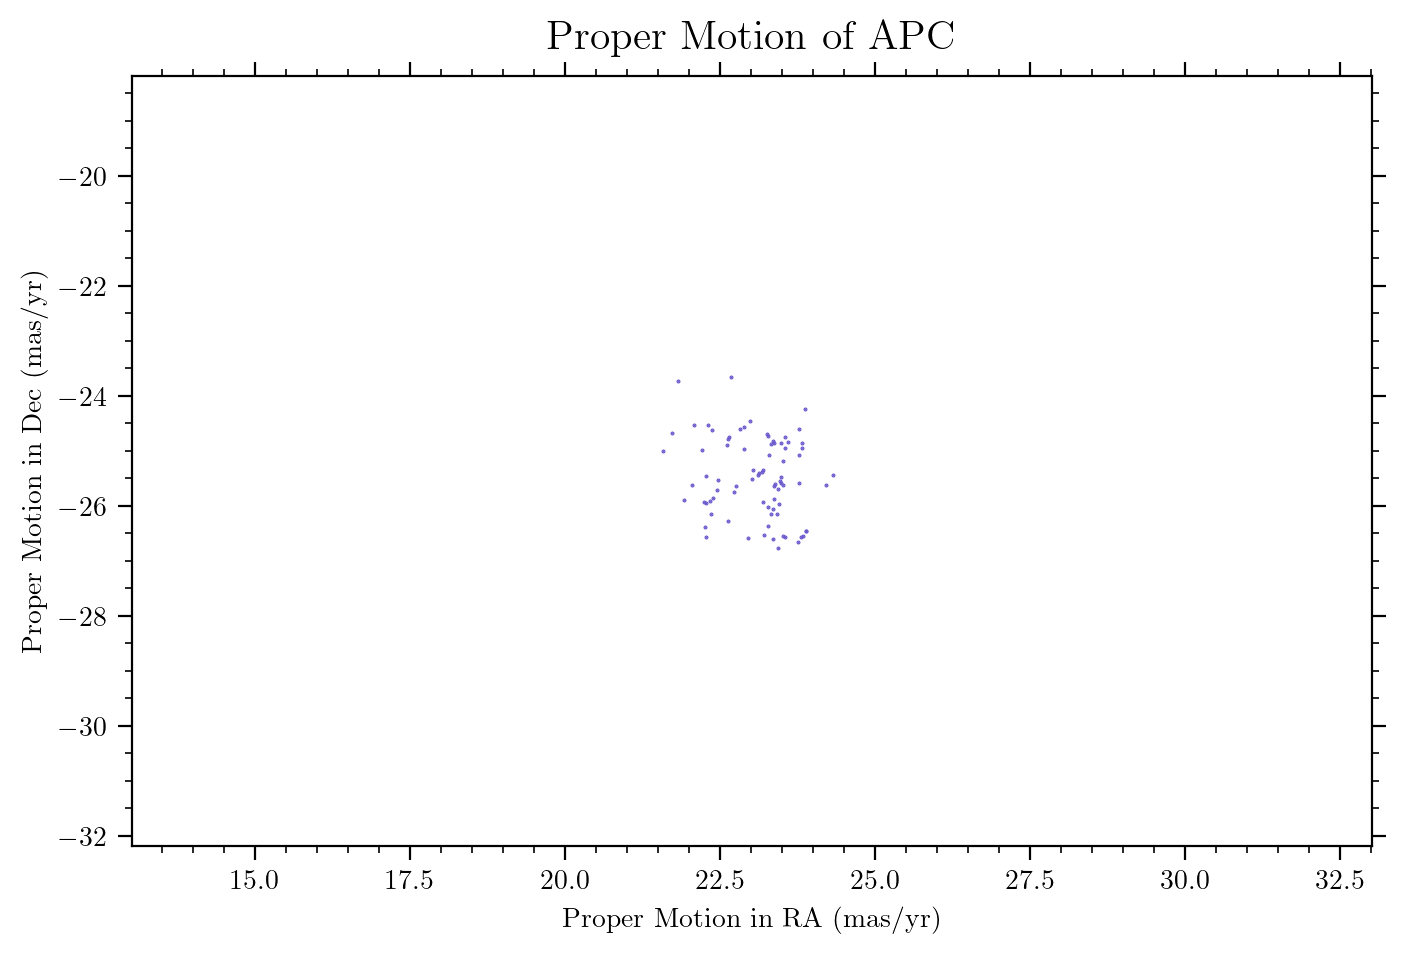

In [99]:
parallax_start_loc_apc, parallax_end_loc_apc = parallax_cut(dist_loc_apc, popt_loc_apc)
r_apc_2 = plot_pm("APC", parallax_start_loc_apc, parallax_end_loc_apc, 0.15, ra=ra_apc, dec=dec_apc)

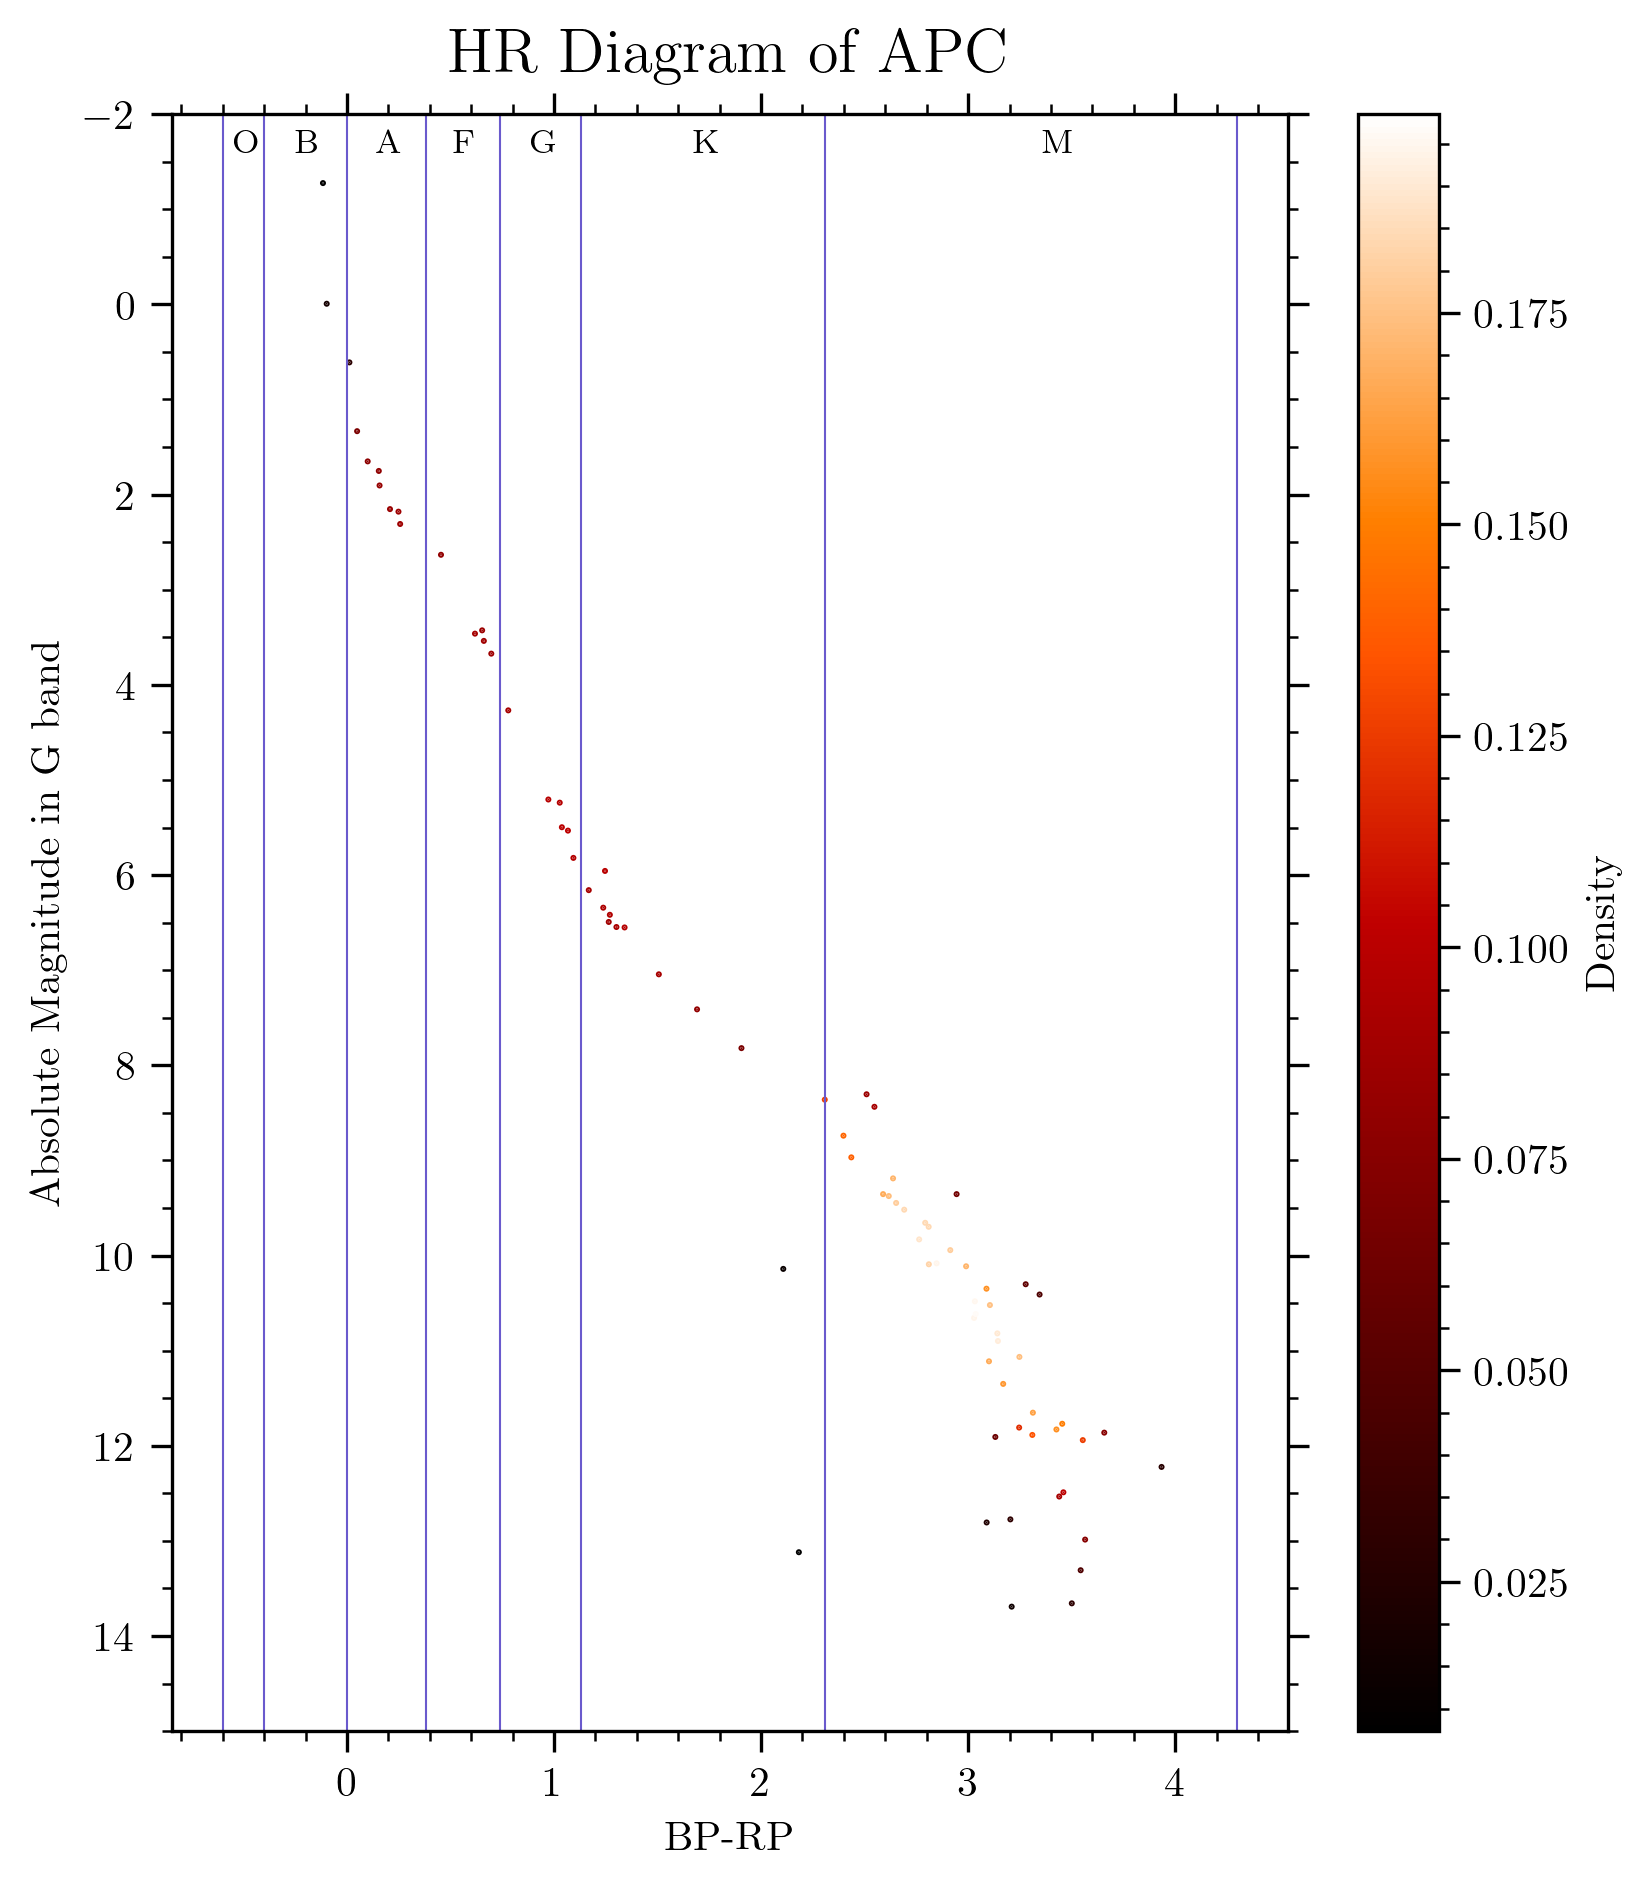

In [100]:
bprp_apc, absmag_apc = hr_diag("APC", r_apc_2)

In [101]:
perc_in_spec_class("APC", bprp_apc)

Percentage of O type stars in APC is 0.0%
Percentage of B type stars in APC is 2.47%
Percentage of A type stars in APC is 9.88%
Percentage of F type stars in APC is 6.17%
Percentage of G type stars in APC is 7.41%
Percentage of K type stars in APC is 16.05%
Percentage of M type stars in APC is 58.02%


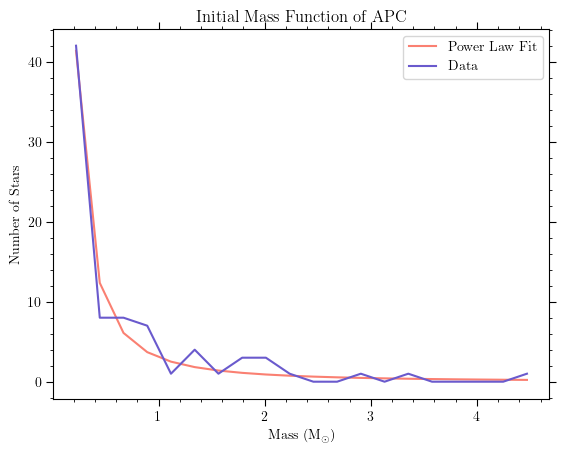

The power law index is 1.7388602237637047


In [102]:
initial_mass_apc = []

for bprp, absmag in zip(np.array(bprp_apc), np.array(absmag_apc)):
    iso_bprp = iso['G_BPmag'] - iso['G_RPmag']
    iso_absmag = iso['Gmag']
    distance = np.sqrt((iso_bprp - bprp)**2 + (iso_absmag - absmag)**2)
    indices = np.where(distance == np.min(distance))[0]
    initial_mass_apc.append(iso.iloc[indices[0]]['Mass'])

n_apc, bins_apc = np.histogram(initial_mass_apc, bins=20)
bins_apc = (bins_apc[1:] + bins_apc[:-1])/2
popt, pcov = curve_fit(powerlaw, bins_apc, n_apc, p0=[1, 2])
plt.plot(bins_apc, powerlaw(bins_apc, *popt), label='Power Law Fit', color='salmon')
plt.plot(bins_apc, n_apc, label='Data', color='slateblue')
plt.ylabel('Number of Stars')
plt.xlabel('Mass (M$_\odot$)')
plt.title('Initial Mass Function of APC')
plt.legend()
plt.show()
print('The power law index is', popt[1])

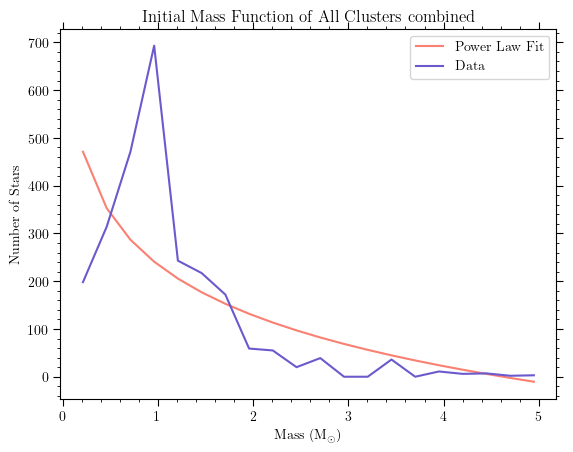

In [95]:
initial_mass_all = initial_mass_m45 + initial_mass_m50 + initial_mass_m6 + initial_mass_m7 + initial_mass_m38 + initial_mass_loc + initial_mass_apc

n_all, bins_all = np.histogram(initial_mass_all, bins=20)
bins_all = (bins_all[1:] + bins_all[:-1])/2
popt, pcov = curve_fit(powerlaw, bins_all, n_all, p0=[1, 2, 10])
plt.plot(bins_all, powerlaw(bins_all, *popt), label='Power Law Fit', color='salmon')
plt.plot(bins_all, n_all, label='Data', color='slateblue')
plt.ylabel('Number of Stars')
plt.xlabel('Mass (M$_\odot$)')
plt.title('Initial Mass Function of All Clusters combined')
plt.legend()
plt.show()

# **Omega Centauri**

INFO: Query finished. [astroquery.utils.tap.core]


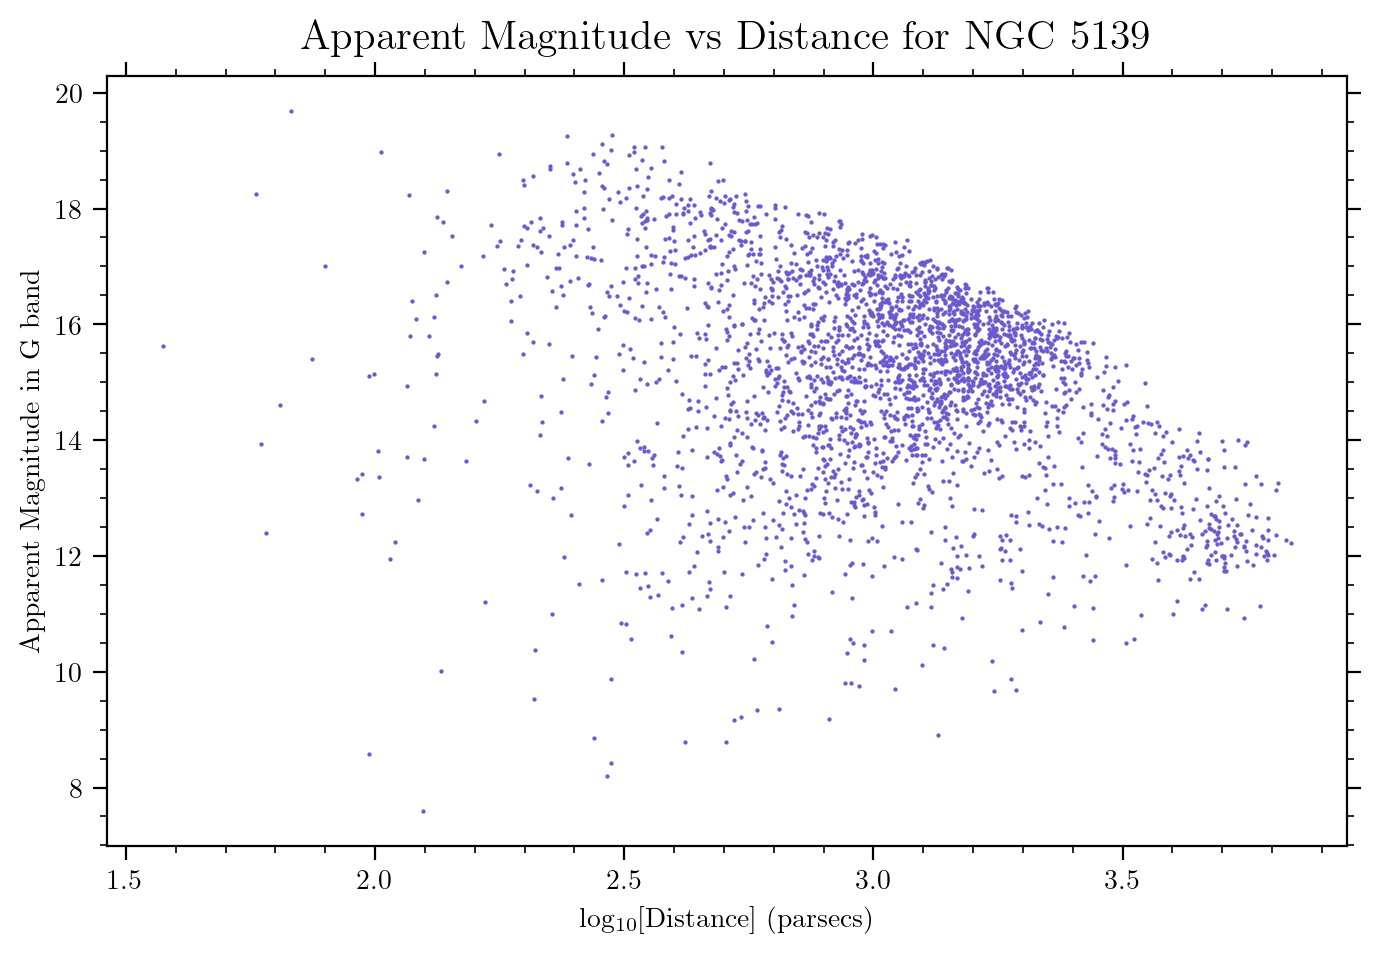

In [30]:
r_oc = query_gaia("NGC 5139")
dist_oc = plot_appmag_vs_dist("NGC 5139", r_oc)

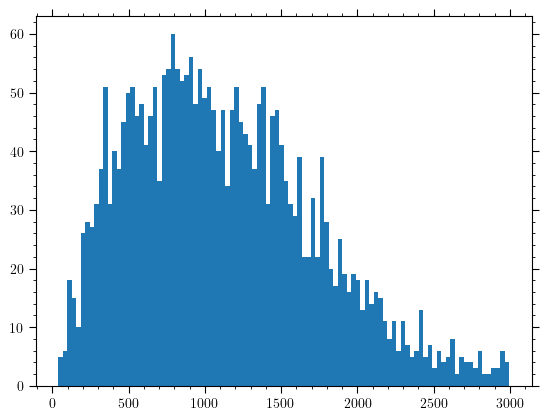

In [116]:
plt.hist(dist_oc, bins=100)
plt.show()

In [2]:
query3 = '''
SELECT top 10000
ra, dec, parallax, phot_g_mean_mag, pmra, pmdec, phot_g_mean_mag, \
phot_bp_mean_mag, phot_rp_mean_mag, pmra, pmdec, radial_velocity \
FROM gaiadr3.gaia_source
WHERE ra > 200.1 AND ra < 203.3
AND dec > -48.5 AND dec < -47
AND abs(pmra_error/pmra)<0.10
AND abs(pmdec_error/pmdec)<0.10
AND parallax IS NOT NULL
AND parallax between 0.142857142857 and 0.285714285714
AND pmra IS NOT NULL AND abs(pmra)>0
AND pmdec IS NOT NULL AND abs(pmdec)>0
AND pmra BETWEEN -5 AND 0
AND pmdec BETWEEN -10 AND -5
ORDER BY phot_g_mean_mag
'''

job3 = Gaia.launch_job_async(query3)
r3 = job3.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


(-20.0, 20.0)

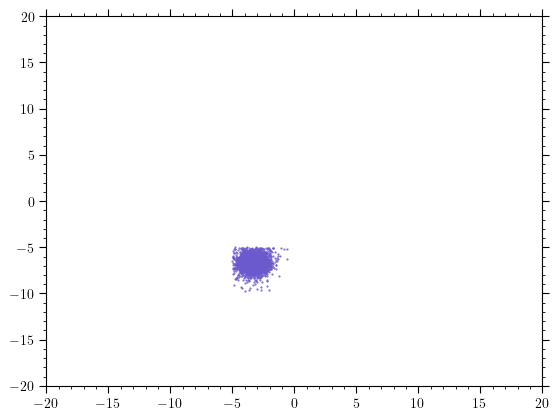

In [114]:
plt.plot(r3['pmra'], r3['pmdec'], 'o', markersize=0.5, color='slateblue')
plt.xlim(-20, 20)
plt.ylim(-20, 20)

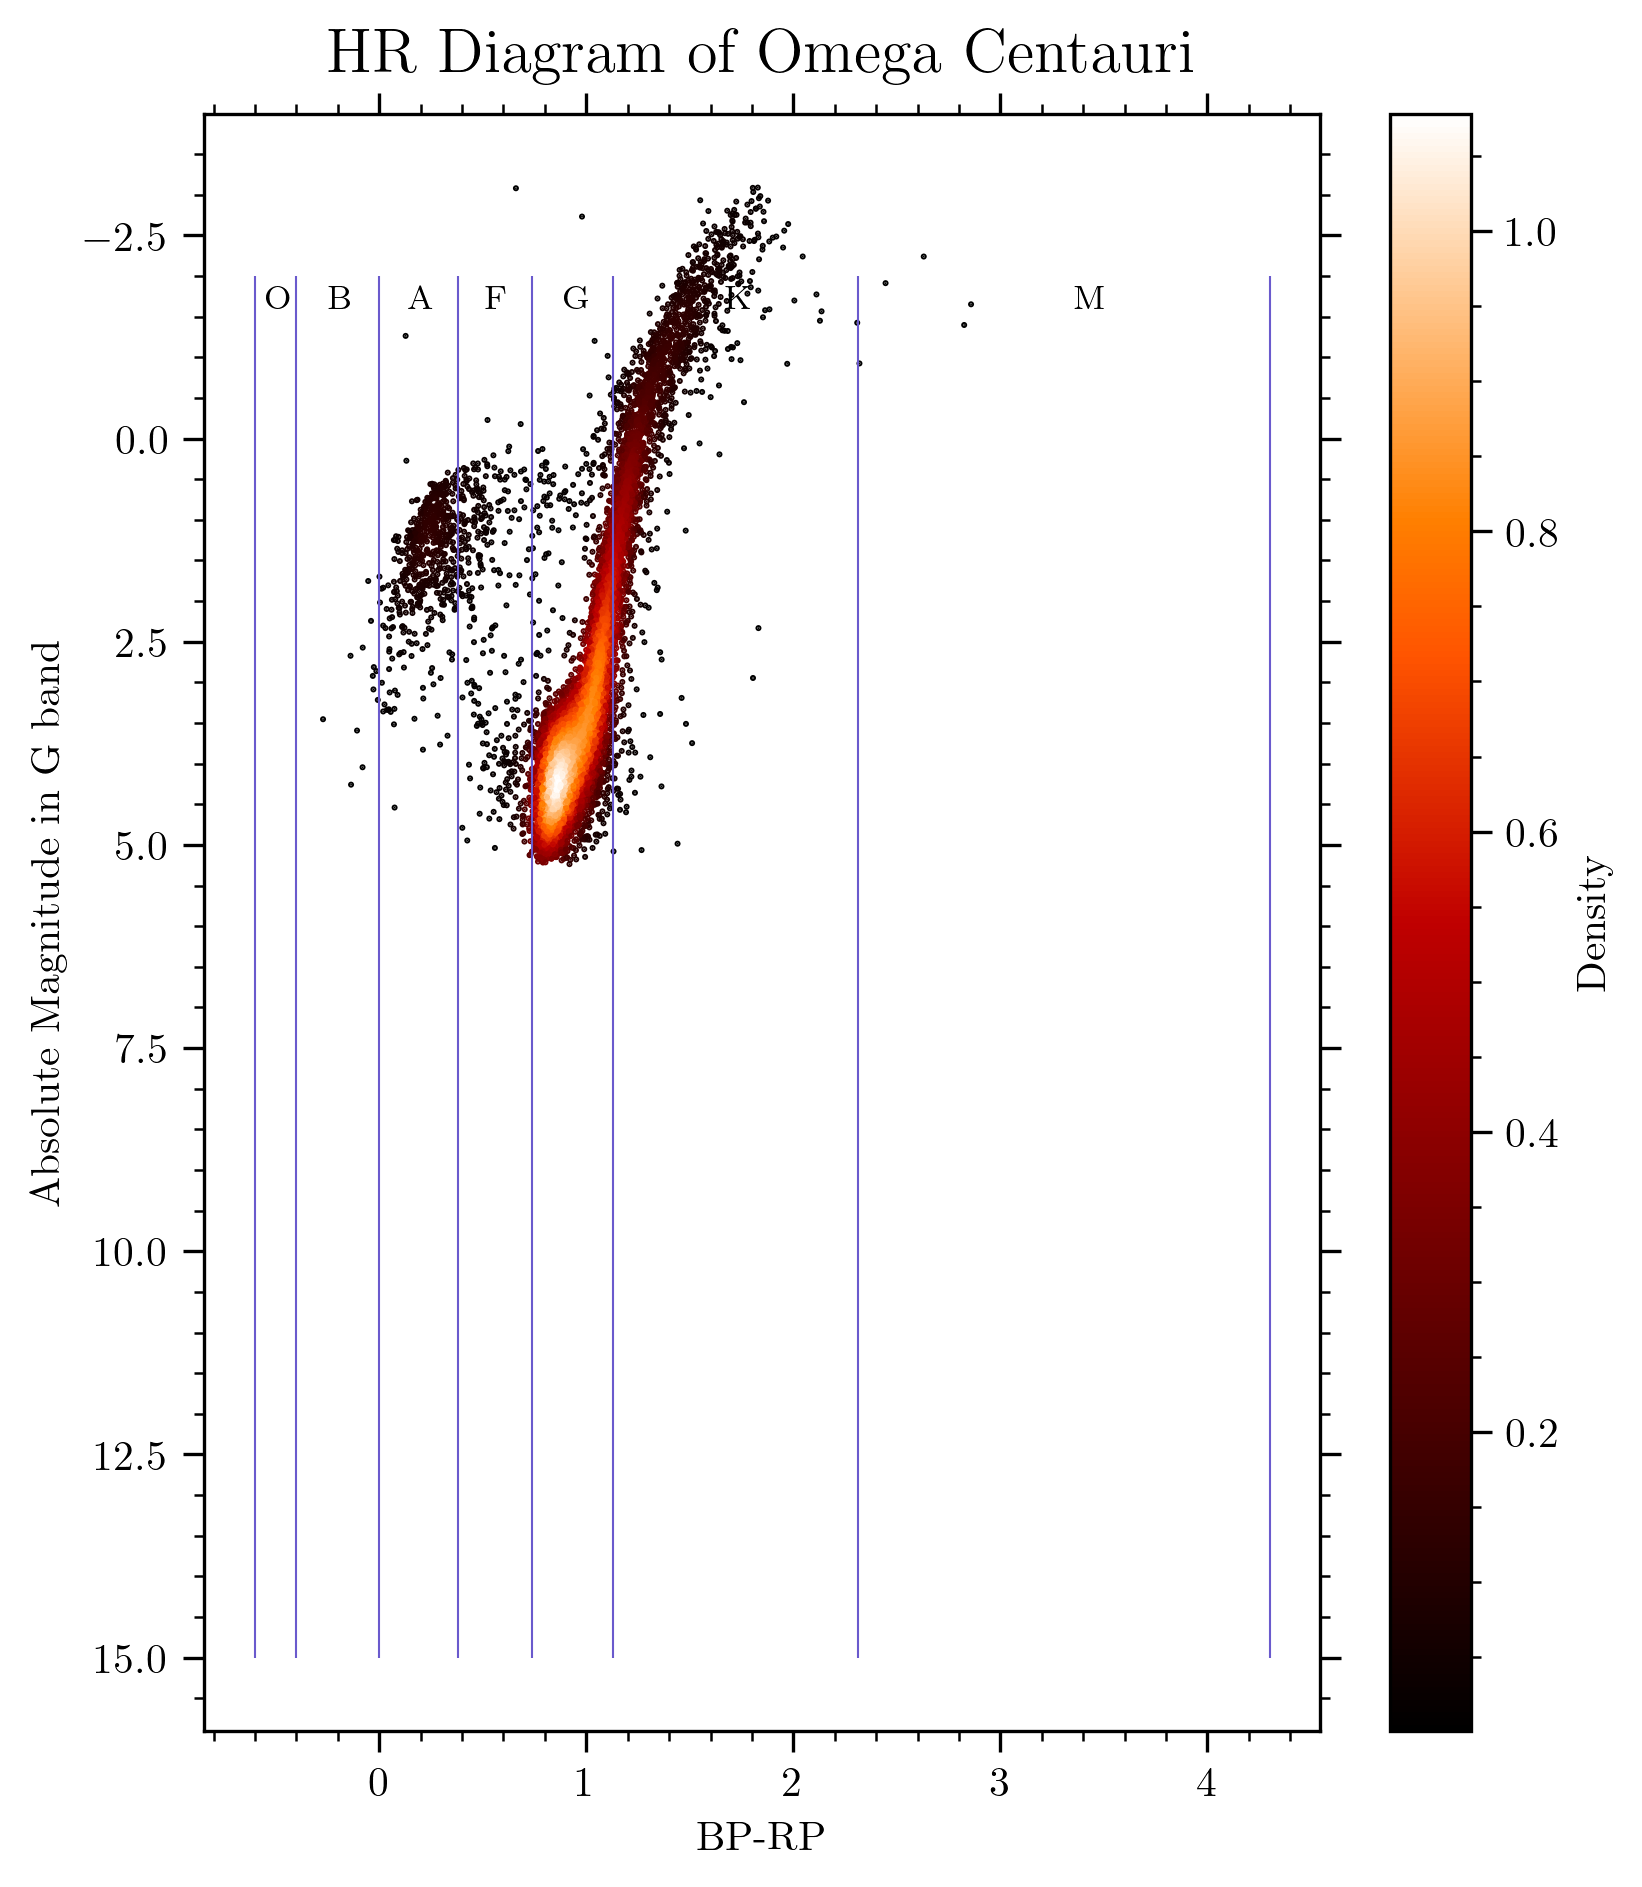

In [3]:
hr_diag("Omega Centauri", r3)
plt.show()